<a href="https://colab.research.google.com/github/TaraRasti/Data-Mining-with-R/blob/main/Income%20Category%20of%20Urban%20Households/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "household-income"

In [ ]:
path = "../input/household-income/DataHD98_4.csv"

In [ ]:
library(tidyverse)
library(reshape2)
library(dplyr)
library(scales)
library(ggplot2) 
library(ggcorrplot)
library(GGally)
library(ggthemes)
library(ggThemeAssist)

In [ ]:
df = read_csv(path)
attach(df)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  cooler.g = col_logical(),
  ab.l = col_logical(),
  broodat.m = col_logical()
)
ℹ Use `spec()` for the full column specifications.


The following objects are masked from data (pos = 3):

    ab.l, Address, Age, ashpazkhane, bargh, broodat.m, C.Ostan,
    charkh.kh, cooler.a, cooler.a.s, cooler.g, cooler.g.s, D_Azad,
    D_Motefaraghe, D_Mozd, D_Yarane, do, DVD, Edu, Faaliat, fazelab,
    freeizer, gaz, gaz.l, Gender, H_behdasht, H_Ertebatat,
    H_Ghazayeamade, H_Hamlonaghl, H_kalavakhadamat, H_Khorakivadokhani,
    H_Maskan, H_mobleman, H_Noshidani, H_Pushak, H_Tafrihat, hamam,
    hararat.m, InEdu, internet, jaro.b, m.lebas, m.zarf, Masleh,
    microfer, mobile, motor, N.S, oto, package, panke, Pc, radio, S.Z,
    Savad, sookht.ab, sookht.g, sookht.p, T.M.S, T.O, T.shaghel,
    Tedad.a, tel, TV.r, TV.S, yakhchal, yakhchal.f, zabt


The following objects are masked fro

The following objects are masked from df (pos = 14):

    ab.l, Address, Age, ashpazkhane, bargh, broodat.m, C.Ostan,
    charkh.kh, cooler.a, cooler.a.s, cooler.g, cooler.g.s, D_Azad,
    D_Motefaraghe, D_Mozd, D_Yarane, do, DVD, Edu, Faaliat, fazelab,
    freeizer, gaz, gaz.l, Gender, H_behdasht, H_Ertebatat,
    H_Ghazayeamade, H_Hamlonaghl, H_kalavakhadamat, H_Khorakivadokhani,
    H_Maskan, H_mobleman, H_Noshidani, H_Pushak, H_Tafrihat, hamam,
    hararat.m, InEdu, internet, jaro.b, m.lebas, m.zarf, Masleh,
    microfer, mobile, motor, N.S, oto, package, panke, Pc, radio, S.Z,
    Savad, sookht.ab, sookht.g, sookht.p, T.M.S, T.O, T.shaghel,
    Tedad.a, tel, TV.r, TV.S, yakhchal, yakhchal.f, zabt


The following objects are masked from data (pos = 15):

    ab.l, Address, Age, ashpazkhane, bargh, broodat.m, C.Ostan,
    charkh.kh, cooler.a, cooler.a.s, cooler.g, cooler.g.s, D_Azad,
    D_Motefaraghe, D_Mozd, D_Yarane, do, DVD, Edu, Faaliat, fazelab,
    freeizer, gaz, gaz.l, Gende

In [ ]:
data = as.data.frame(df)
dim(data)
summary(data)
options(scipen=999, digits = 2)
attach(data)


[1] 2296   68

    Address               C.Ostan        Tedad.a         Gender    
 Min.   :12301265408   Min.   :23.0   Min.   : 1.0   Min.   :1.00  
 1st Qu.:12301277710   1st Qu.:23.0   1st Qu.: 2.0   1st Qu.:1.00  
 Median :12310289366   Median :23.0   Median : 3.0   Median :1.00  
 Mean   :12485193187   Mean   :24.8   Mean   : 3.3   Mean   :1.12  
 3rd Qu.:12604323009   3rd Qu.:26.0   3rd Qu.: 4.0   3rd Qu.:1.00  
 Max.   :13006383823   Max.   :30.0   Max.   :10.0   Max.   :2.00  
                                                                   
      Age         Savad          InEdu          Edu         Faaliat   
 Min.   :21   Min.   :1.00   Min.   :1     Min.   :1     Min.   :1.0  
 1st Qu.:40   1st Qu.:1.00   1st Qu.:2     1st Qu.:2     1st Qu.:1.0  
 Median :50   Median :1.00   Median :2     Median :4     Median :1.0  
 Mean   :51   Mean   :1.11   Mean   :2     Mean   :3     Mean   :1.8  
 3rd Qu.:61   3rd Qu.:1.00   3rd Qu.:2     3rd Qu.:4     3rd Qu.:3.0  
 Max.   :96   Max.   :2.00   M

The following objects are masked from df (pos = 3):

    ab.l, Address, Age, ashpazkhane, bargh, broodat.m, C.Ostan,
    charkh.kh, cooler.a, cooler.a.s, cooler.g, cooler.g.s, D_Azad,
    D_Motefaraghe, D_Mozd, D_Yarane, do, DVD, Edu, Faaliat, fazelab,
    freeizer, gaz, gaz.l, Gender, H_behdasht, H_Ertebatat,
    H_Ghazayeamade, H_Hamlonaghl, H_kalavakhadamat, H_Khorakivadokhani,
    H_Maskan, H_mobleman, H_Noshidani, H_Pushak, H_Tafrihat, hamam,
    hararat.m, InEdu, internet, jaro.b, m.lebas, m.zarf, Masleh,
    microfer, mobile, motor, N.S, oto, package, panke, Pc, radio, S.Z,
    Savad, sookht.ab, sookht.g, sookht.p, T.M.S, T.O, T.shaghel,
    Tedad.a, tel, TV.r, TV.S, yakhchal, yakhchal.f, zabt


The following objects are masked from data (pos = 4):

    ab.l, Address, Age, ashpazkhane, bargh, broodat.m, C.Ostan,
    charkh.kh, cooler.a, cooler.a.s, cooler.g, cooler.g.s, D_Azad,
    D_Motefaraghe, D_Mozd, D_Yarane, do, DVD, Edu, Faaliat, fazelab,
    freeizer, gaz, gaz.l, Gender,

The following objects are masked from df (pos = 15):

    ab.l, Address, Age, ashpazkhane, bargh, broodat.m, C.Ostan,
    charkh.kh, cooler.a, cooler.a.s, cooler.g, cooler.g.s, D_Azad,
    D_Motefaraghe, D_Mozd, D_Yarane, do, DVD, Edu, Faaliat, fazelab,
    freeizer, gaz, gaz.l, Gender, H_behdasht, H_Ertebatat,
    H_Ghazayeamade, H_Hamlonaghl, H_kalavakhadamat, H_Khorakivadokhani,
    H_Maskan, H_mobleman, H_Noshidani, H_Pushak, H_Tafrihat, hamam,
    hararat.m, InEdu, internet, jaro.b, m.lebas, m.zarf, Masleh,
    microfer, mobile, motor, N.S, oto, package, panke, Pc, radio, S.Z,
    Savad, sookht.ab, sookht.g, sookht.p, T.M.S, T.O, T.shaghel,
    Tedad.a, tel, TV.r, TV.S, yakhchal, yakhchal.f, zabt


The following objects are masked from data (pos = 16):

    ab.l, Address, Age, ashpazkhane, bargh, broodat.m, C.Ostan,
    charkh.kh, cooler.a, cooler.a.s, cooler.g, cooler.g.s, D_Azad,
    D_Motefaraghe, D_Mozd, D_Yarane, do, DVD, Edu, Faaliat, fazelab,
    freeizer, gaz, gaz.l, Gende

In [ ]:
sum(is.na(data))/prod(dim(data))

[1] 0.38

In [ ]:
summary(data$oto)
data$oto[is.na(data$oto)]=0
summary(data$motor)
data$motor[is.na(data$motor)]=0
summary(data$do)
data$do[is.na(data$do)]=0
summary(data$radio)
data$radio[is.na(data$radio)]=0
summary(data$zabt)
data$zabt[is.na(data$zabt)]=0
summary(data$TV.S)
data$TV.S[is.na(data$TV.S)]=0
summary(data$TV.r)
data$TV.r[is.na(data$TV.r)]=0
summary(data$DVD)
data$DVD[is.na(data$DVD)]=0
summary(data$Pc)
data$Pc[is.na(data$Pc)]=0
summary(data$mobile)
data$mobile[is.na(data$mobile)]=0
summary(data$freeizer)
data$freeizer[is.na(data$freeizer)]=0
summary(data$yakhchal)
data$yakhchal[is.na(data$yakhchal)]=0
summary(data$yakhchal.f)
data$yakhchal.f[is.na(data$yakhchal.f)]=0
summary(data$gaz)
data$gaz[is.na(data$gaz)]=0
summary(data$jaro.b)
data$jaro.b[is.na(data$jaro.b)]=0
summary(data$m.lebas)
data$m.lebas[is.na(data$m.lebas)]=0
summary(data$charkh.kh)
data$charkh.kh[is.na(data$charkh.kh)]=0
summary(data$panke)
data$panke[is.na(data$panke)]=0
summary(data$cooler.a)
data$cooler.a[is.na(data$cooler.a)]=0
summary(data$m.zarf)
data$m.zarf[is.na(data$m.zarf)]=0
summary(data$microfer)
data$microfer[is.na(data$microfer)]=0
summary(data$tel)
data$tel[is.na(data$tel)]=0
summary(data$internet)
data$internet[is.na(data$internet)]=0
summary(data$hamam)
data$hamam[is.na(data$hamam)]=0
summary(data$ashpazkhane)
data$ashpazkhane[is.na(data$ashpazkhane)]=0
summary(data$cooler.a.s)
data$cooler.a.s[is.na(data$cooler.a.s)]=0
summary(data$hararat.m)
data$hararat.m[is.na(data$hararat.m)]=0
summary(data$package)
data$package[is.na(data$package)]=0
summary(data$cooler.g.s)
data$cooler.g.s[is.na(data$cooler.g.s)]=0
summary(data$fazelab)
data$fazelab[is.na(data$fazelab)]=0
summary(data$H_Noshidani)
data$H_Noshidani[is.na(data$H_Noshidani)]=0
summary(data$H_Pushak)
data$H_Pushak[is.na(data$H_Pushak)]=0
summary(data$H_mobleman)
data$H_mobleman[is.na(data$H_mobleman)]=0
summary(data$H_behdasht)
data$H_behdasht[is.na(data$H_behdasht)]=0
summary(data$H_Hamlonaghl)
data$H_Hamlonaghl[is.na(data$H_Hamlonaghl)]=0
summary(data$H_Ertebatat)
data$H_Ertebatat[is.na(data$H_Ertebatat)]=0
summary(data$H_Tafrihat)
data$H_Tafrihat[is.na(data$H_Tafrihat)]=0
summary(data$H_Ghazayeamade)
data$H_Ghazayeamade[is.na(data$H_Ghazayeamade)]=0
summary(data$H_kalavakhadamat)
data$H_kalavakhadamat[is.na(data$H_kalavakhadamat)]=0
summary(data$D_Mozd)
data$D_Mozd[is.na(data$D_Mozd)]=0
summary(data$D_Azad)
data$D_Azad[is.na(data$D_Azad)]=0
summary(data$D_Motefaraghe)
data$D_Motefaraghe[is.na(data$D_Motefaraghe)]=0
summary(data$D_Yarane)
data$D_Yarane[is.na(data$D_Yarane)]=0
data=data[-which(is.na(data$H_Khorakivadokhani)),]


all(which(is.na(data$Edu)) == which(data$Savad==2))
all(which(is.na(data$InEdu)) == which(data$Savad==2))
data$InEdu[which(is.na(data$InEdu))]=0
data$Edu[which(is.na(data$Edu))]=0

data$T.shaghel[which(is.na(data$T.shaghel))]=0

all(which(is.na(data$Masleh)) == which(data$N.S==1 | data$N.S==2))
data$Masleh[which(data$N.S==1)]=3
data$Masleh[which(data$N.S==2)]=5


data$C.Ostan[data$C.Ostan==23]='Tehran'
data$C.Ostan[data$C.Ostan==26]='Qazvin'
data$C.Ostan[data$C.Ostan==30]='Alborz'
unique(data$C.Ostan)

data$Gender[data$Gender==1]='Male'
data$Gender[data$Gender==2]='Female'
unique(data$Gender)

data$Savad[data$Savad==1]='Ba Savad'
data$Savad[data$Savad==2]='Bi Savad'
unique(data$Savad)
data$InEdu[data$InEdu==0]='Bi Savad'
data$InEdu[data$InEdu==1]='Yes'
data$InEdu[data$InEdu==2]='No'

data$Edu[data$Edu==0]='Bi Savad'
data$Edu[data$Edu==1]='Ebtedayi'
data$Edu[data$Edu==2]='Rahnamayi'
data$Edu[data$Edu==3]='Motevaseteh'
data$Edu[data$Edu==4]='Diplom'
data$Edu[data$Edu==5]='Kardani'
data$Edu[data$Edu==6]='Karshenasi'
data$Edu[data$Edu==7]='Karshenasi Arshad'
data$Edu[data$Edu==8]='Doctora'
data$Edu[data$Edu==9]='Saayer'

data$Faaliat[data$Faaliat==1]='Shaaghel'
data$Faaliat[data$Faaliat==2]='Bikaar Ba Daramad'
data$Faaliat[data$Faaliat==3]='Bikaar'
data$Faaliat[data$Faaliat==5]='Khanedar'
data$Faaliat[data$Faaliat==6]='Saayer'
data$Faaliat[which(data$Faaliat=='Bikaar' & data$D_Mozd>0)]='Bikaar Ba Daramad'


data$T.M.S[data$T.M.S==1]='Arse va Ayan'
data$T.M.S[data$T.M.S==2]='Ayan'
data$T.M.S[data$T.M.S==3]='Ejaari'
data$T.M.S[data$T.M.S==4]='Rahn'
data$T.M.S[data$T.M.S==5]='Khedmat'
data$T.M.S[data$T.M.S==6]='Raygan'
data$T.M.S[data$T.M.S==7]='Saayer'

data$N.S[data$N.S==1]='Felezi'
data$N.S[data$N.S==2]='Beton'
data$N.S[data$N.S==3]='Saayer'

data$Masleh[data$Masleh==1]='Ajor va Ahan/Sang va Ahan'
data$Masleh[data$Masleh==2]='Ajor va Choob/Sang va Choob'
data$Masleh[data$Masleh==4]='Tamam Ajor/Sang va Ajor'
data$Masleh[data$Masleh==6]='Khesht va Choob'

data$sookht.p[data$sookht.p==4]='Gaz e TabiE'
data$sookht.p[data$sookht.p==5]='Bargh'
data$sookht.g[data$sookht.g==14]='Gaz e TabiE'
data$sookht.g[data$sookht.g==15]='Bargh'
data$sookht.ab[data$sookht.ab==24]='Gaz e TabiE'
data$sookht.ab[data$sookht.ab==25]='Bargh'

data$H_Khorakivadokhani=data$H_Khorakivadokhani/10000
data$H_Noshidani=data$H_Noshidani/10000
data$H_Pushak=data$H_Pushak/10000
data$H_Maskan=data$H_Maskan/10000
data$H_mobleman=data$H_mobleman/10000
data$H_behdasht=data$H_behdasht/10000
data$H_Hamlonaghl=data$H_Hamlonaghl/10000
data$H_Ertebatat=data$H_Ertebatat/10000
data$H_Tafrihat=data$H_Tafrihat/10000
data$H_Ghazayeamade=data$H_Ghazayeamade/10000
data$H_kalavakhadamat=data$H_kalavakhadamat/10000
data$D_Mozd=data$D_Mozd/10000
data$D_Azad=data$D_Azad/10000
data$D_Motefaraghe=data$D_Motefaraghe/10000
data$D_Yarane=data$D_Yarane/10000
data$D_Mozd=data$D_Mozd/12
data$D_Azad=data$D_Azad/12
data$D_Motefaraghe=data$D_Motefaraghe/12
data$D_Yarane=data$D_Yarane/12

data=data[-c(77,104),]
data$H_Kol=data$H_behdasht+data$H_Ertebatat+data$H_Ghazayeamade+data$H_Hamlonaghl+data$H_kalavakhadamat+data$H_Khorakivadokhani+data$H_Maskan+data$H_mobleman+data$H_Noshidani+data$H_Pushak+data$H_Tafrihat
data$H_Kol_log=log(data$H_Kol)

data$D_Kol=data$D_Azad+data$D_Motefaraghe+data$D_Mozd+data$D_Yarane
data$D_Kol_log=log(data$D_Kol)

dim(data)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    1038 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    2074 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    2073 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    2269 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    2114 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    2289 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1      30 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    1371 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    1459 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1      97 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    1817 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    1692 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1     600 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1      15 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1      85 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1     175 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    1293 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    2079 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    2275 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    2044 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    1863 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1       3 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1     584 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1     722 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1       7 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1     231 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    1922 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    1845 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    2195 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    1317 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
   25000   600000  1240000  1474976  2000000 12000000     1835 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
    20000    700000   1600000   3070531   3500000 138000000      1486 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
   35000   391250   593500   875753   920000 85430000      298 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
    10000    600000   1300000   3891430   3400000 200000000       817 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
   24000   780000  1420000  2072762  2500000 87800000       95 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
   20000   500000   800000   977294  1228000 13050000       27 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
   20000   250000   600000  1064670  1337500 10000000     1693 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
    20000    430000    890000   2375640   2000000 350000000      1547 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
   25000   400000   660000  1005248  1170000 51850000      114 

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max.       NA's 
         0  201630002  282900000  335434860  404025000 4267560000       1054 

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max.       NA's 
   7000000  189300000  280500000  319122261  367750000 2400000000       1584 

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max.       NA's 
         0   40790000  187000000  210956503  304250000 1800000000       1025 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
 3640000 10920000 16380000 17764565 21840000 43680000      389 

[1] TRUE

[1] TRUE

[1] TRUE

[1] "Tehran" "Qazvin" "Alborz"

[1] "Female" "Male"

[1] "Ba Savad" "Bi Savad"

[1] 2290   72

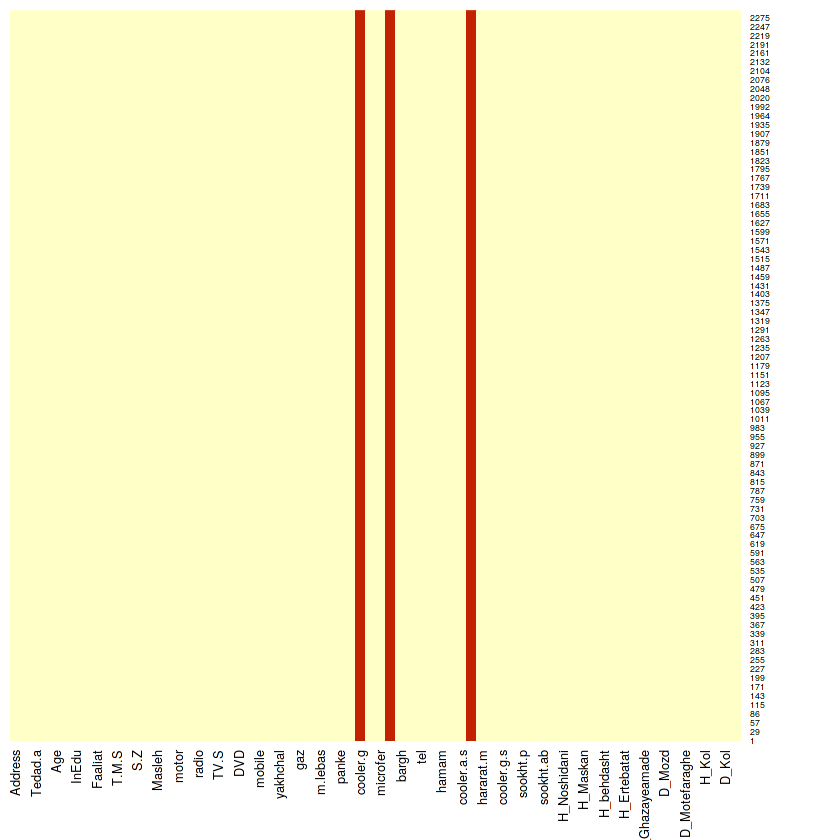

In [ ]:
heatmap(1*is.na(data),Rowv=NA,Colv=NA)

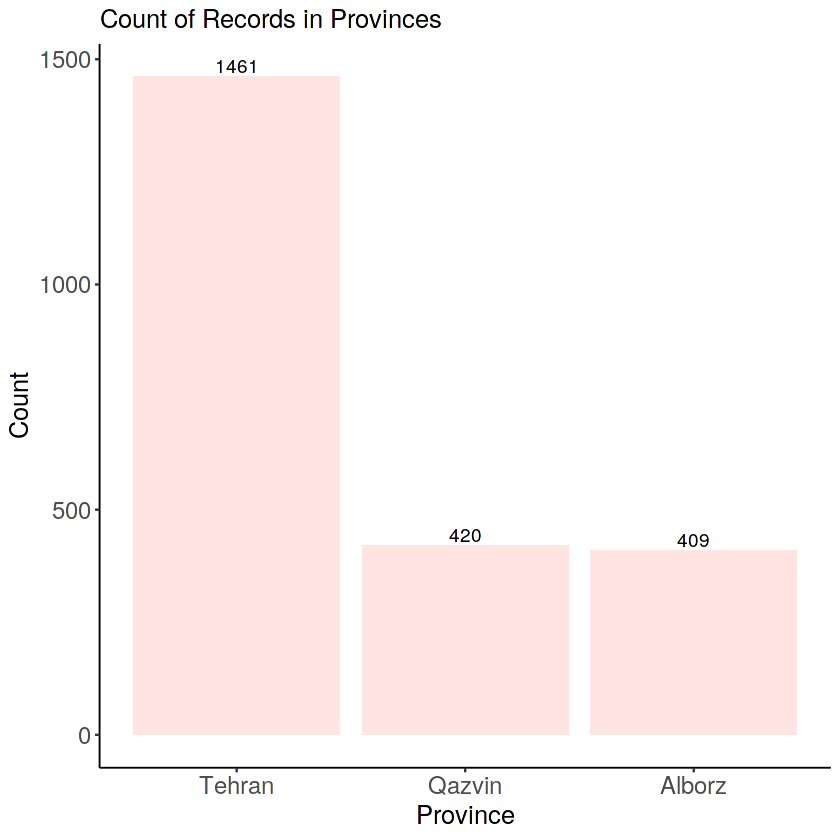

In [ ]:
plotdata <- data%>% 
  count(C.Ostan) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(C.Ostan, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) +
  labs(x = "Province",
       y = "Count",
       title = "Count of Records in Provinces") + theme(axis.line = element_line(size = 0.4, 
                                                                                   linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                                          panel.background = element_rect(fill = NA), 
                                                          plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                           axis.text = element_text(size = 14), 
                                                                                                                                                                                                                           plot.title = element_text(size = 15))


Warning message:
“Continuous limits supplied to discrete scale.
Did you mean `limits = factor(...)` or `scale_*_continuous()`?”


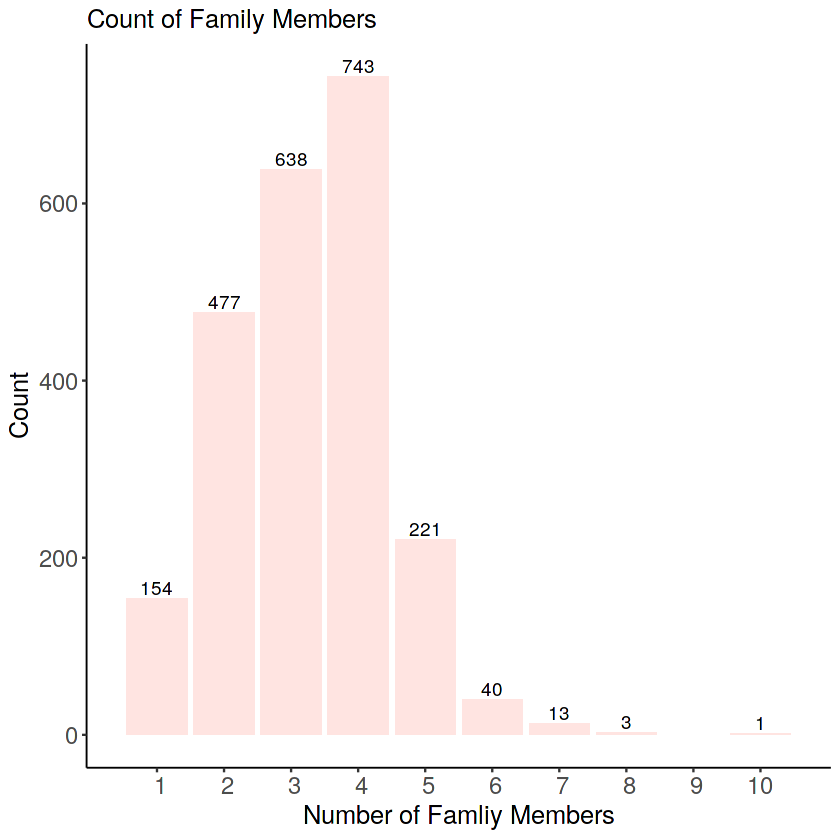

In [ ]:
plotdata <- data%>% 
  count(Tedad.a) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = Tedad.a, y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) + 
  scale_x_discrete(limits = c(1:10)) +
  labs(x = "Number of Famliy Members",
       y = "Count",
       title = "Count of Family Members") + theme(axis.line = element_line(size = 0.4, 
                                                                                 linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                                        panel.background = element_rect(fill = NA), 
                                                        plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                         axis.text = element_text(size = 14), 
                                                                                                                                                                                                                         plot.title = element_text(size = 15))


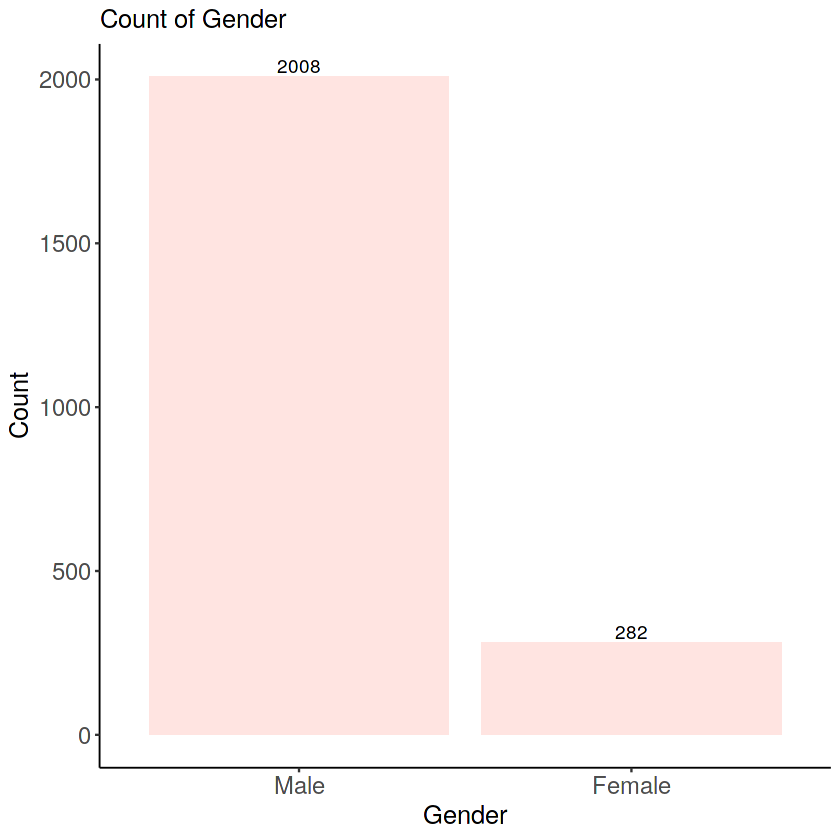

In [ ]:
plotdata <- data%>% 
  count(Gender) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(Gender, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) +
  labs(x = "Gender",
       y = "Count",
       title = "Count of Gender") + theme(axis.line = element_line(size = 0.4, 
                                                                                 linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                                        panel.background = element_rect(fill = NA), 
                                                        plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                         axis.text = element_text(size = 14), 
                                                                                                                                                                                                                         plot.title = element_text(size = 15))


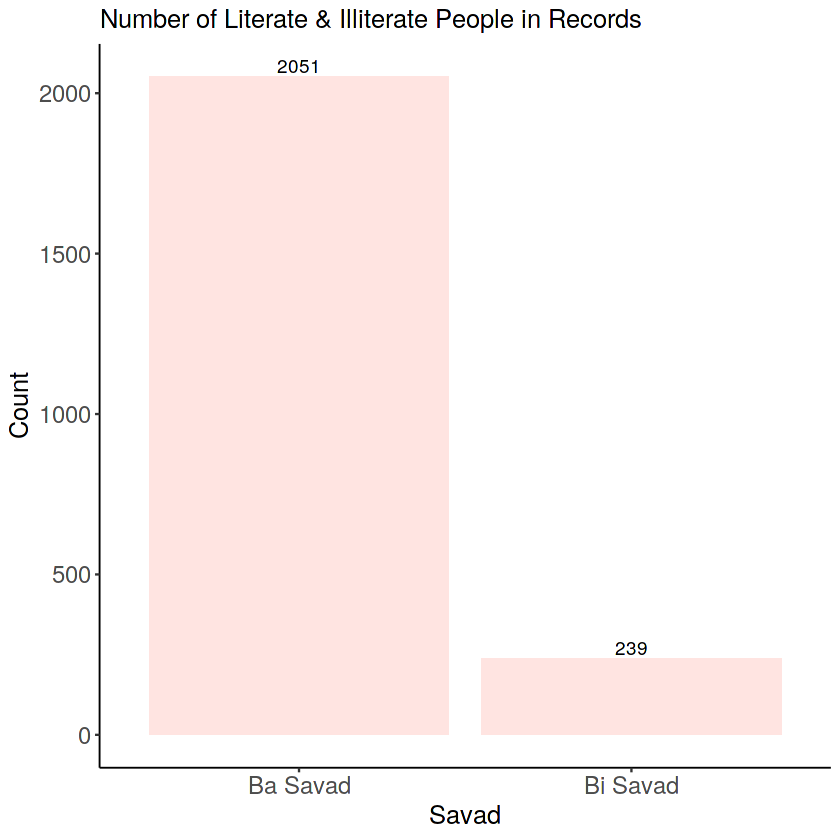

In [ ]:
plotdata <- data%>% 
  count(Savad) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(Savad, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) +
  labs(x = "Savad",
       y = "Count",
       title = "Number of Literate & Illiterate People in Records") + theme(axis.line = element_line(size = 0.4, 
                                                                          linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                                 panel.background = element_rect(fill = NA), 
                                                 plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
    axis.text = element_text(size = 14), 
    plot.title = element_text(size = 15))


Warning message:
“Continuous limits supplied to discrete scale.
Did you mean `limits = factor(...)` or `scale_*_continuous()`?”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



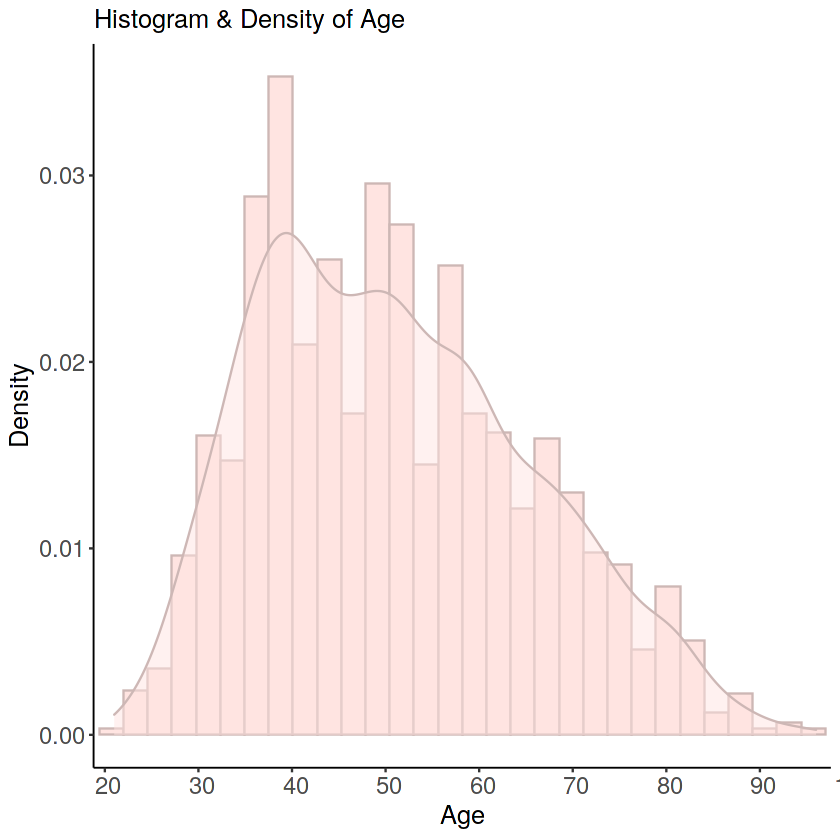

In [ ]:
ggplot(data, aes(x = Age)) + 
  geom_histogram(aes(y=..density..),fill = "mistyrose",color='mistyrose3') + ylab("Density") +
  labs(title = "Histogram & Density of Age" ,x = "Age") + scale_x_discrete(limits = seq(20,100,10)) +
  geom_density(alpha=.5, fill="mistyrose" , colour='mistyrose3') + theme(axis.line = element_line(size = 0.4, 
                                                                                                linetype = "solid"), panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                                axis.text = element_text(size = 14), 
                                                                                                                                                                                                                                plot.title = element_text(size = 15))


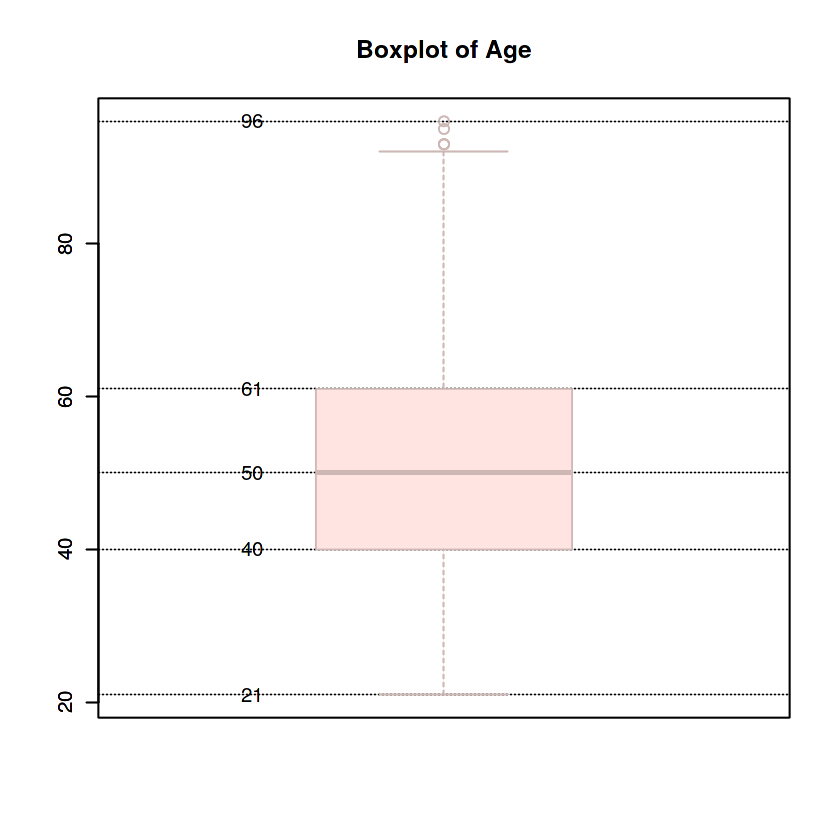

In [ ]:
boxplot(data$Age,main = "Boxplot of Age",col = "mistyrose",
        border = "mistyrose3") 
text(x=0.7,y=fivenum(data$Age),labels=fivenum(data$Age))
abline(h = min(data$Age), col = "Black",lty=3)
abline(h = max(data$Age), col = "Black",lty=3)
abline(h = median(data$Age), col = "Black",lty=3)
abline(h = quantile(data$Age, c(0.25, 0.75)), col = "Black",lty=3)
boxplot(data$Age,main = "Boxplot of Age",col = "mistyrose",
        border = "mistyrose3",add = TRUE) 


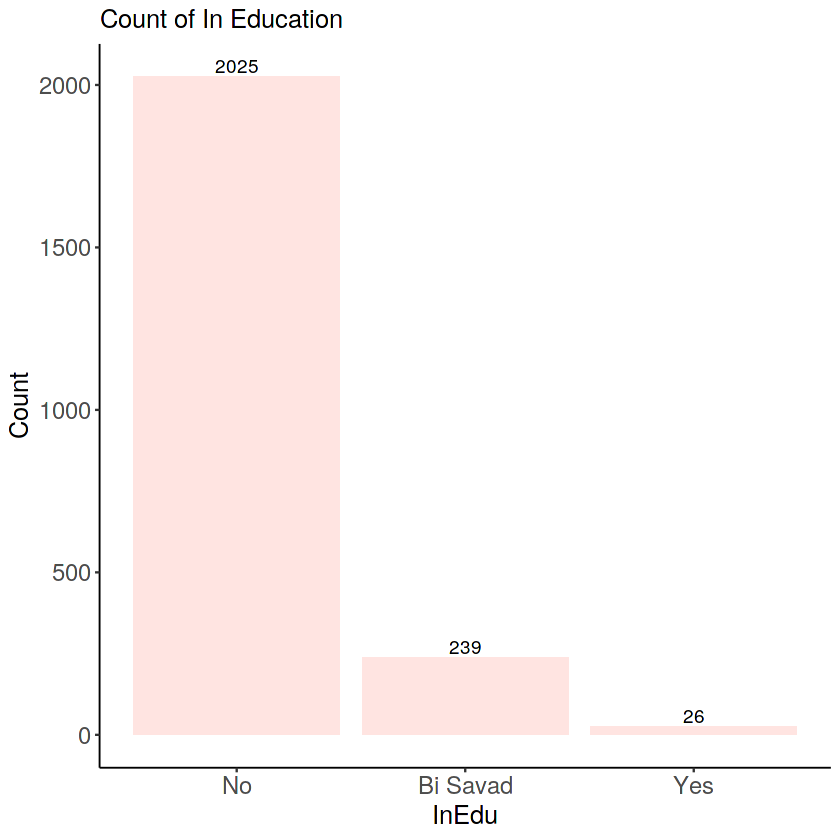

In [ ]:
plotdata <- data%>% 
  count(InEdu) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata ,aes(x = reorder(InEdu, -pct), y = pct), na.rm = TRUE) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) +
  labs(x = "InEdu",
       y = "Count",
       title = "Count of In Education") + theme(axis.line = element_line(size = 0.4, 
                                                                                                     linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                                                            panel.background = element_rect(fill = NA), 
                                                                            plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                                             axis.text = element_text(size = 14), 
                                                                                                                                                                                                                                             plot.title = element_text(size = 15))


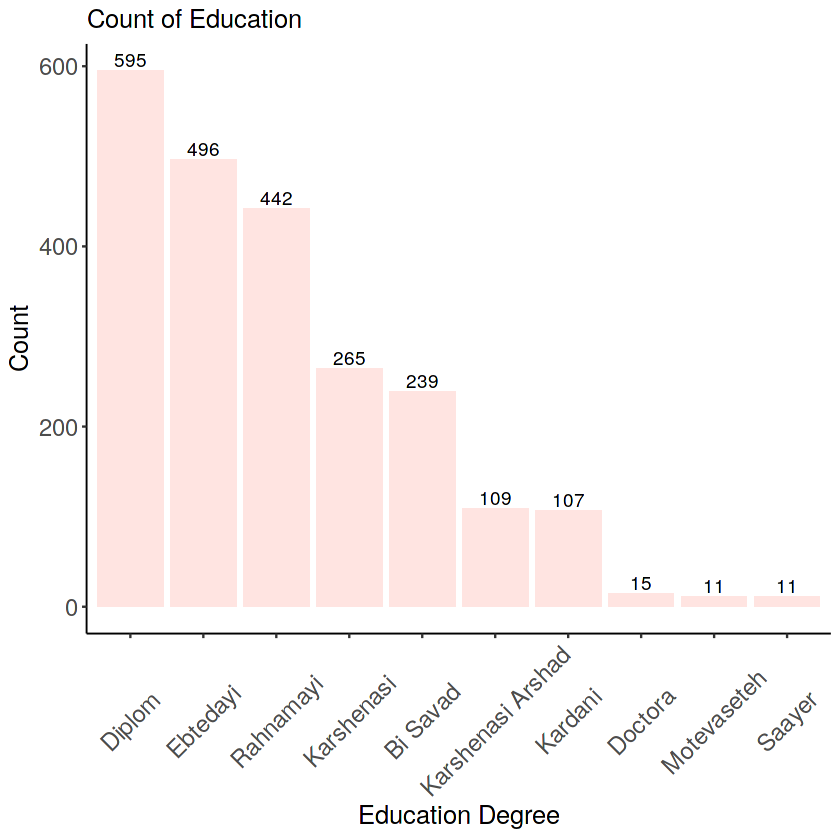

In [ ]:
plotdata <- data%>% 
  count(Edu) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata ,aes(x = reorder(Edu, -pct), y = pct), na.rm = TRUE) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) +
  labs(x = "Education Degree",
       y = "Count",
       title = "Count of Education") + theme(axis.line = element_line(size = 0.4, 
                                                                         linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                                panel.background = element_rect(fill = NA), 
                                                plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                 axis.text = element_text(size = 14), 
                                                                                                                                                                                                                 plot.title = element_text(size = 15)) + theme(axis.text.x = element_text(vjust = 0.5, 
    angle = 45))



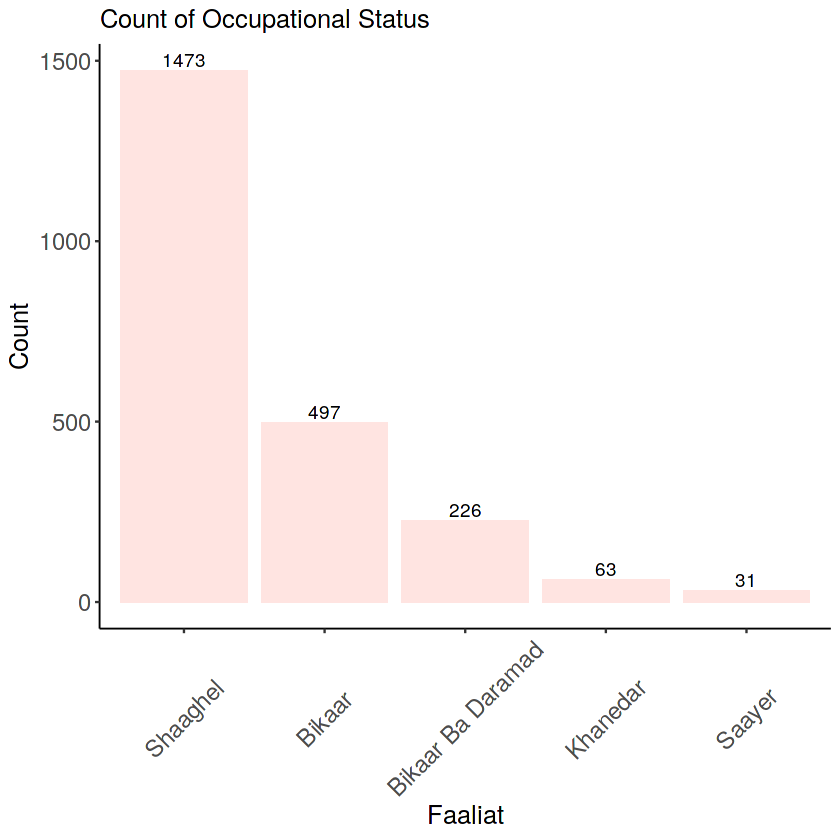

In [ ]:
plotdata <- data%>% 
  count(Faaliat) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata ,aes(x = reorder(Faaliat, -pct), y = pct), na.rm = TRUE) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) +
  labs(x = "Faaliat",
       y = "Count",
       title = "Count of Occupational Status") + theme(axis.line = element_line(size = 0.4, 
                                                                         linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                                panel.background = element_rect(fill = NA), 
                                                plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                 axis.text = element_text(size = 14), 
                                                                                                                                                                                                                 plot.title = element_text(size = 15)) + theme(axis.text.x = element_text(vjust = 0.5, 
                                                                                                                                                                                                                                                                                          angle = 45))



Warning message:
“Continuous limits supplied to discrete scale.
Did you mean `limits = factor(...)` or `scale_*_continuous()`?”


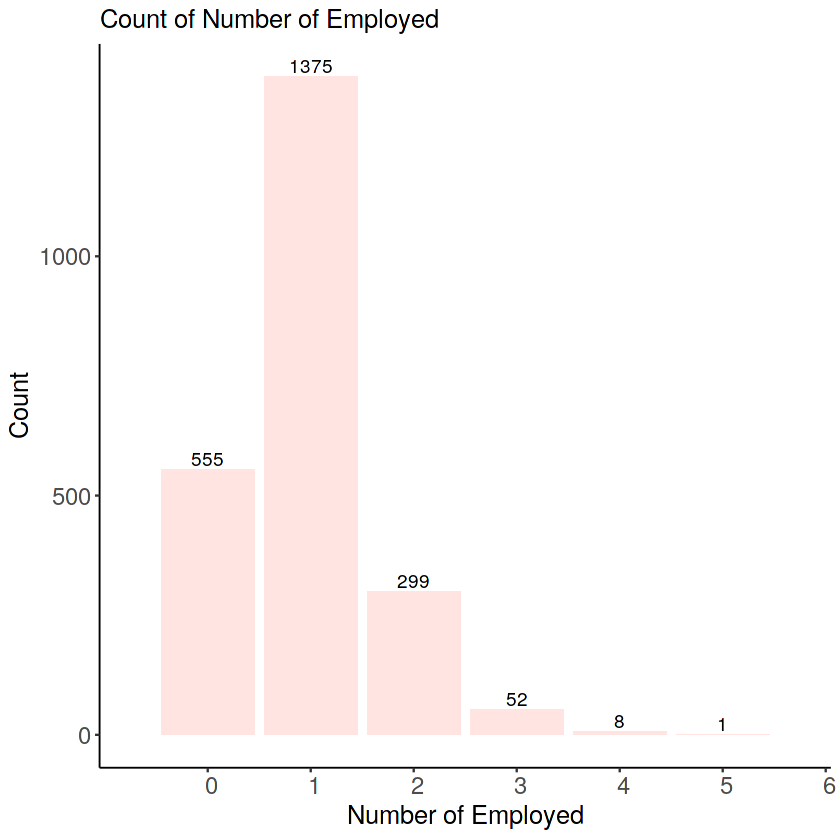

In [ ]:
plotdata <- data%>% 
  count(T.shaghel) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = T.shaghel, y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) + 
  scale_x_discrete(limits = c(0:10)) +
  labs(x = "Number of Employed",
       y = "Count",
       title = "Count of Number of Employed") + theme(axis.line = element_line(size = 0.4, 
                                                                           linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                                  panel.background = element_rect(fill = NA), 
                                                  plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                   axis.text = element_text(size = 14), 
                                                                                                                                                                                                                   plot.title = element_text(size = 15))


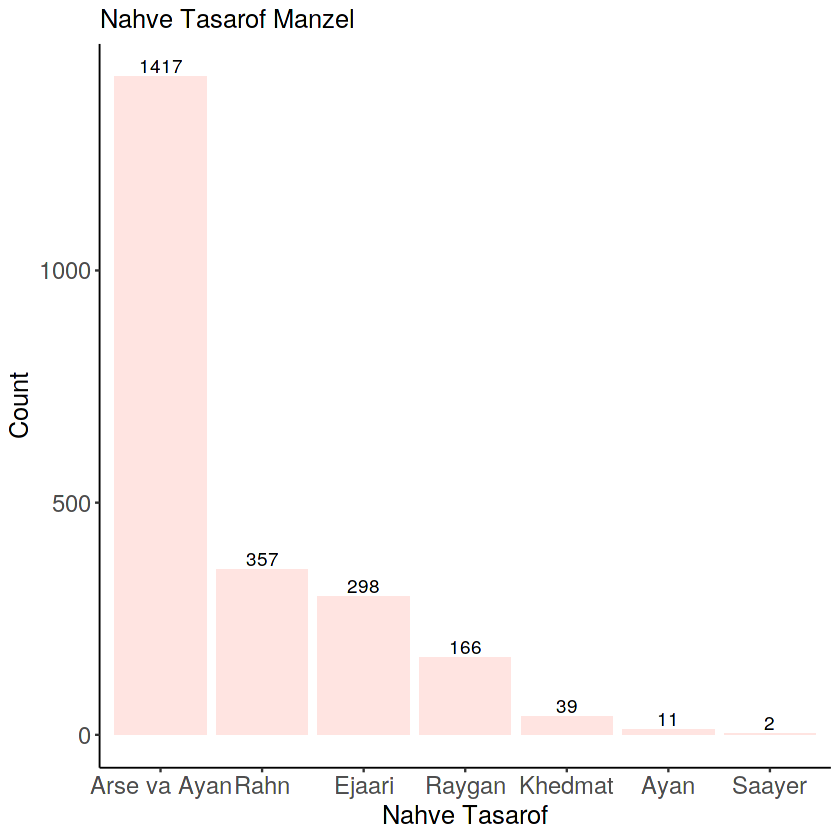

In [ ]:
plotdata <- data%>% 
  count(T.M.S) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(T.M.S, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) +
  labs(x = "Nahve Tasarof",
       y = "Count",
       title = "Nahve Tasarof Manzel") + theme(axis.line = element_line(size = 0.4, 
                                                                   linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                          panel.background = element_rect(fill = NA), 
                                          plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                           axis.text = element_text(size = 14), 
                                                                                                                                                                                                           plot.title = element_text(size = 15))


Warning message:
“Continuous limits supplied to discrete scale.
Did you mean `limits = factor(...)` or `scale_*_continuous()`?”


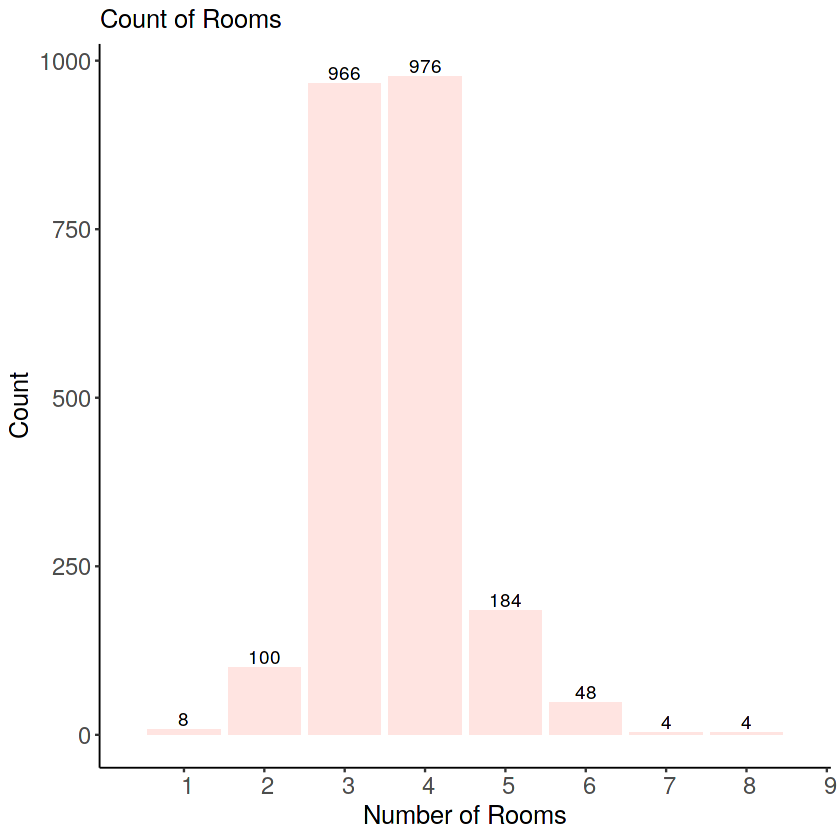

In [ ]:
plotdata <- data%>% 
  count(T.O) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = T.O, y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) + 
  scale_x_discrete(limits = c(1:10)) +
  labs(x = "Number of Rooms",
       y = "Count",
       title = "Count of Rooms") + theme(axis.line = element_line(size = 0.4, 
                                                                           linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                                  panel.background = element_rect(fill = NA), 
                                                  plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                   axis.text = element_text(size = 14), 
                                                                                                                                                                                                                   plot.title = element_text(size = 15))


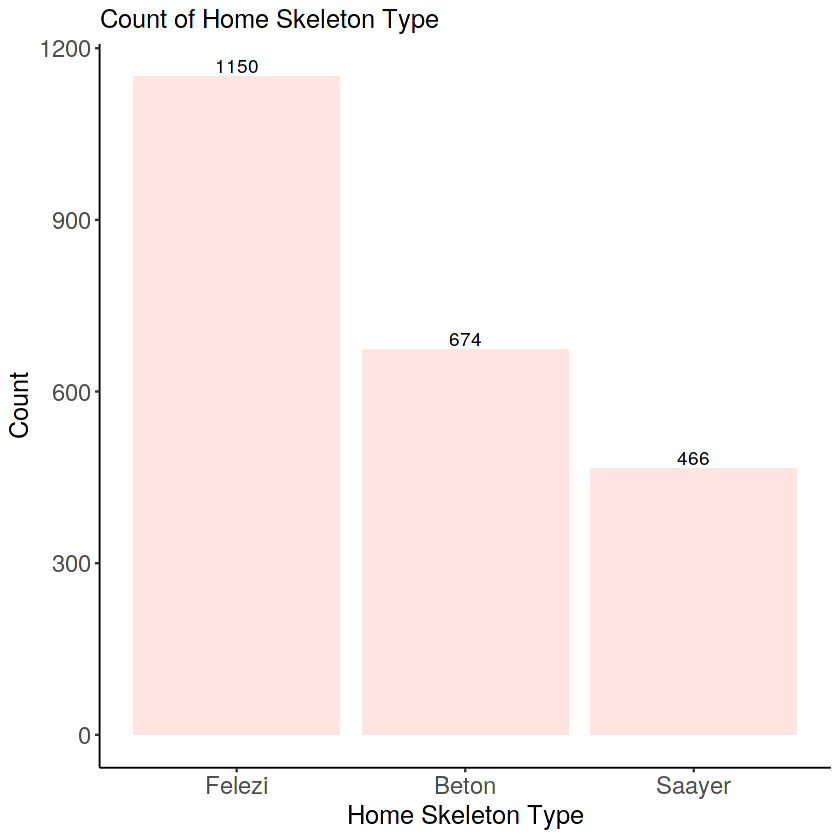

In [ ]:
plotdata <- data%>% 
  count(N.S) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(N.S, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) +
  labs(x = "Home Skeleton Type",
       y = "Count",
       title = "Count of Home Skeleton Type") + theme(axis.line = element_line(size = 0.4, 
                                                                                                     linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                                                            panel.background = element_rect(fill = NA), 
                                                                            plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                                             axis.text = element_text(size = 14), 
                                                                                                                                                                                                                                             plot.title = element_text(size = 15))


In [ ]:
data$Masleh[data$Masleh==3]='Felezi'
data$Masleh[data$Masleh==5]='Beton'

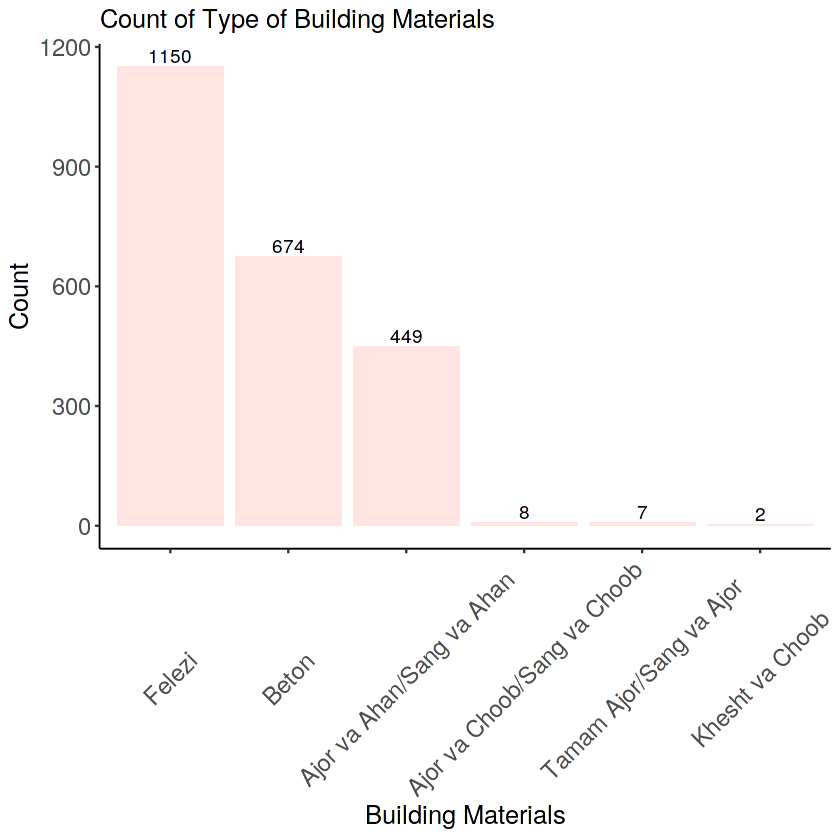

In [ ]:
plotdata <- data%>% 
  count(Masleh) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(Masleh, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) +
  labs(x = "Building Materials",
       y = "Count",
       title = "Count of Type of Building Materials") + theme(axis.line = element_line(size = 0.4, 
                                                                               linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                                      panel.background = element_rect(fill = NA), 
                                                      plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                       axis.text = element_text(size = 14), 
                                                                                                                                                                                                                       plot.title = element_text(size = 15)) + theme(axis.text.x = element_text(vjust = 0.5, 
                                                                                                                                                                                                                                                                                                angle = 45))


Warning message:
“Continuous limits supplied to discrete scale.
Did you mean `limits = factor(...)` or `scale_*_continuous()`?”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



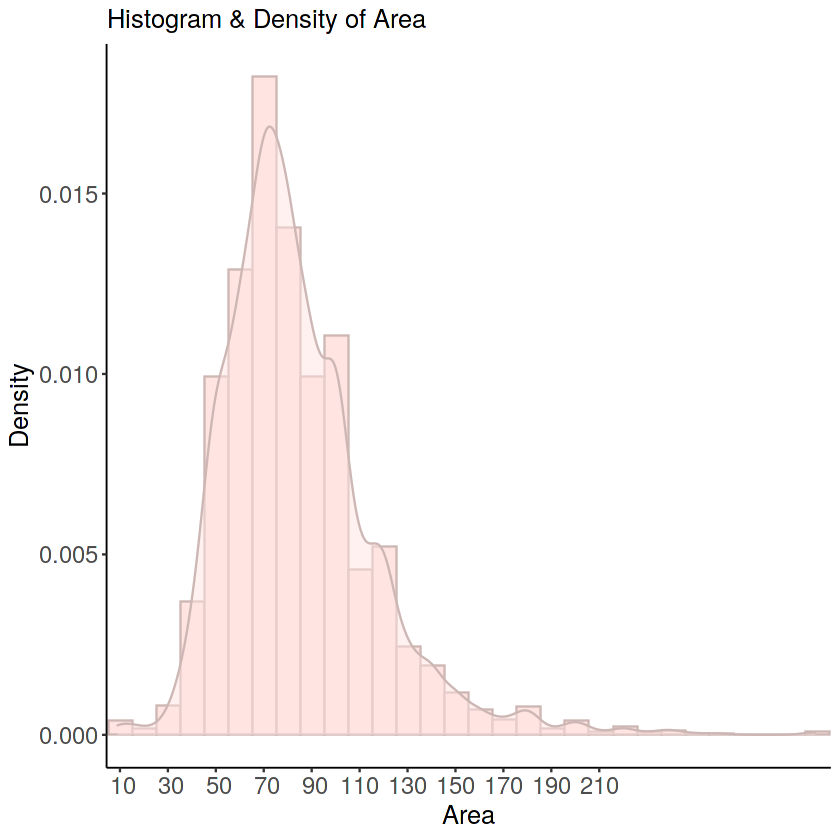

In [ ]:
ggplot(data, aes(x = S.Z)) + 
  geom_histogram(aes(y=..density..),fill = "mistyrose",color='mistyrose3') + ylab("Density") +
  labs(title = "Histogram & Density of Area" ,x = "Area") + scale_x_discrete(limits = seq(10,220,20)) +
  geom_density(alpha=.5, fill="mistyrose" , colour='mistyrose3') + theme(axis.line = element_line(size = 0.4, 
                                                                                                  linetype = "solid"), panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                                  axis.text = element_text(size = 14), 
                                                                                                                                                                                                                                  plot.title = element_text(size = 15))


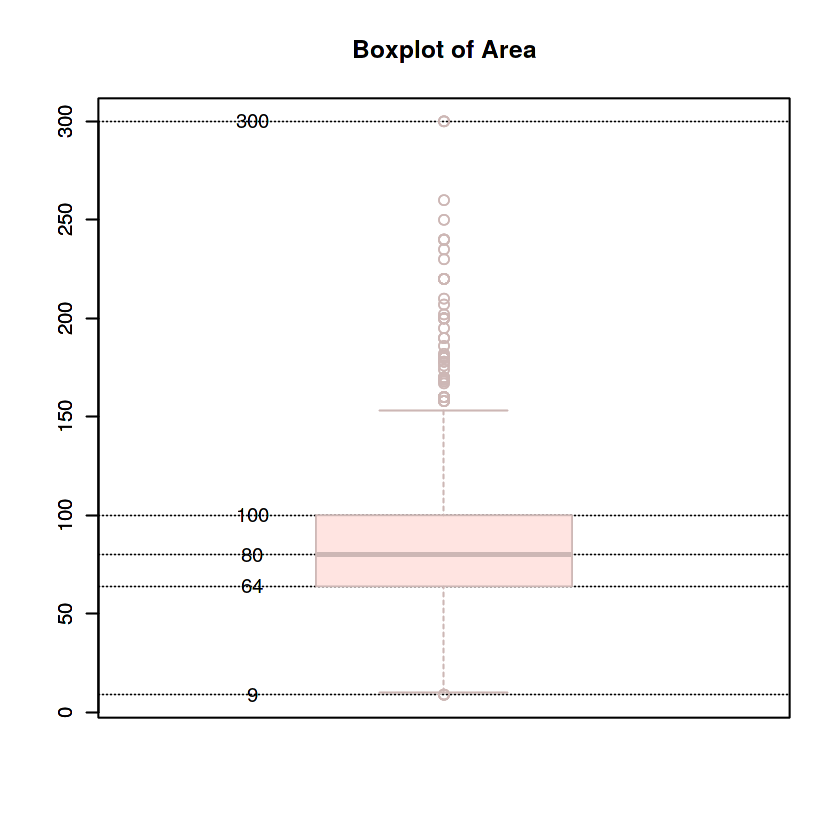

In [ ]:
boxplot(data$S.Z,main = "Boxplot of Area",col = "mistyrose",
        border = "mistyrose3") 
text(x=0.7,y=fivenum(data$S.Z),labels=fivenum(data$S.Z))
abline(h = min(data$S.Z), col = "Black",lty=3)
abline(h = max(data$S.Z), col = "Black",lty=3)
abline(h = median(data$S.Z), col = "Black",lty=3)
abline(h = quantile(data$S.Z, c(0.25, 0.75)), col = "Black",lty=3)
boxplot(data$S.Z,main = "Boxplot of Area",col = "mistyrose",
        border = "mistyrose3",add = TRUE) 


Warning message:
“Continuous limits supplied to discrete scale.
Did you mean `limits = factor(...)` or `scale_*_continuous()`?”


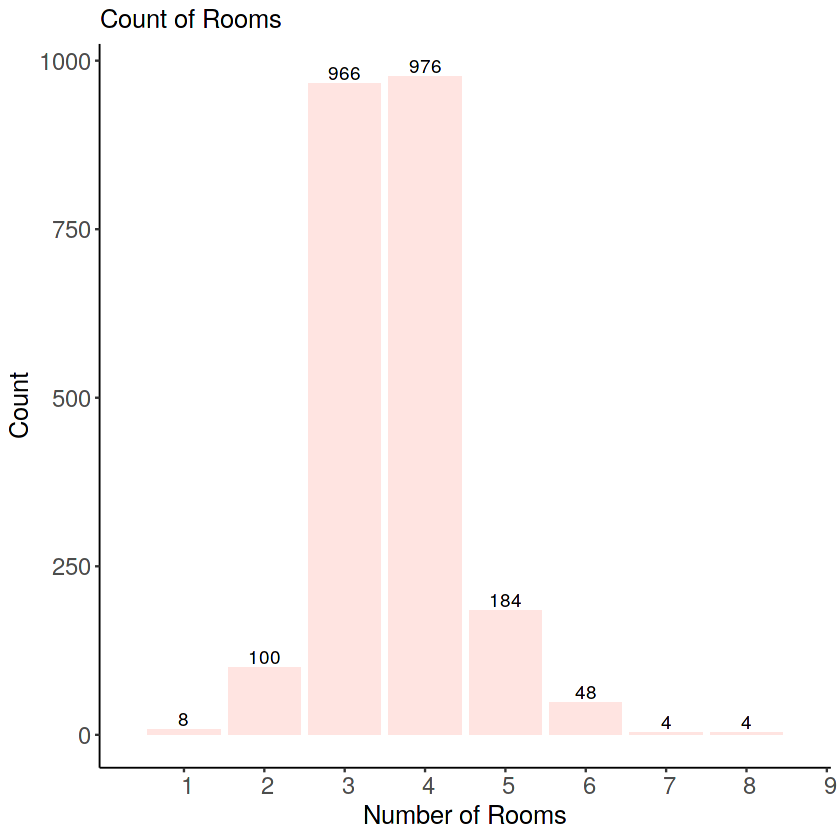

In [ ]:
plotdata <- data%>% 
  count(T.O) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = T.O, y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) + 
  scale_x_discrete(limits = c(1:10)) +
  labs(x = "Number of Rooms",
       y = "Count",
       title = "Count of Rooms") + theme(axis.line = element_line(size = 0.4, 
                                                                  linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                         panel.background = element_rect(fill = NA), 
                                         plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                          axis.text = element_text(size = 14), 
                                                                                                                                                                                                          plot.title = element_text(size = 15))


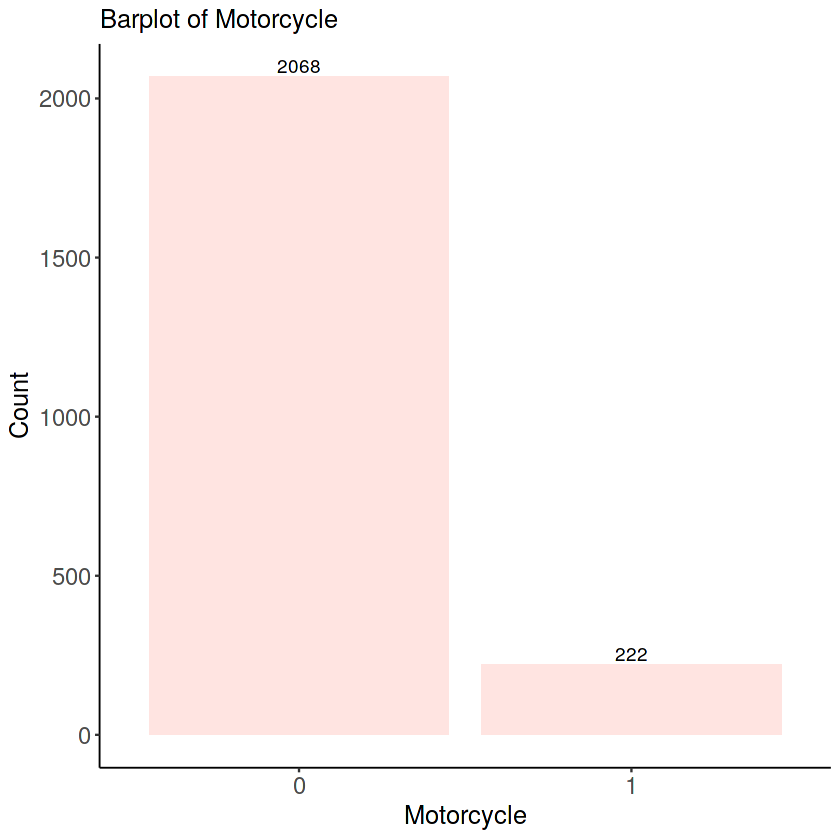

In [ ]:
plotdata <- data%>% 
  count(motor) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(motor, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) +
  labs(x = "Motorcycle",
       y = "Count",
       title = "Barplot of Motorcycle") + theme(axis.line = element_line(size = 0.4, 
                                                                  linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                         panel.background = element_rect(fill = NA), 
                                         plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                          axis.text = element_text(size = 14), 
                                                                                                                                                                                                          plot.title = element_text(size = 15))


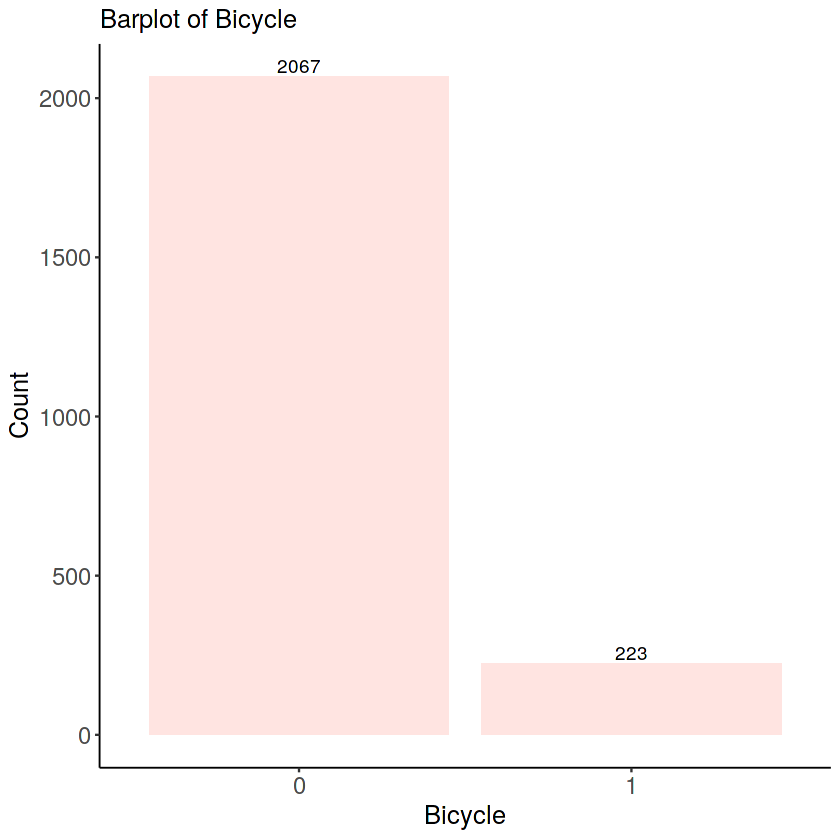

In [ ]:
plotdata <- data%>% 
  count(do) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(do, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) +
  labs(x = "Bicycle",
       y = "Count",
       title = "Barplot of Bicycle") + theme(axis.line = element_line(size = 0.4, 
                                                                         linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                                panel.background = element_rect(fill = NA), 
                                                plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                 axis.text = element_text(size = 14), 
                                                                                                                                                                                                                 plot.title = element_text(size = 15))


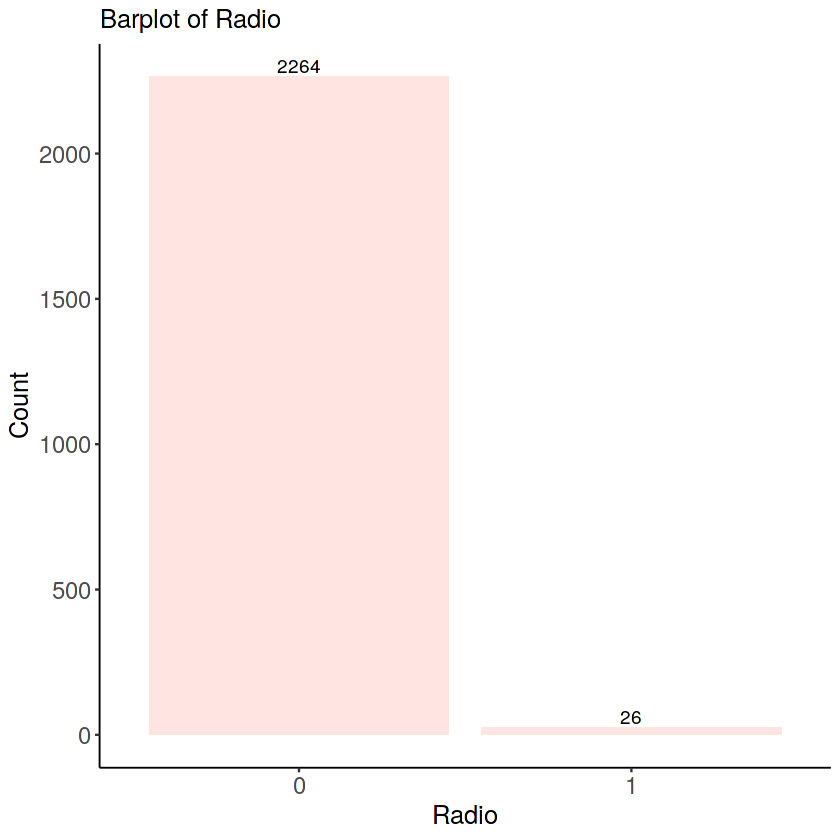

In [ ]:
plotdata <- data%>% 
  count(radio) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(radio, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) +
  labs(x = "Radio",
       y = "Count",
       title = "Barplot of Radio") + theme(axis.line = element_line(size = 0.4, 
                                                                      linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                             panel.background = element_rect(fill = NA), 
                                             plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                              axis.text = element_text(size = 14), 
                                                                                                                                                                                                              plot.title = element_text(size = 15))


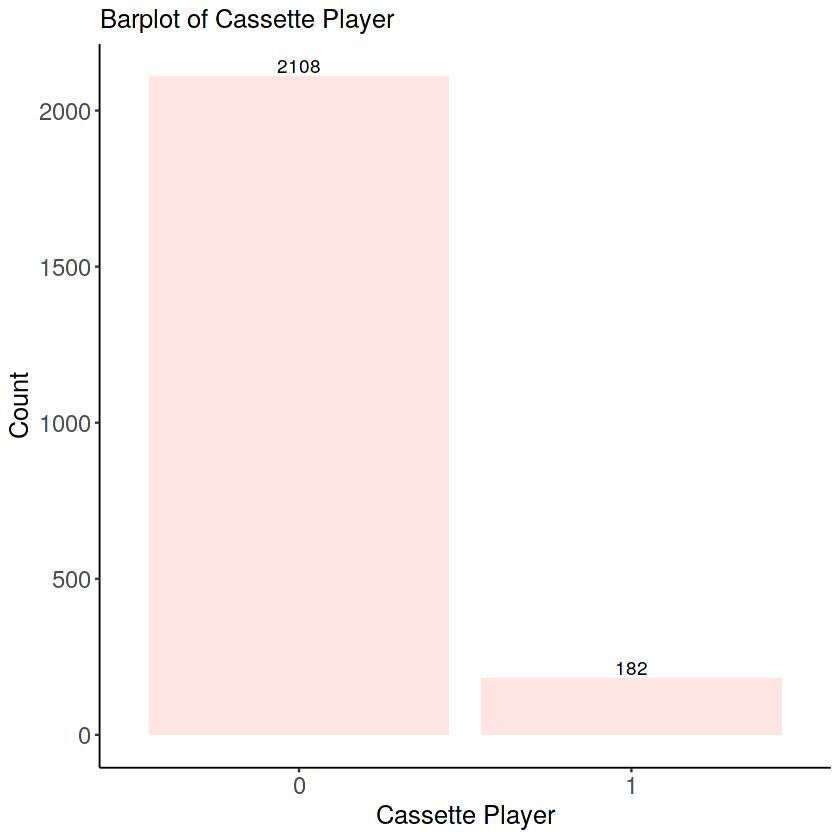

In [ ]:
plotdata <- data%>% 
  count(zabt) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(zabt, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) +
  labs(x = "Cassette Player",
       y = "Count",
       title = "Barplot of Cassette Player") + theme(axis.line = element_line(size = 0.4, 
                                                                      linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                             panel.background = element_rect(fill = NA), 
                                             plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                              axis.text = element_text(size = 14), 
                                                                                                                                                                                                              plot.title = element_text(size = 15))


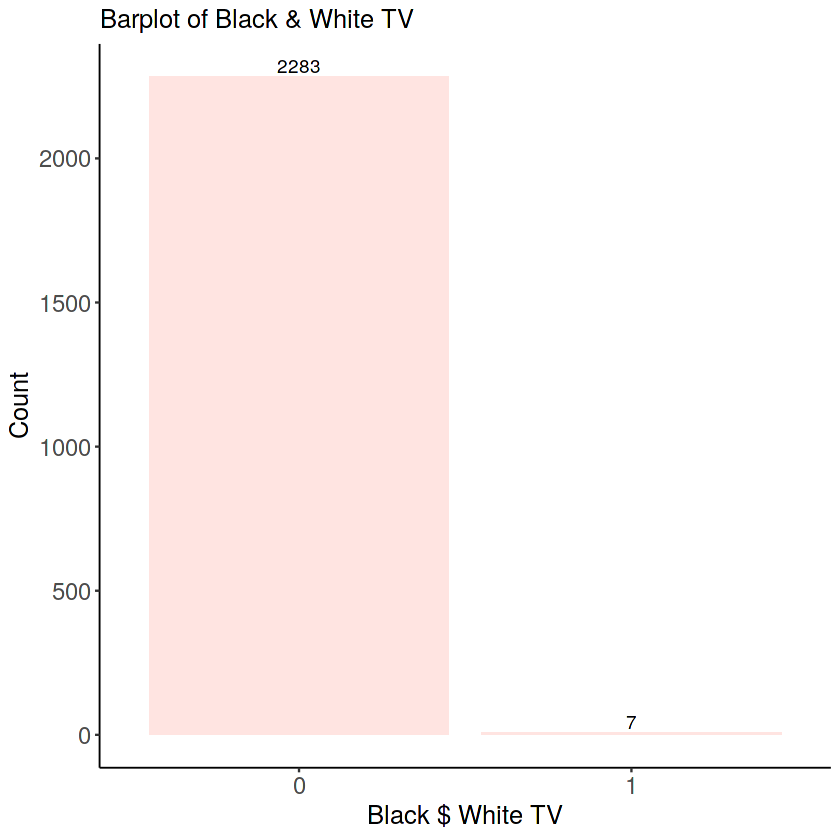

In [ ]:
plotdata <- data%>% 
  count(TV.S) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(TV.S, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) +
  labs(x = "Black $ White TV",
       y = "Count",
       title = "Barplot of Black & White TV") + theme(axis.line = element_line(size = 0.4, 
                                                                              linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                                     panel.background = element_rect(fill = NA), 
                                                     plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                      axis.text = element_text(size = 14), 
                                                                                                                                                                                                                      plot.title = element_text(size = 15))


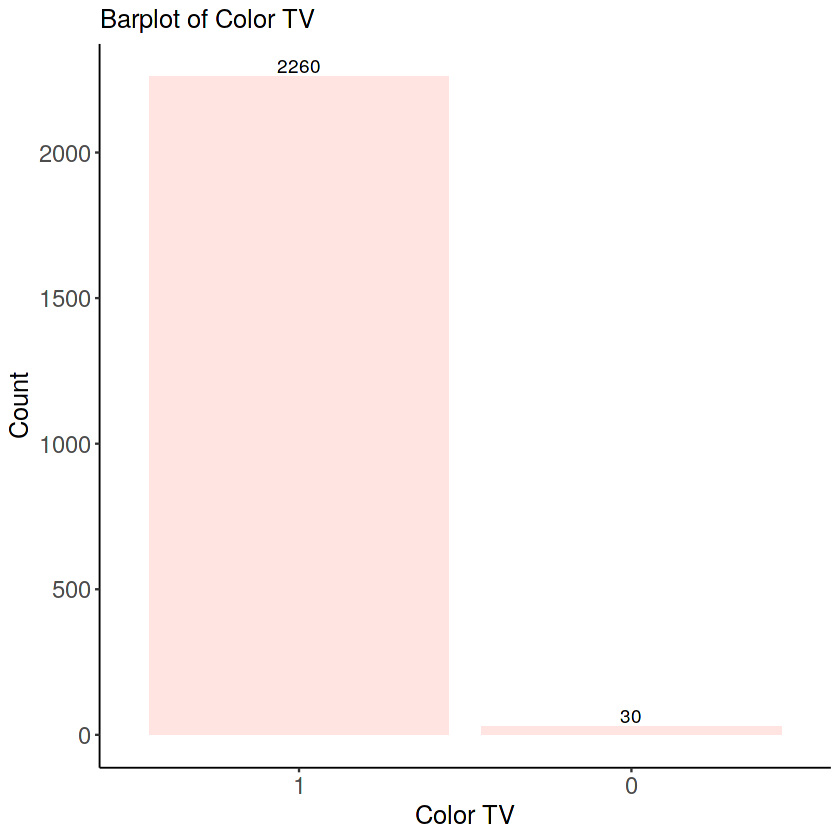

In [ ]:
plotdata <- data%>% 
  count(TV.r) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(TV.r, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) +
  labs(x = "Color TV",
       y = "Count",
       title = "Barplot of Color TV") + theme(axis.line = element_line(size = 0.4, 
                                                                               linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                                      panel.background = element_rect(fill = NA), 
                                                      plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                       axis.text = element_text(size = 14), 
                                                                                                                                                                                                                       plot.title = element_text(size = 15))


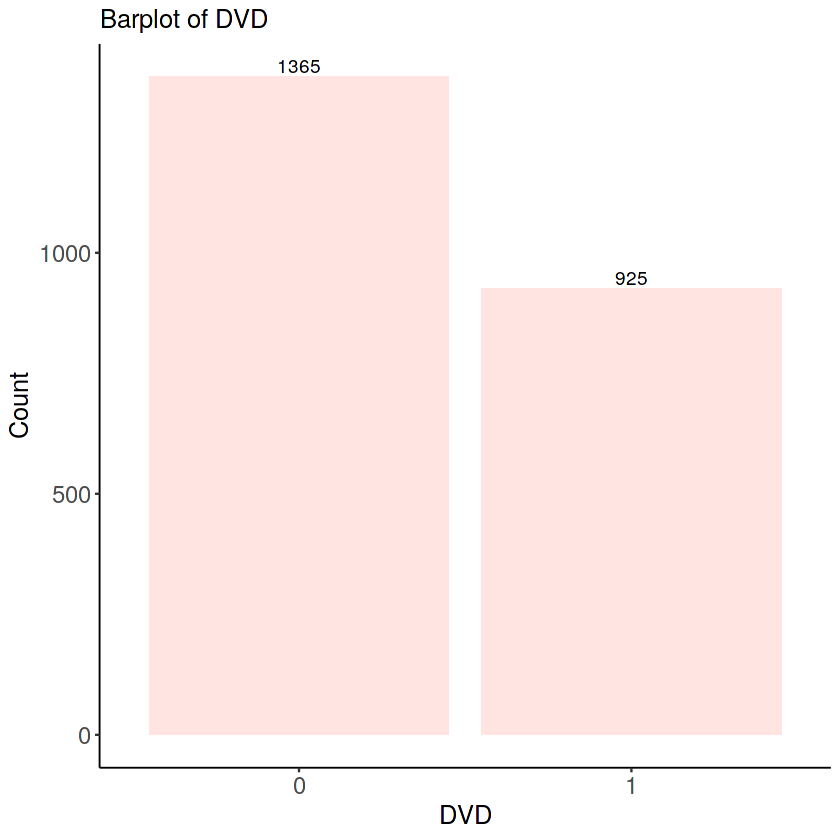

In [ ]:
plotdata <- data%>% 
  count(DVD) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(DVD, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) +
  labs(x = "DVD",
       y = "Count",
       title = "Barplot of DVD") + theme(axis.line = element_line(size = 0.4, 
                                                                       linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                              panel.background = element_rect(fill = NA), 
                                              plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                               axis.text = element_text(size = 14), 
                                                                                                                                                                                                               plot.title = element_text(size = 15))


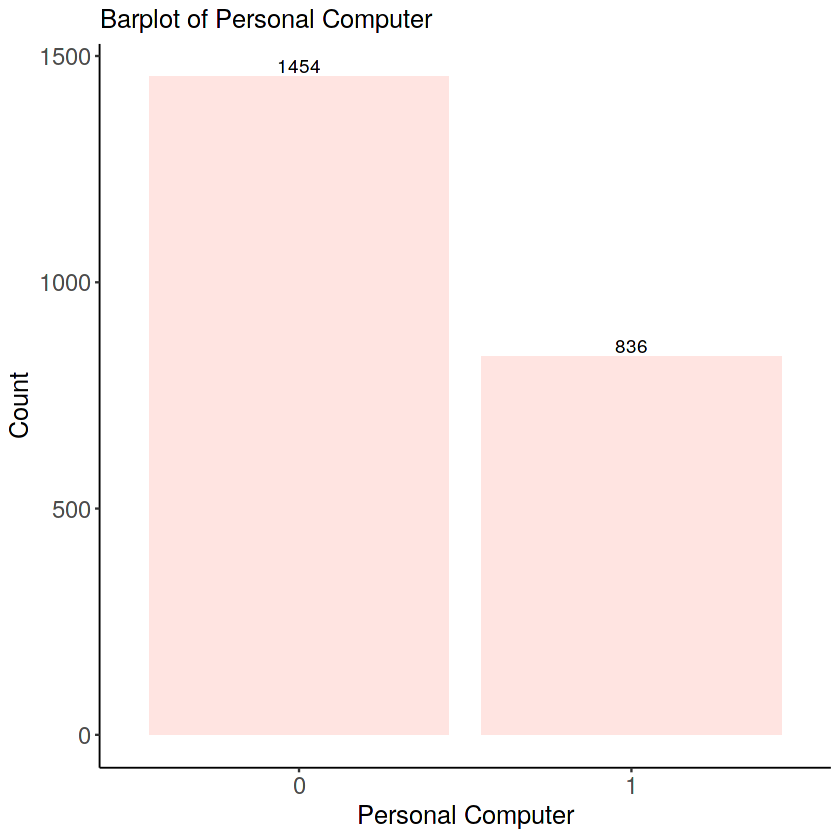

In [ ]:
plotdata <- data%>% 
  count(Pc) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(Pc, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) +
  labs(x = "Personal Computer",
       y = "Count",
       title = "Barplot of Personal Computer") + theme(axis.line = element_line(size = 0.4, 
                                                                  linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                         panel.background = element_rect(fill = NA), 
                                         plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                          axis.text = element_text(size = 14), 
                                                                                                                                                                                                          plot.title = element_text(size = 15))


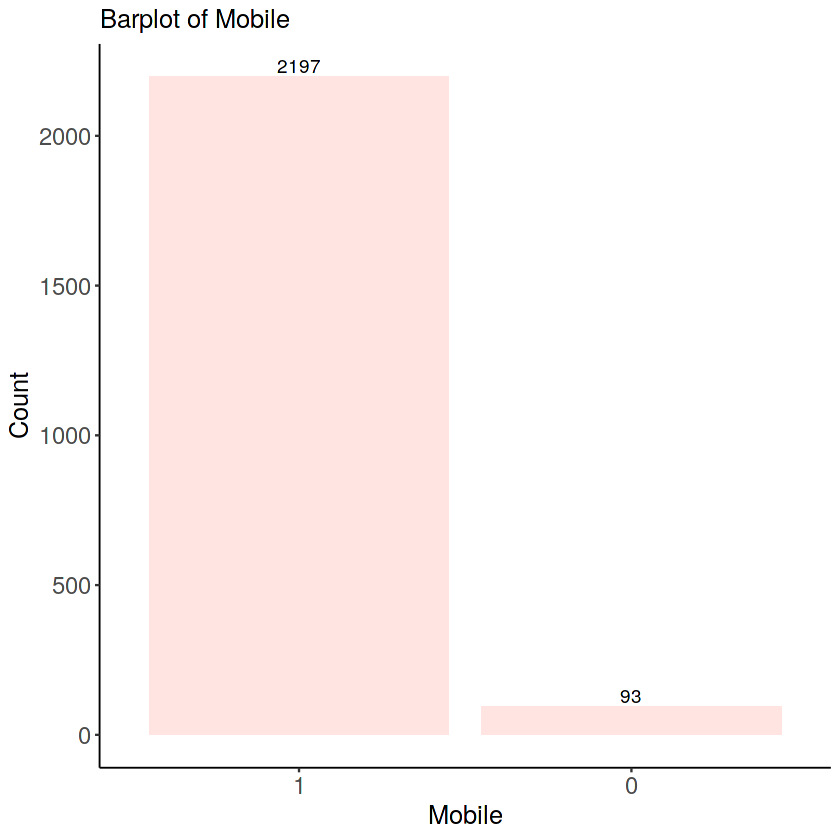

In [ ]:
plotdata <- data%>% 
  count(mobile) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(mobile, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) +
  labs(x = "Mobile",
       y = "Count",
       title = "Barplot of Mobile") + theme(axis.line = element_line(size = 0.4, 
                                                                                linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                                       panel.background = element_rect(fill = NA), 
                                                       plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                        axis.text = element_text(size = 14), 
                                                                                                                                                                                                                        plot.title = element_text(size = 15))


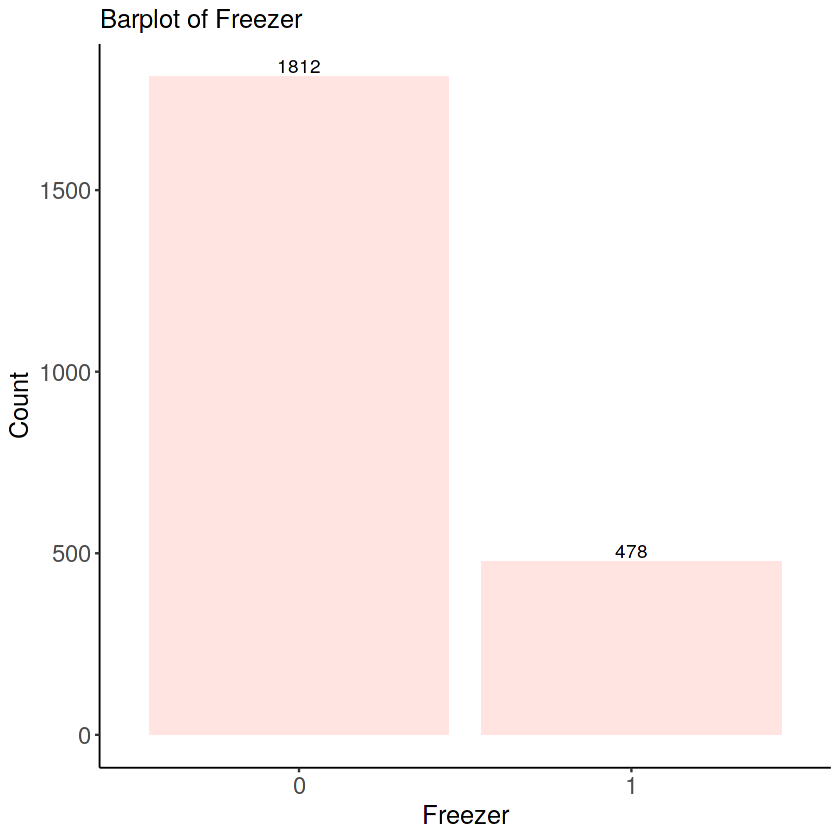

In [ ]:
plotdata <- data%>% 
  count(freeizer) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(freeizer, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) +
  labs(x = "Freezer",
       y = "Count",
       title = "Barplot of Freezer") + theme(axis.line = element_line(size = 0.4, 
                                                                     linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                            panel.background = element_rect(fill = NA), 
                                            plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                             axis.text = element_text(size = 14), 
                                                                                                                                                                                                             plot.title = element_text(size = 15))


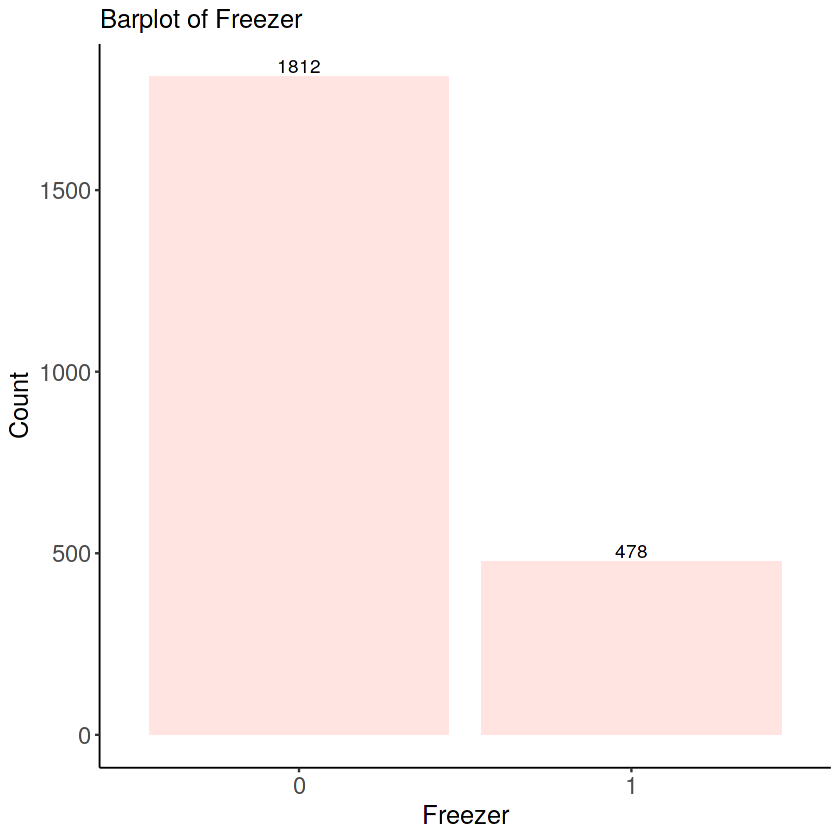

In [ ]:
plotdata <- data%>% 
  count(freeizer) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(freeizer, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) +
  labs(x = "Freezer",
       y = "Count",
       title = "Barplot of Freezer") + theme(axis.line = element_line(size = 0.4, 
                                                                      linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                             panel.background = element_rect(fill = NA), 
                                             plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                              axis.text = element_text(size = 14), 
                                                                                                                                                                                                              plot.title = element_text(size = 15))


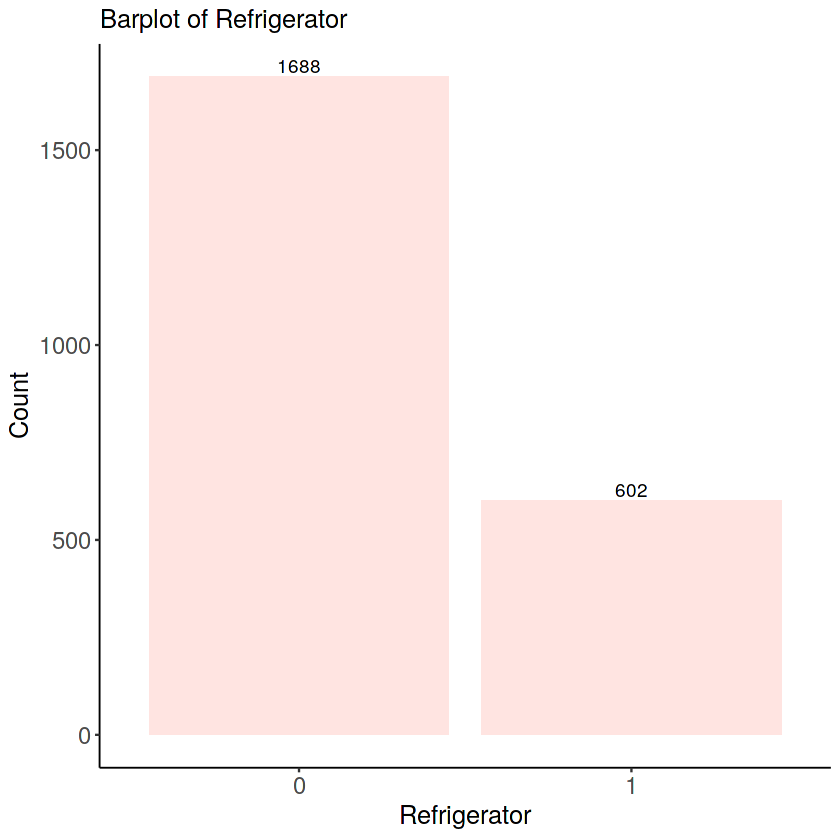

In [ ]:
plotdata <- data%>% 
  count(yakhchal) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(yakhchal, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) +
  labs(x = "Refrigerator",
       y = "Count",
       title = "Barplot of Refrigerator") + theme(axis.line = element_line(size = 0.4, 
                                                                      linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                             panel.background = element_rect(fill = NA), 
                                             plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                              axis.text = element_text(size = 14), 
                                                                                                                                                                                                              plot.title = element_text(size = 15))


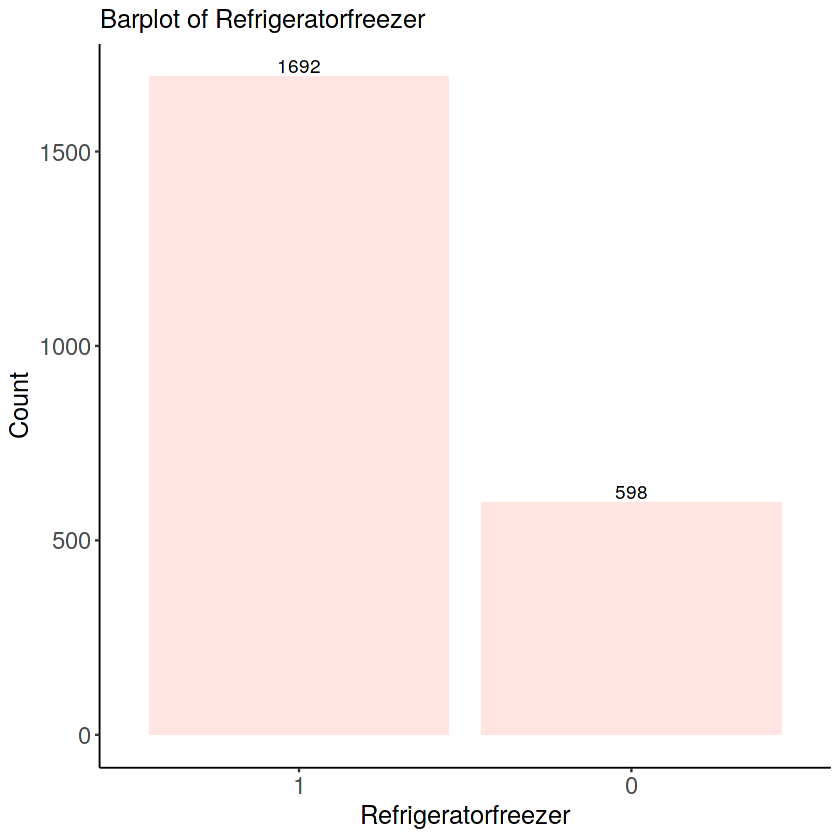

In [ ]:
plotdata <- data%>% 
  count(yakhchal.f) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(yakhchal.f, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) +
  labs(x = "Refrigeratorfreezer",
       y = "Count",
       title = "Barplot of Refrigeratorfreezer") + theme(axis.line = element_line(size = 0.4, 
                                                                           linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                                  panel.background = element_rect(fill = NA), 
                                                  plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                   axis.text = element_text(size = 14), 
                                                                                                                                                                                                                   plot.title = element_text(size = 15))


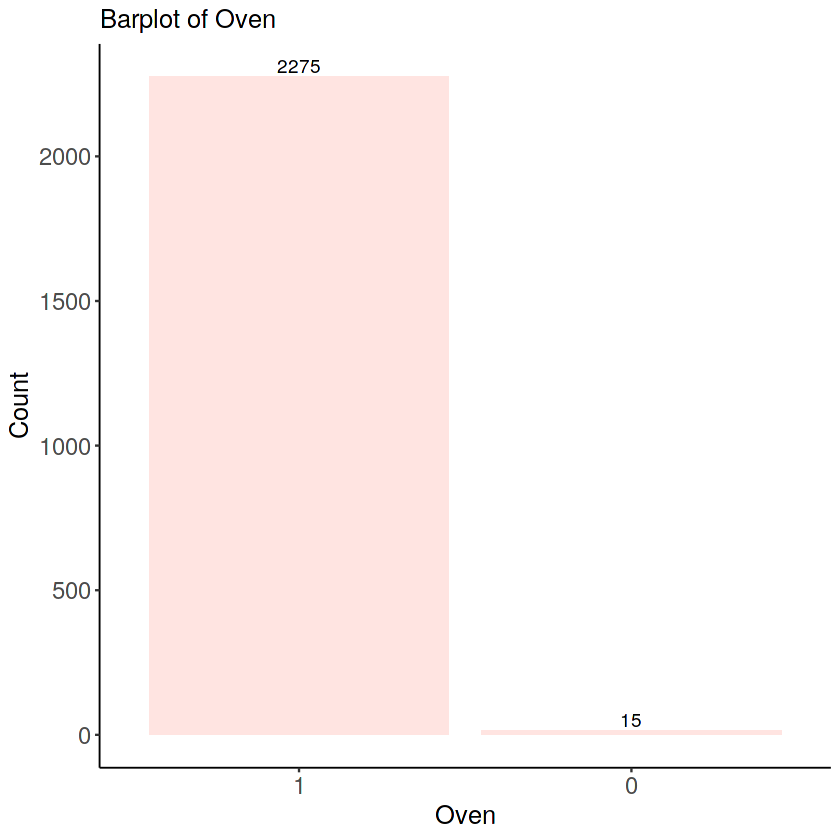

In [ ]:
plotdata <- data%>% 
  count(gaz) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(gaz, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) +
  labs(x = "Oven",
       y = "Count",
       title = "Barplot of Oven") + theme(axis.line = element_line(size = 0.4, 
                                                                                  linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                                         panel.background = element_rect(fill = NA), 
                                                         plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                          axis.text = element_text(size = 14), 
                                                                                                                                                                                                                          plot.title = element_text(size = 15))


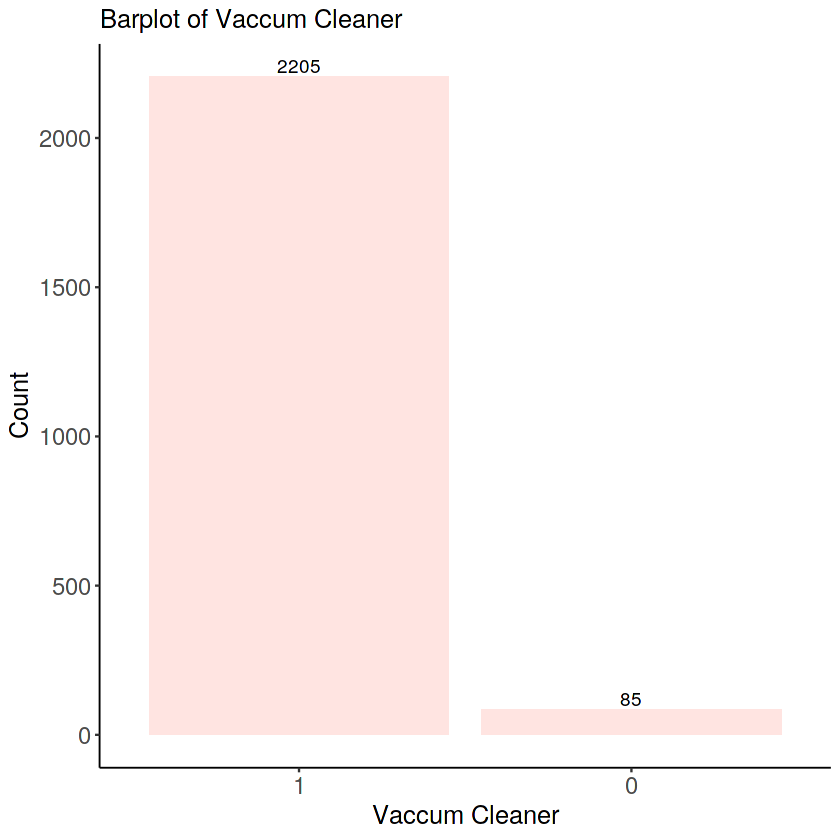

In [ ]:
plotdata <- data%>% 
  count(jaro.b) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(jaro.b, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) +
  labs(x = "Vaccum Cleaner",
       y = "Count",
       title = "Barplot of Vaccum Cleaner") + theme(axis.line = element_line(size = 0.4, 
                                                                   linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                          panel.background = element_rect(fill = NA), 
                                          plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                           axis.text = element_text(size = 14), 
                                                                                                                                                                                                           plot.title = element_text(size = 15))


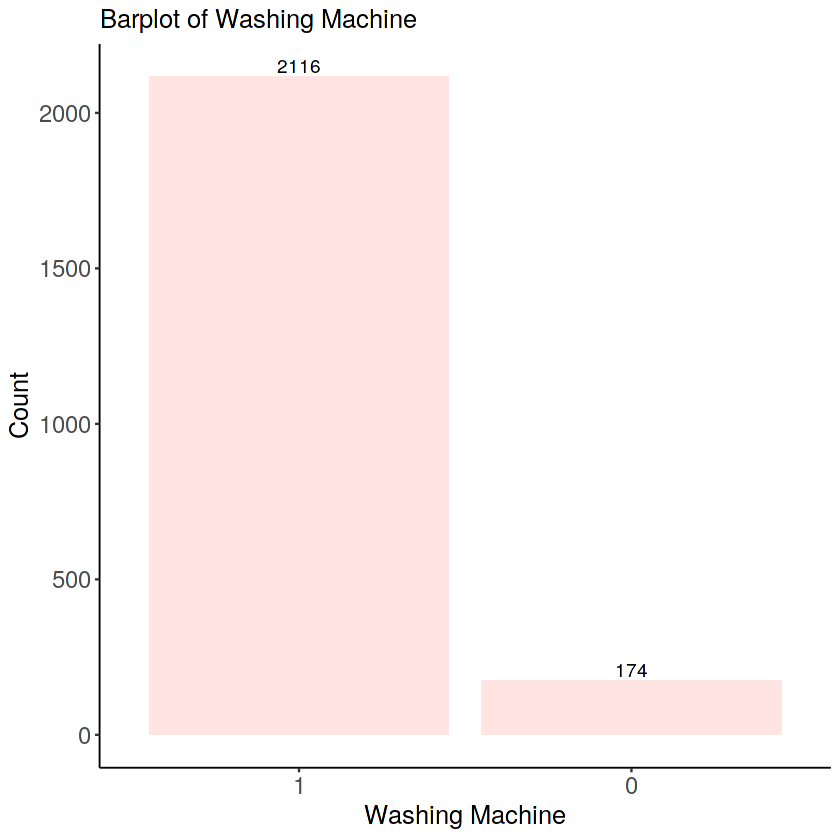

In [ ]:
plotdata <- data%>% 
  count(m.lebas) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(m.lebas, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) +
  labs(x = "Washing Machine",
       y = "Count",
       title = "Barplot of Washing Machine") + theme(axis.line = element_line(size = 0.4, 
                                                                             linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                                    panel.background = element_rect(fill = NA), 
                                                    plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                     axis.text = element_text(size = 14), 
                                                                                                                                                                                                                     plot.title = element_text(size = 15))


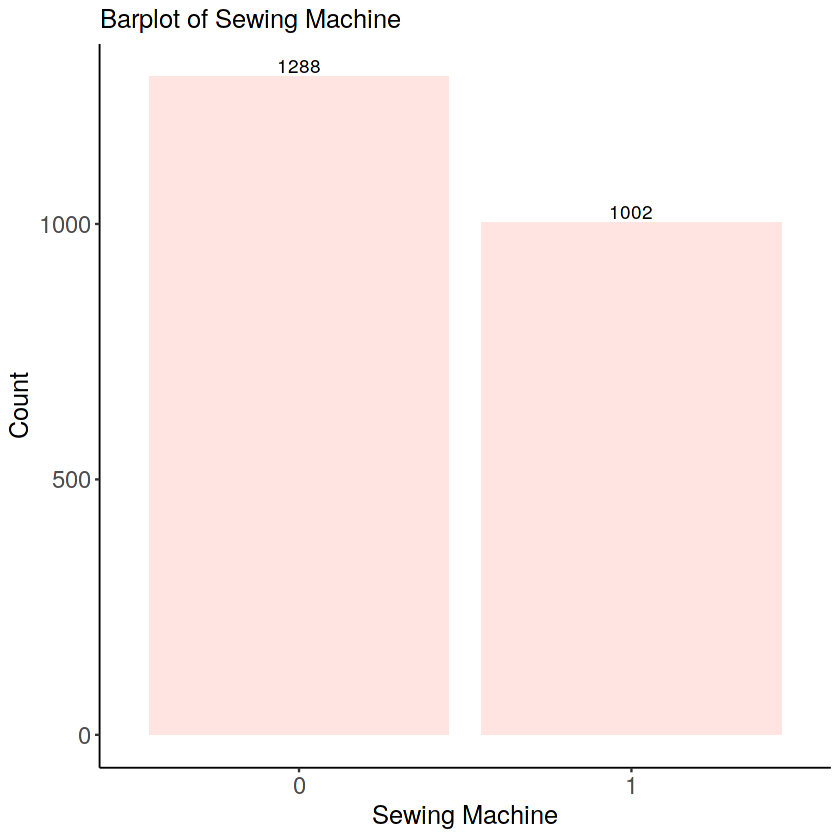

In [ ]:
plotdata <- data%>% 
  count(charkh.kh) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(charkh.kh, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) +
  labs(x = "Sewing Machine",
       y = "Count",
       title = "Barplot of Sewing Machine") + theme(axis.line = element_line(size = 0.4, 
                                                                             linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                                    panel.background = element_rect(fill = NA), 
                                                    plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                     axis.text = element_text(size = 14), 
                                                                                                                                                                                                                     plot.title = element_text(size = 15))


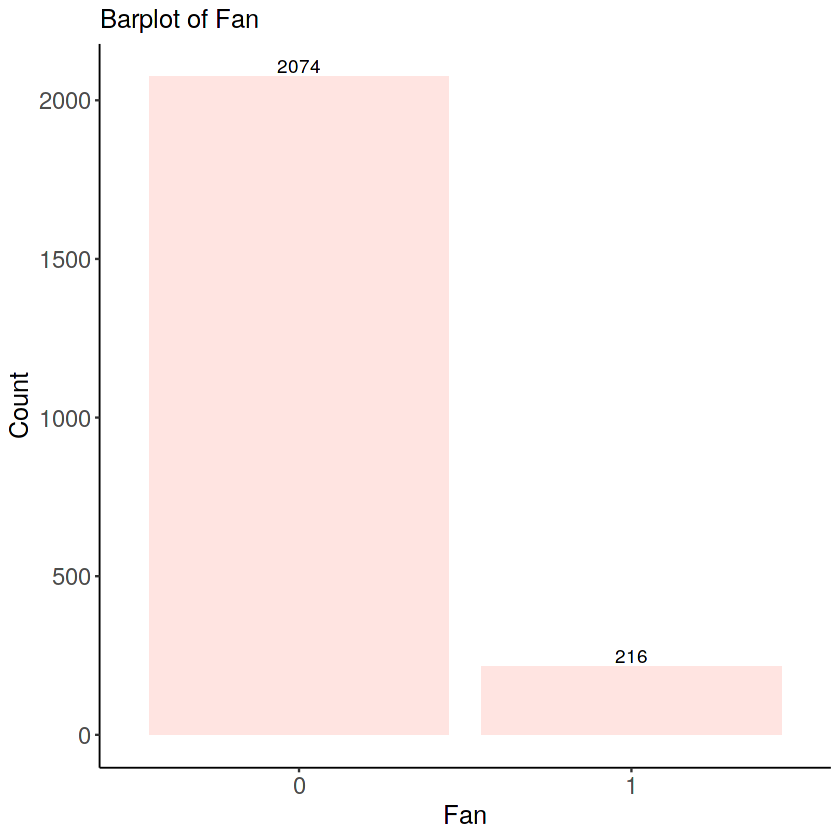

In [ ]:
plotdata <- data%>% 
  count(panke) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(panke, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) +
  labs(x = "Fan",
       y = "Count",
       title = "Barplot of Fan") + theme(axis.line = element_line(size = 0.4, 
                                                                             linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                                    panel.background = element_rect(fill = NA), 
                                                    plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                     axis.text = element_text(size = 14), 
                                                                                                                                                                                                                     plot.title = element_text(size = 15))


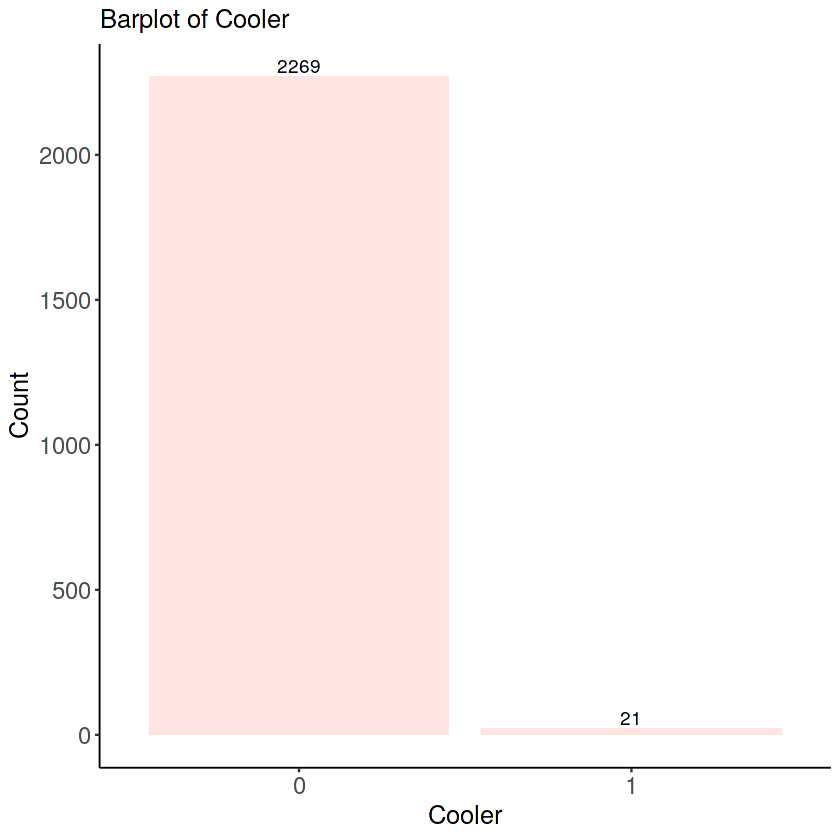

In [ ]:
plotdata <- data%>% 
  count(cooler.a) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(cooler.a, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) +
  labs(x = "Cooler",
       y = "Count",
       title = "Barplot of Cooler") + theme(axis.line = element_line(size = 0.4, 
                                                                  linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                         panel.background = element_rect(fill = NA), 
                                         plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                          axis.text = element_text(size = 14), 
                                                                                                                                                                                                          plot.title = element_text(size = 15))


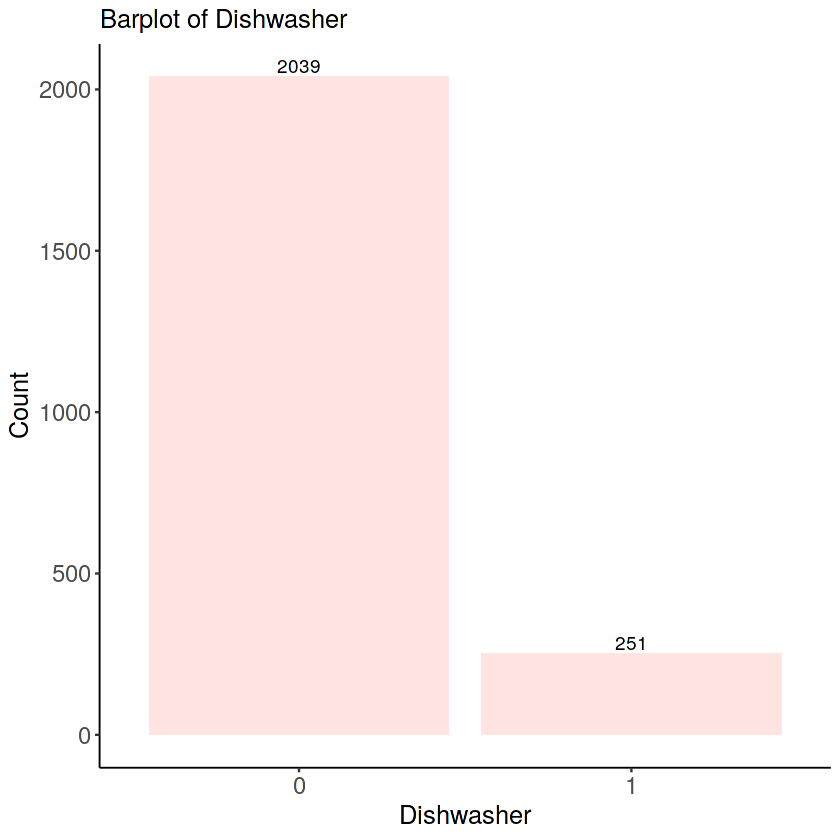

In [ ]:
plotdata <- data%>% 
  count(m.zarf) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(m.zarf, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) +
  labs(x = "Dishwasher",
       y = "Count",
       title = "Barplot of Dishwasher") + theme(axis.line = element_line(size = 0.4, 
                                                                     linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                            panel.background = element_rect(fill = NA), 
                                            plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                             axis.text = element_text(size = 14), 
                                                                                                                                                                                                             plot.title = element_text(size = 15))


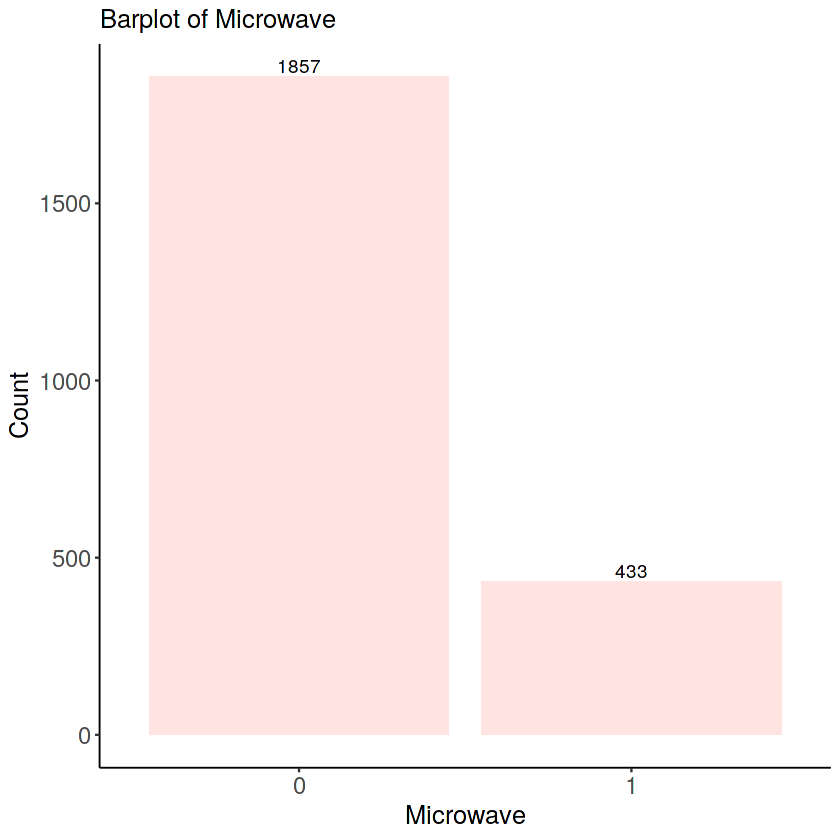

In [ ]:
plotdata <- data%>% 
  count(microfer) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(microfer, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) +
  labs(x = "Microwave",
       y = "Count",
       title = "Barplot of Microwave") + theme(axis.line = element_line(size = 0.4, 
                                                                         linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                                panel.background = element_rect(fill = NA), 
                                                plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                 axis.text = element_text(size = 14), 
                                                                                                                                                                                                                 plot.title = element_text(size = 15))


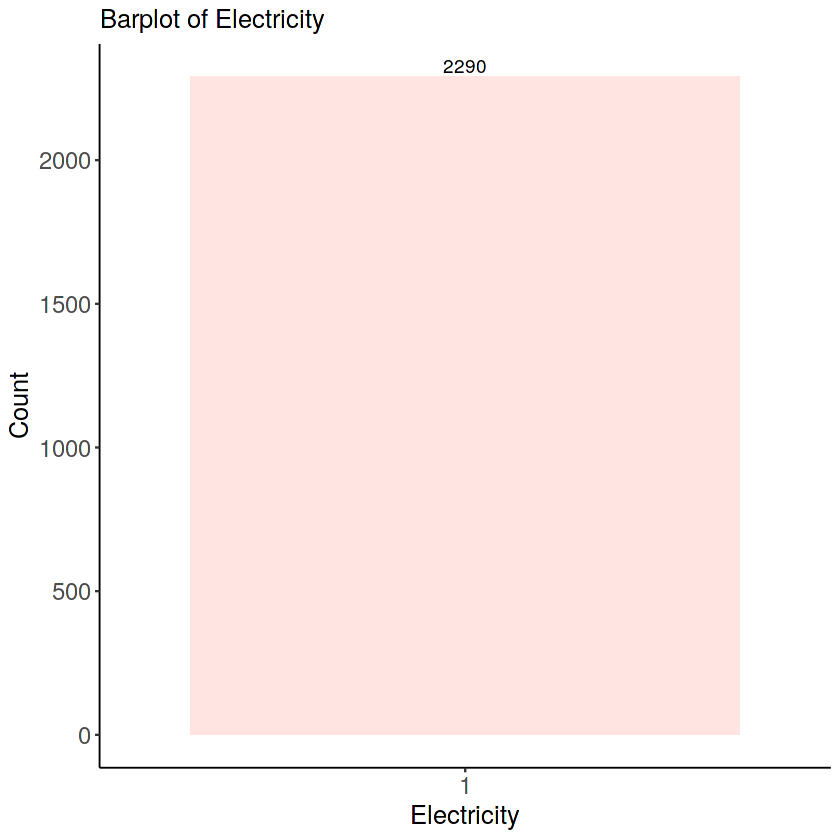

In [ ]:
plotdata <- data%>% 
  count(bargh) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(bargh, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) + 
  labs(x = "Electricity",
       y = "Count",
       title = "Barplot of Electricity") + theme(axis.line = element_line(size = 0.4, 
                                                                         linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                                panel.background = element_rect(fill = NA), 
                                                plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                 axis.text = element_text(size = 14), 
                                                                                                                                                                                                                 plot.title = element_text(size = 15))


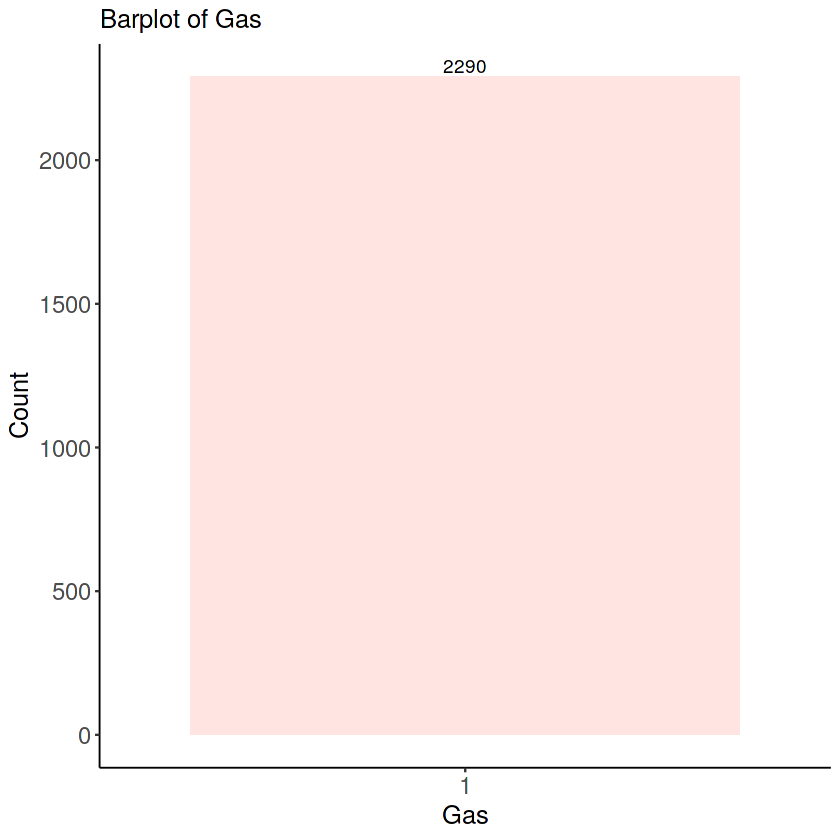

In [ ]:
plotdata <- data%>% 
  count(gaz.l) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(gaz.l, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) + 
  labs(x = "Gas",
       y = "Count",
       title = "Barplot of Gas") + theme(axis.line = element_line(size = 0.4, 
                                                                          linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                                 panel.background = element_rect(fill = NA), 
                                                 plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                  axis.text = element_text(size = 14), 
                                                                                                                                                                                                                  plot.title = element_text(size = 15))


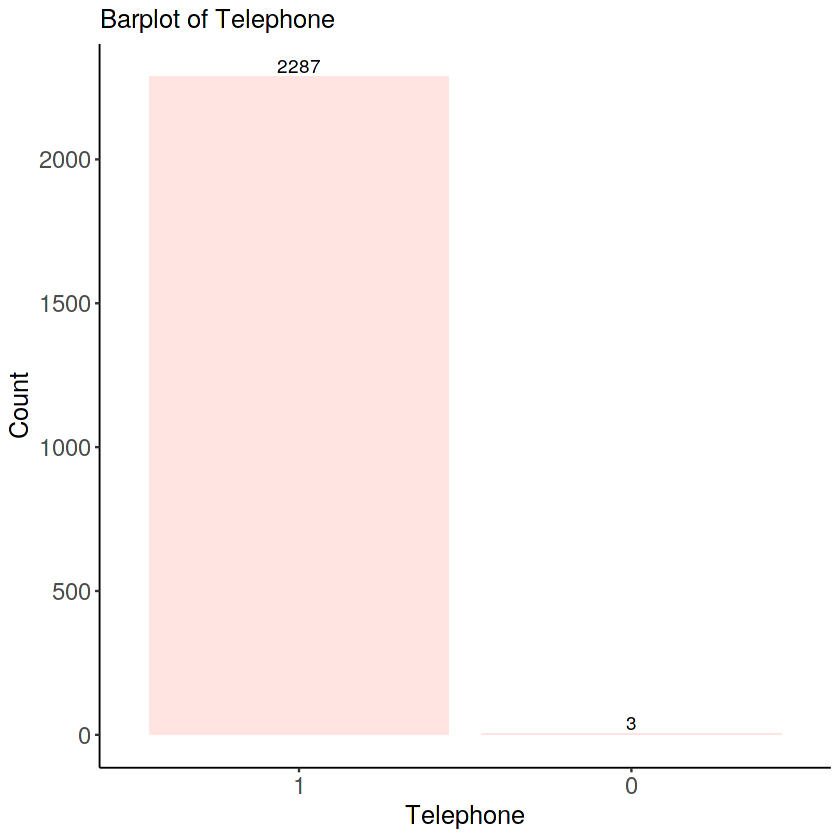

In [ ]:
plotdata <- data%>% 
  count(tel) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(tel, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) + 
  labs(x = "Telephone",
       y = "Count",
       title = "Barplot of Telephone") + theme(axis.line = element_line(size = 0.4, 
                                                                  linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                         panel.background = element_rect(fill = NA), 
                                         plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                          axis.text = element_text(size = 14), 
                                                                                                                                                                                                          plot.title = element_text(size = 15))


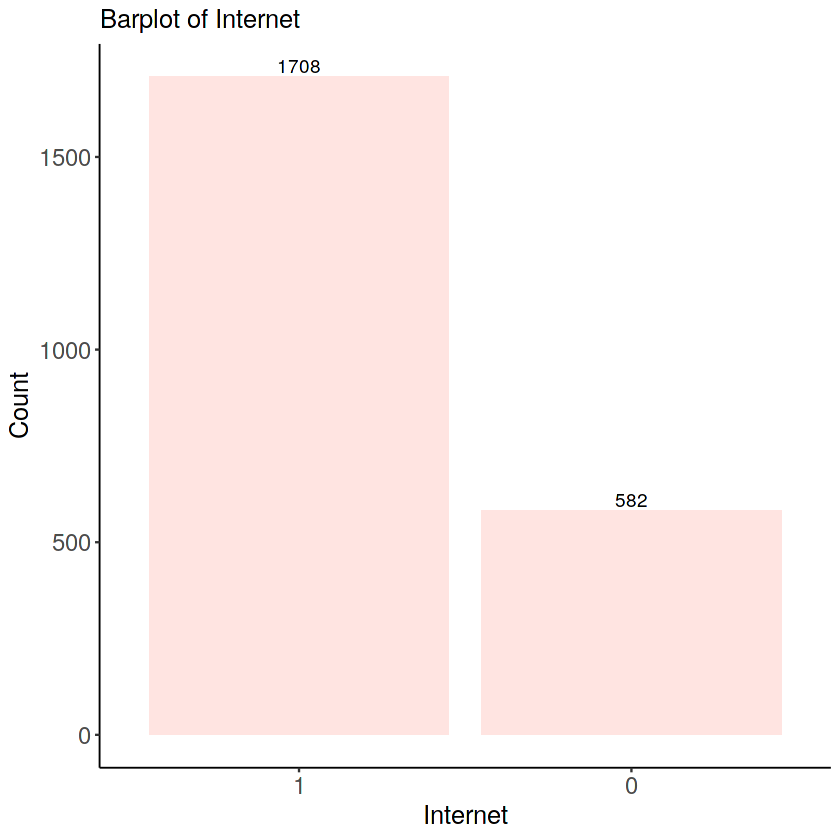

In [ ]:
plotdata <- data%>% 
  count(internet) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(internet, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) + 
  labs(x = "Internet",
       y = "Count",
       title = "Barplot of Internet") + theme(axis.line = element_line(size = 0.4, 
                                                                  linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                         panel.background = element_rect(fill = NA), 
                                         plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                          axis.text = element_text(size = 14), 
                                                                                                                                                                                                          plot.title = element_text(size = 15))


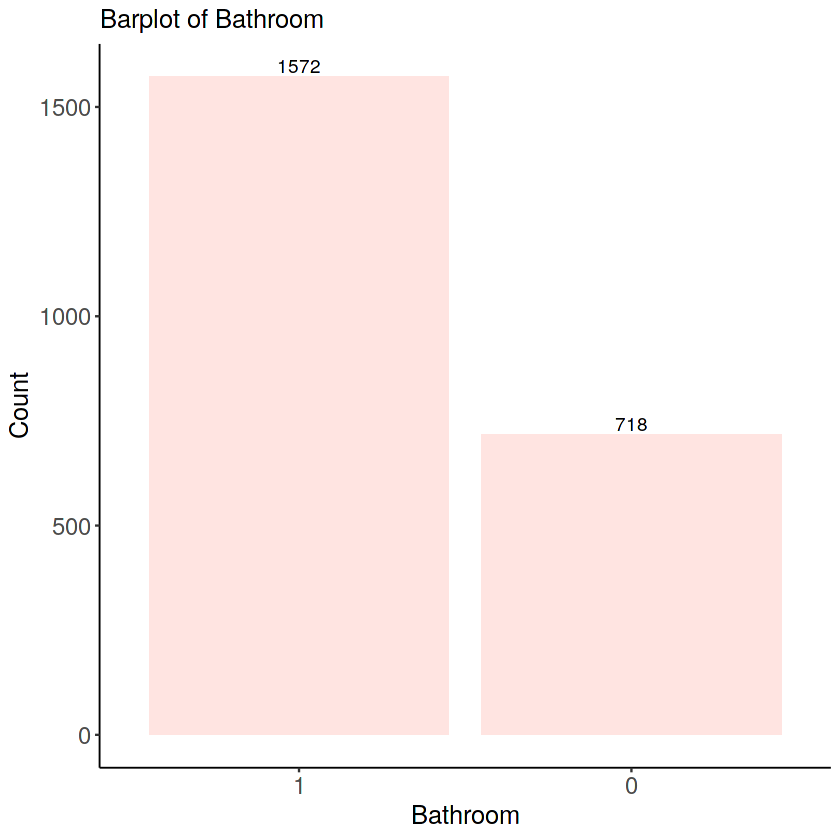

In [ ]:
plotdata <- data%>% 
  count(hamam) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(hamam, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) + 
  labs(x = "Bathroom",
       y = "Count",
       title = "Barplot of Bathroom") + theme(axis.line = element_line(size = 0.4, 
                                                                  linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                         panel.background = element_rect(fill = NA), 
                                         plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                          axis.text = element_text(size = 14), 
                                                                                                                                                                                                          plot.title = element_text(size = 15))


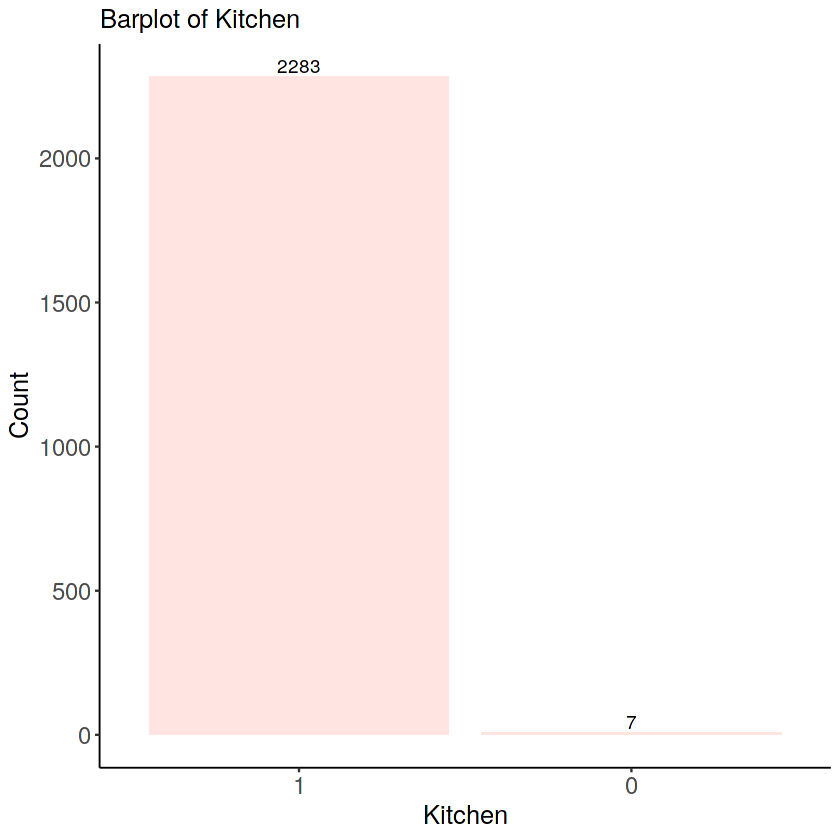

In [ ]:
plotdata <- data%>% 
  count(ashpazkhane) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(ashpazkhane, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) + 
  labs(x = "Kitchen",
       y = "Count",
       title = "Barplot of Kitchen") + theme(axis.line = element_line(size = 0.4, 
                                                                  linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                         panel.background = element_rect(fill = NA), 
                                         plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                          axis.text = element_text(size = 14), 
                                                                                                                                                                                                          plot.title = element_text(size = 15))


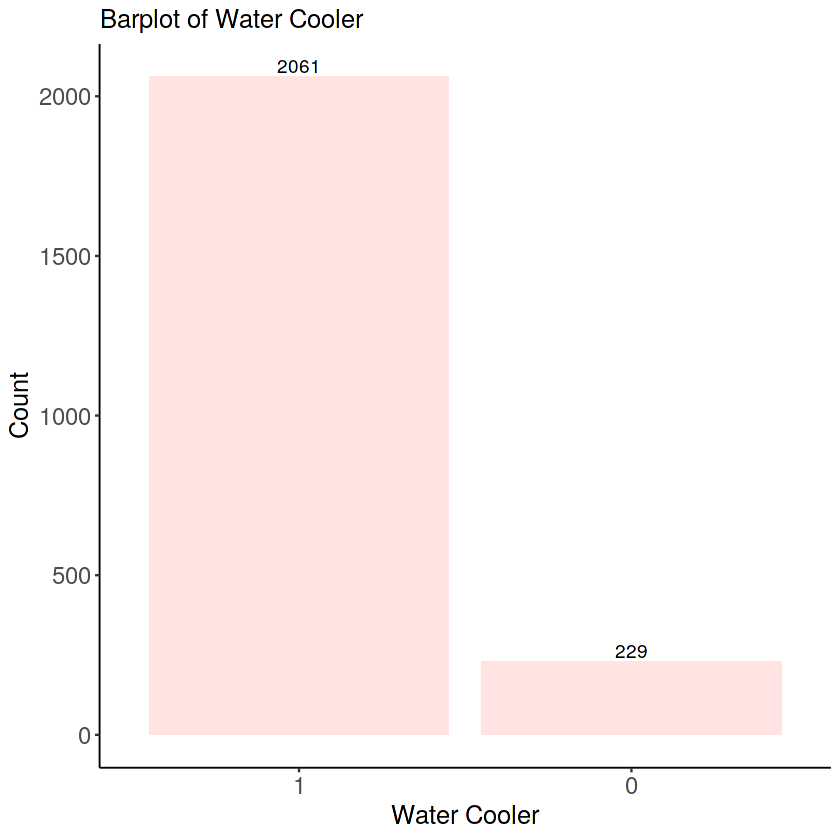

In [ ]:
plotdata <- data%>% 
  count(cooler.a.s) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(cooler.a.s, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) + 
  labs(x = "Water Cooler",
       y = "Count",
       title = "Barplot of Water Cooler") + theme(axis.line = element_line(size = 0.4, 
                                                                  linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                         panel.background = element_rect(fill = NA), 
                                         plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                          axis.text = element_text(size = 14), 
                                                                                                                                                                                                          plot.title = element_text(size = 15))


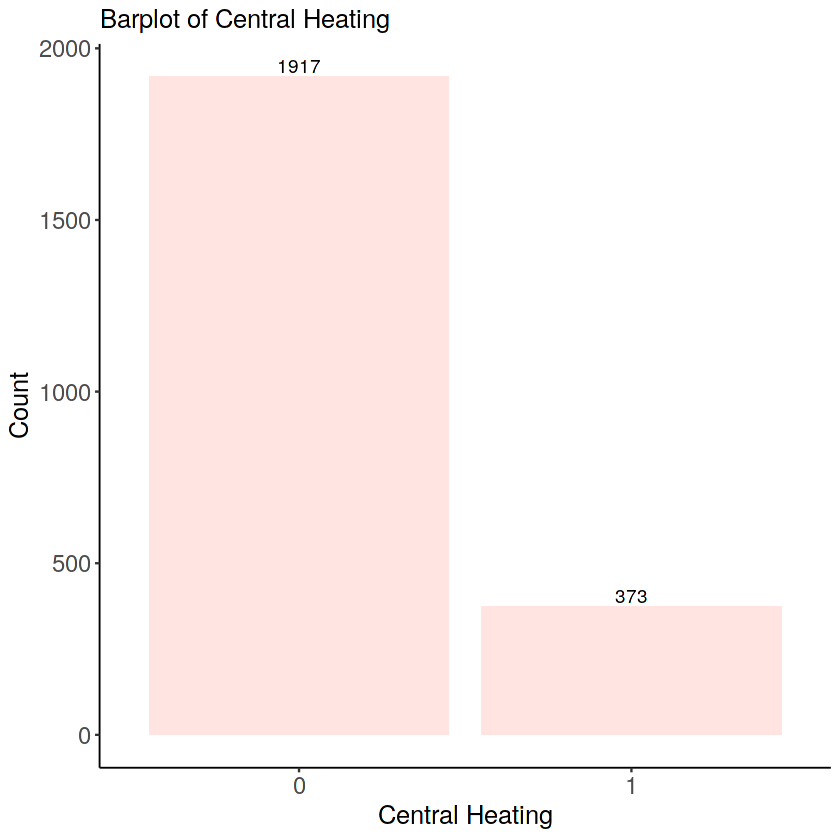

In [ ]:
plotdata <- data%>% 
  count(hararat.m) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(hararat.m, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) + 
  labs(x = "Central Heating",
       y = "Count",
       title = "Barplot of Central Heating") + theme(axis.line = element_line(size = 0.4, 
                                                                  linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                         panel.background = element_rect(fill = NA), 
                                         plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                          axis.text = element_text(size = 14), 
                                                                                                                                                                                                          plot.title = element_text(size = 15))


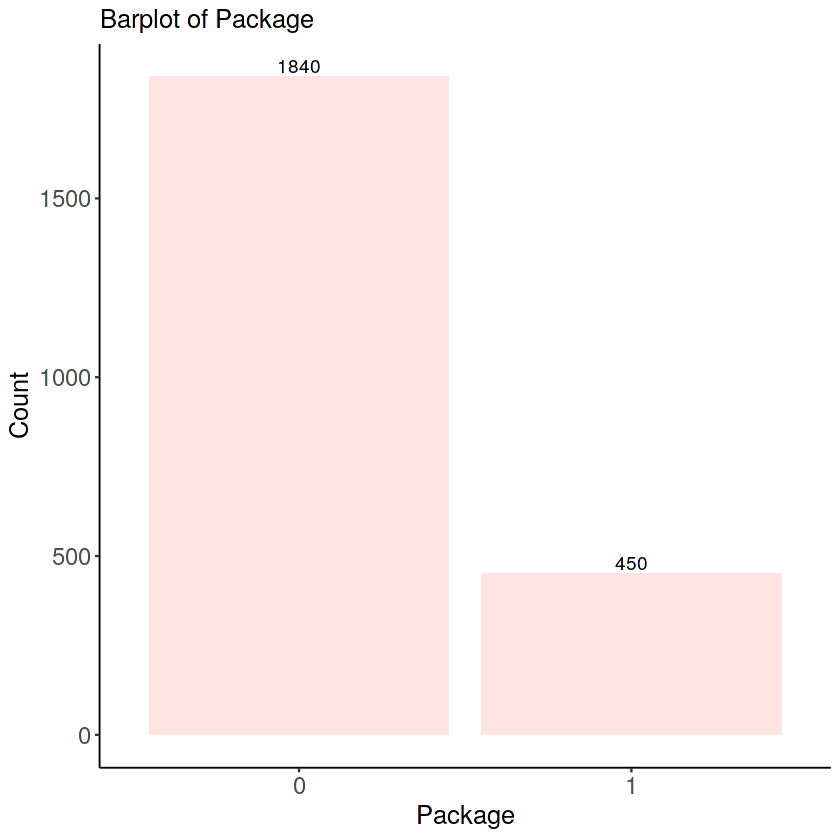

In [ ]:
plotdata <- data%>% 
  count(package) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(package, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) + 
  labs(x = "Package",
       y = "Count",
       title = "Barplot of Package") + theme(axis.line = element_line(size = 0.4, 
                                                                  linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                         panel.background = element_rect(fill = NA), 
                                         plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                          axis.text = element_text(size = 14), 
                                                                                                                                                                                                          plot.title = element_text(size = 15))


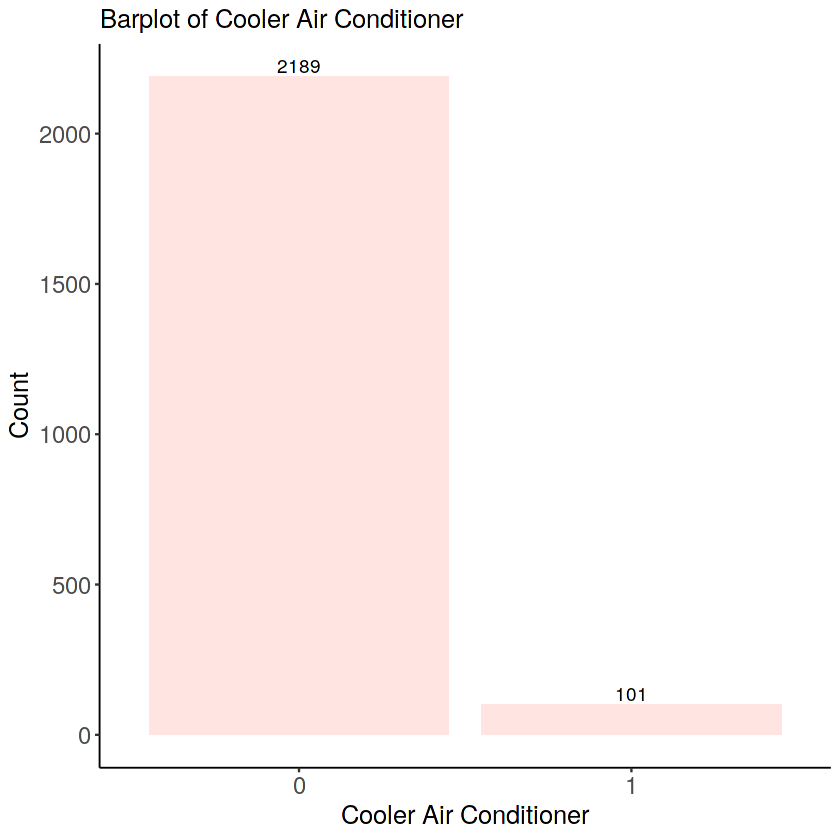

In [ ]:
plotdata <- data%>% 
  count(cooler.g.s) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(cooler.g.s, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) + 
  labs(x = "Cooler Air Conditioner",
       y = "Count",
       title = "Barplot of Cooler Air Conditioner") + theme(axis.line = element_line(size = 0.4, 
                                                                  linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                         panel.background = element_rect(fill = NA), 
                                         plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                          axis.text = element_text(size = 14), 
                                                                                                                                                                                                          plot.title = element_text(size = 15))


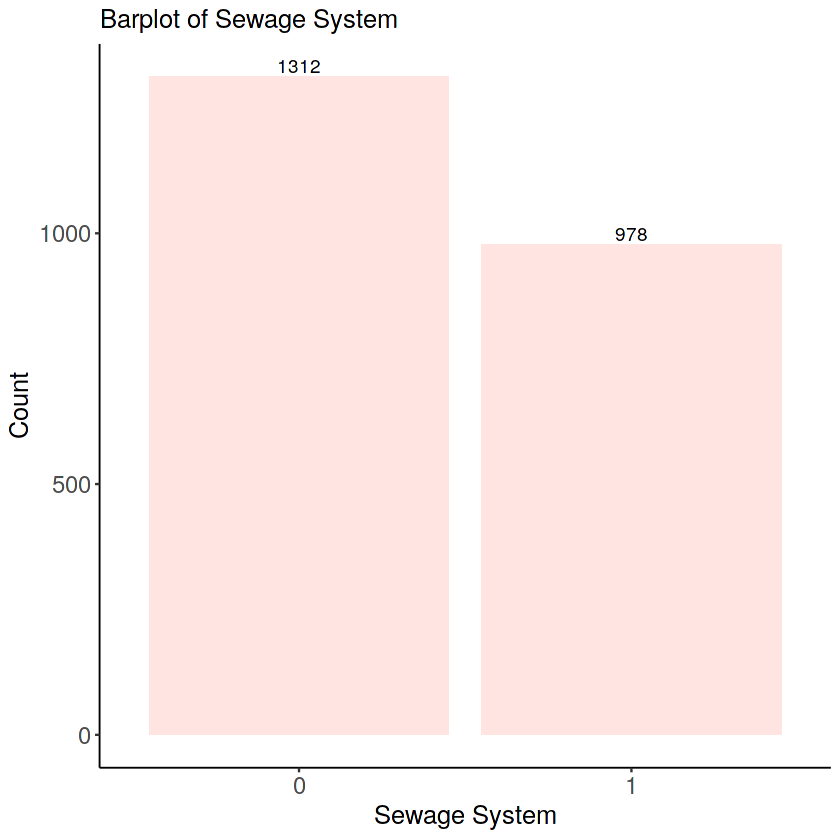

In [ ]:
plotdata <- data%>% 
  count(fazelab) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(fazelab, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) + 
  labs(x = "Sewage System",
       y = "Count",
       title = "Barplot of Sewage System") + theme(axis.line = element_line(size = 0.4, 
                                                                                     linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                                            panel.background = element_rect(fill = NA), 
                                                            plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                             axis.text = element_text(size = 14), 
                                                                                                                                                                                                                             plot.title = element_text(size = 15))


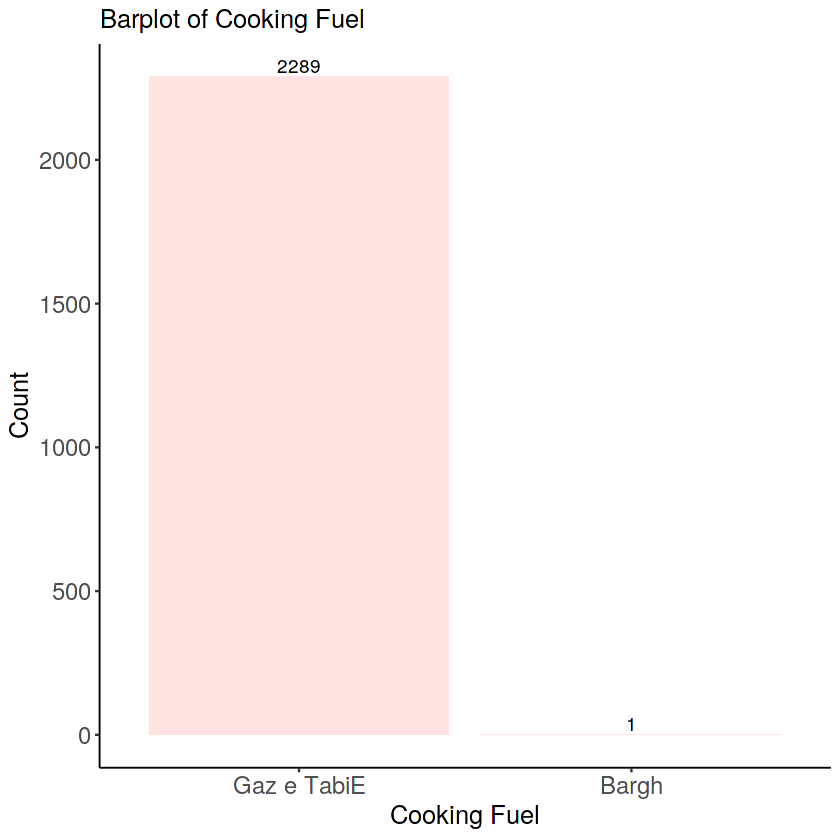

In [ ]:
plotdata <- data%>% 
  count(sookht.p) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(sookht.p, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) + 
  labs(x = "Cooking Fuel",
       y = "Count",
       title = "Barplot of Cooking Fuel") + theme(axis.line = element_line(size = 0.4, 
                                                                            linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                                   panel.background = element_rect(fill = NA), 
                                                   plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                    axis.text = element_text(size = 14), 
                                                                                                                                                                                                                    plot.title = element_text(size = 15))


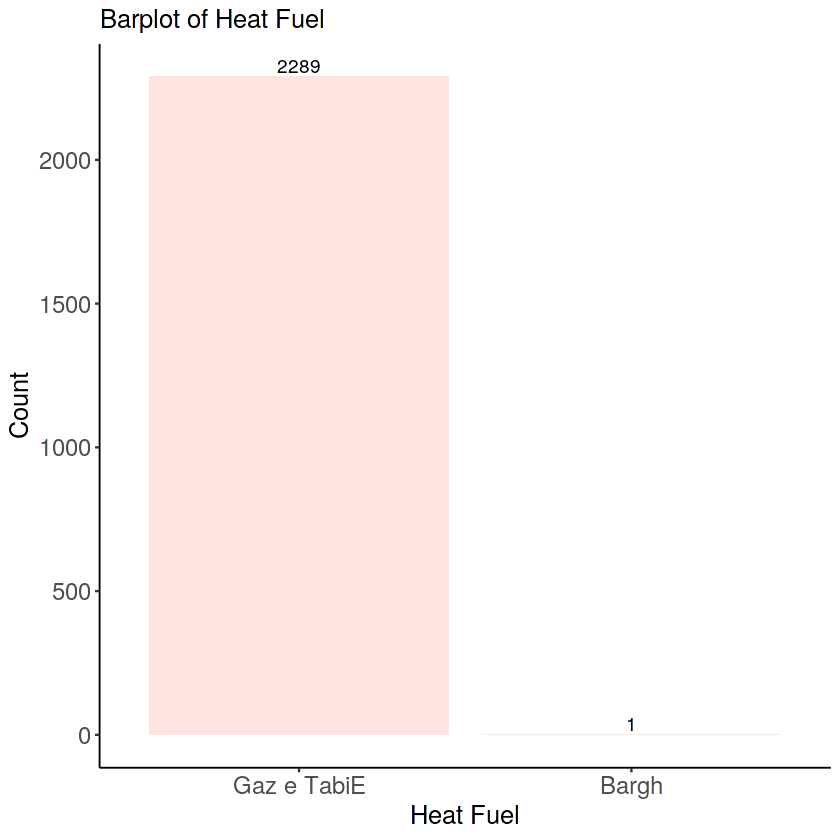

In [ ]:
plotdata <- data%>% 
  count(sookht.g) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(sookht.g, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) + 
  labs(x = "Heat Fuel",
       y = "Count",
       title = "Barplot of Heat Fuel") + theme(axis.line = element_line(size = 0.4, 
                                                                           linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                                  panel.background = element_rect(fill = NA), 
                                                  plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                   axis.text = element_text(size = 14), 
                                                                                                                                                                                                                   plot.title = element_text(size = 15))


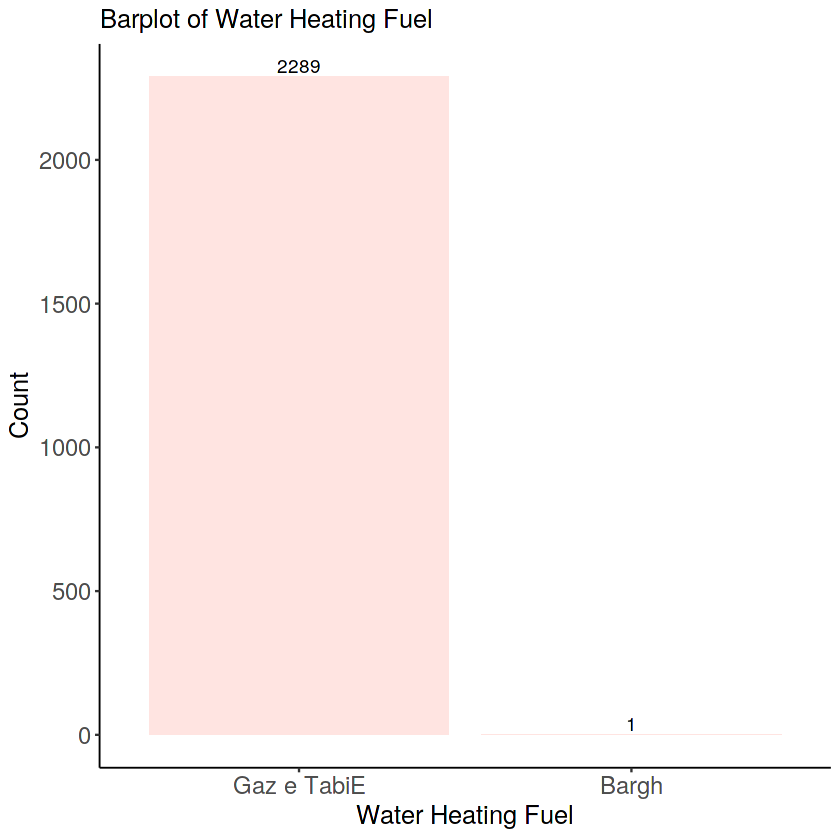

In [ ]:
plotdata <- data%>% 
  count(sookht.ab) %>% 
  mutate(pct = n ,
         pctlabel = paste0(pct))

ggplot(plotdata,
       aes(x = reorder(sookht.ab, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "mistyrose") + geom_text(aes(label = pctlabel),
                                                              vjust = -0.25) + scale_y_continuous(labels = waiver()) + 
  labs(x = "Water Heating Fuel",
       y = "Count",
       title = "Barplot of Water Heating Fuel") + theme(axis.line = element_line(size = 0.4, 
                                                                        linetype = "solid"), axis.ticks = element_line(linetype = "blank"), 
                                               panel.background = element_rect(fill = NA), 
                                               plot.background = element_rect(colour = NA))  + theme(panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                axis.text = element_text(size = 14), 
                                                                                                                                                                                                                plot.title = element_text(size = 15))


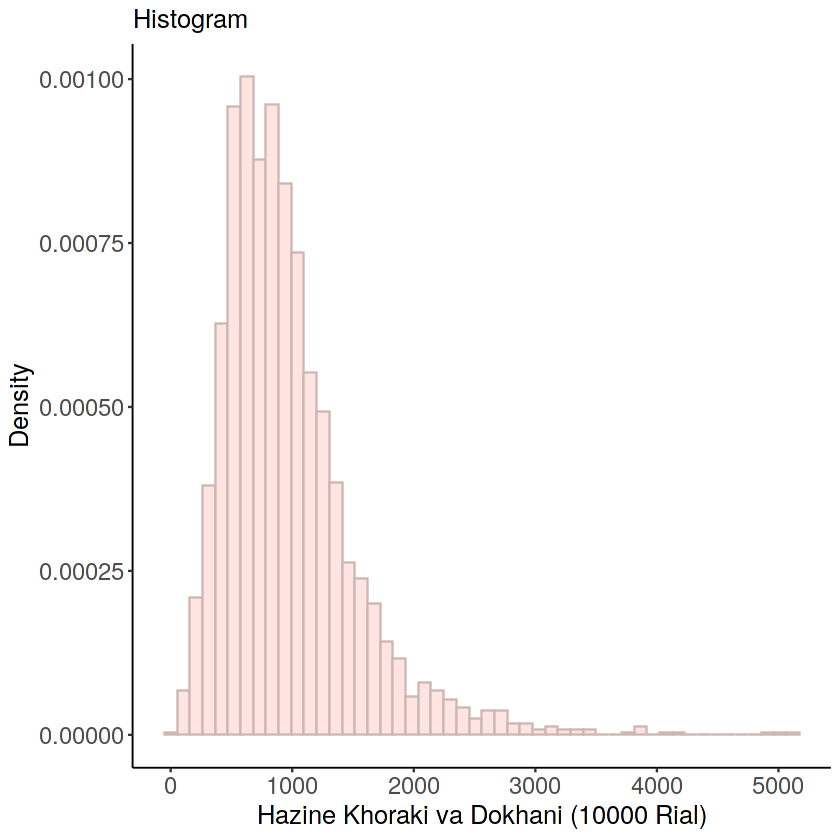

In [ ]:
ggplot(data, aes(x = H_Khorakivadokhani)) + 
  geom_histogram(aes(y=..density..),fill = "mistyrose",color='mistyrose3',bins=50) + ylab("Density") +
  labs(title = "Histogram" ,x = "Hazine Khoraki va Dokhani (10000 Rial)") + theme(axis.line = element_line(size = 0.4, 
                                                                                                  linetype = "solid"), panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                                  axis.text = element_text(size = 14), 
                                                                                                                                                                                                                                  plot.title = element_text(size = 15))



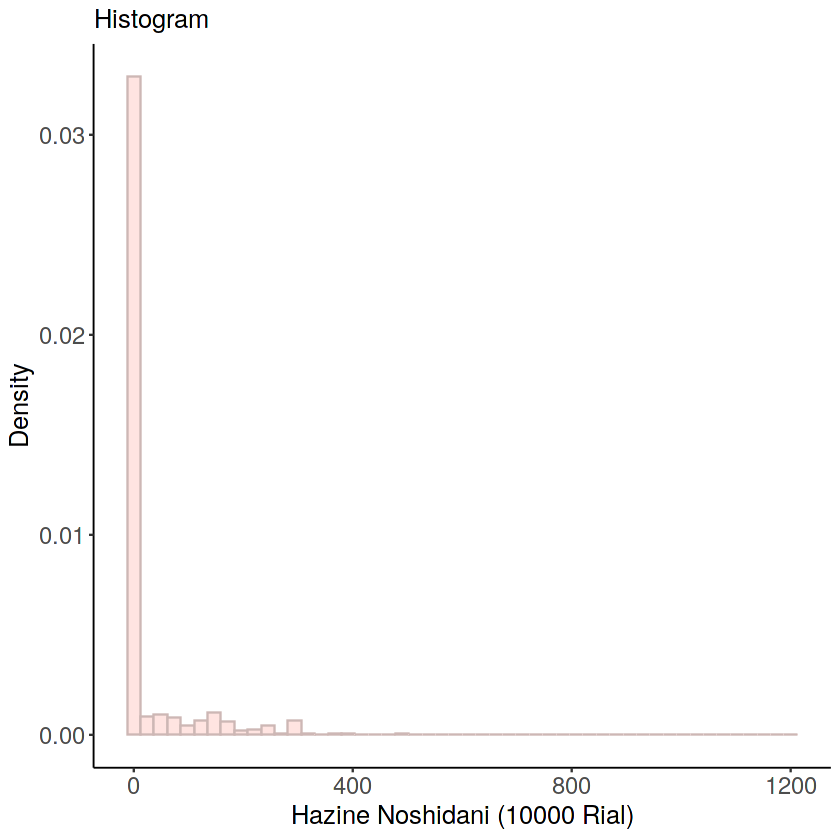

In [ ]:
ggplot(data, aes(x = H_Noshidani)) + 
  geom_histogram(aes(y=..density..),fill = "mistyrose",color='mistyrose3',bins=50) + ylab("Density") +
  labs(title = "Histogram" ,x = "Hazine Noshidani (10000 Rial)") + theme(axis.line = element_line(size = 0.4, 
                                                                                                  linetype = "solid"), panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                                  axis.text = element_text(size = 14), 
                                                                                                                                                                                                                                  plot.title = element_text(size = 15))



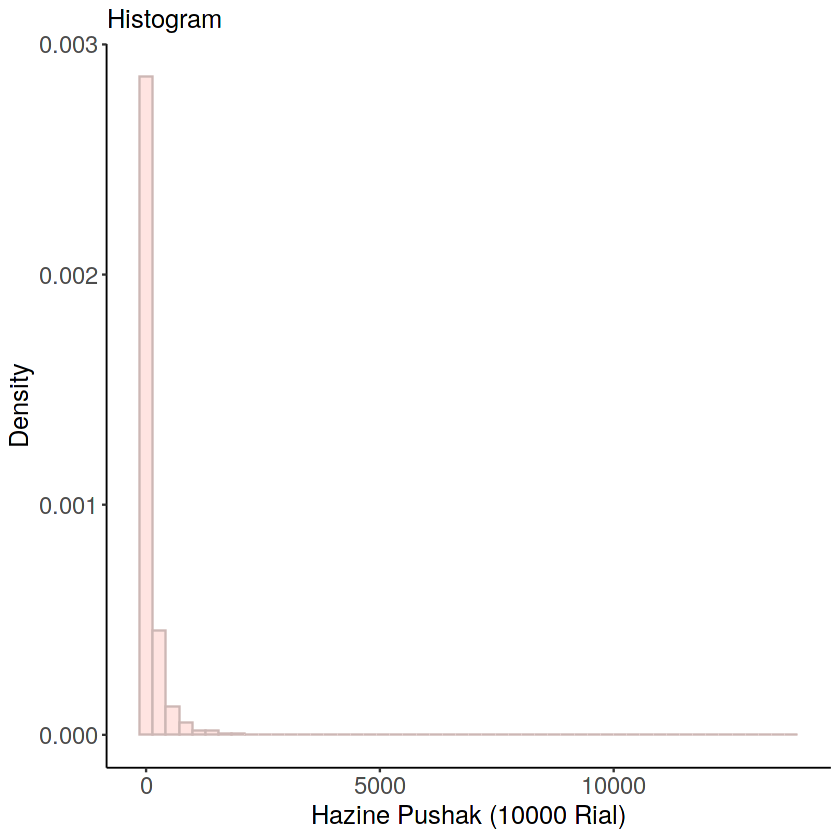

In [ ]:
ggplot(data, aes(x = H_Pushak)) + 
  geom_histogram(aes(y=..density..),fill = "mistyrose",color='mistyrose3',bins=50) + ylab("Density") +
  labs(title = "Histogram" ,x = "Hazine Pushak (10000 Rial)") + theme(axis.line = element_line(size = 0.4, 
                                                                                                  linetype = "solid"), panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                                  axis.text = element_text(size = 14), 
                                                                                                                                                                                                                                  plot.title = element_text(size = 15))



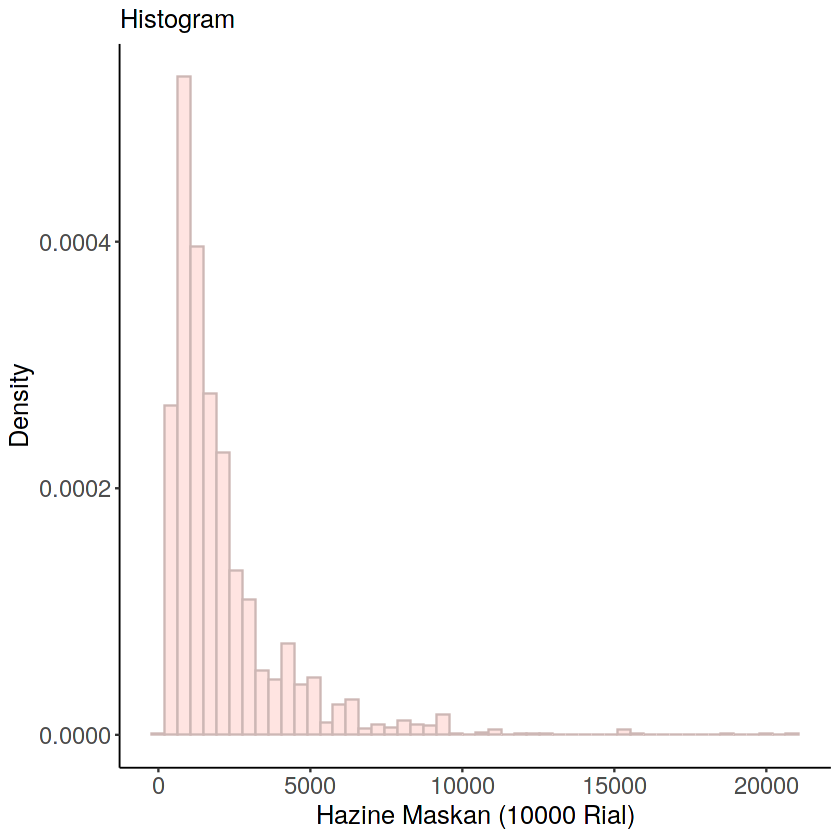

In [ ]:
ggplot(data, aes(x = H_Maskan)) + 
  geom_histogram(aes(y=..density..),fill = "mistyrose",color='mistyrose3',bins=50) + ylab("Density") +
  labs(title = "Histogram" ,x = "Hazine Maskan (10000 Rial)") + theme(axis.line = element_line(size = 0.4, 
                                                                                                  linetype = "solid"), panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                                  axis.text = element_text(size = 14), 
                                                                                                                                                                                                                                  plot.title = element_text(size = 15))



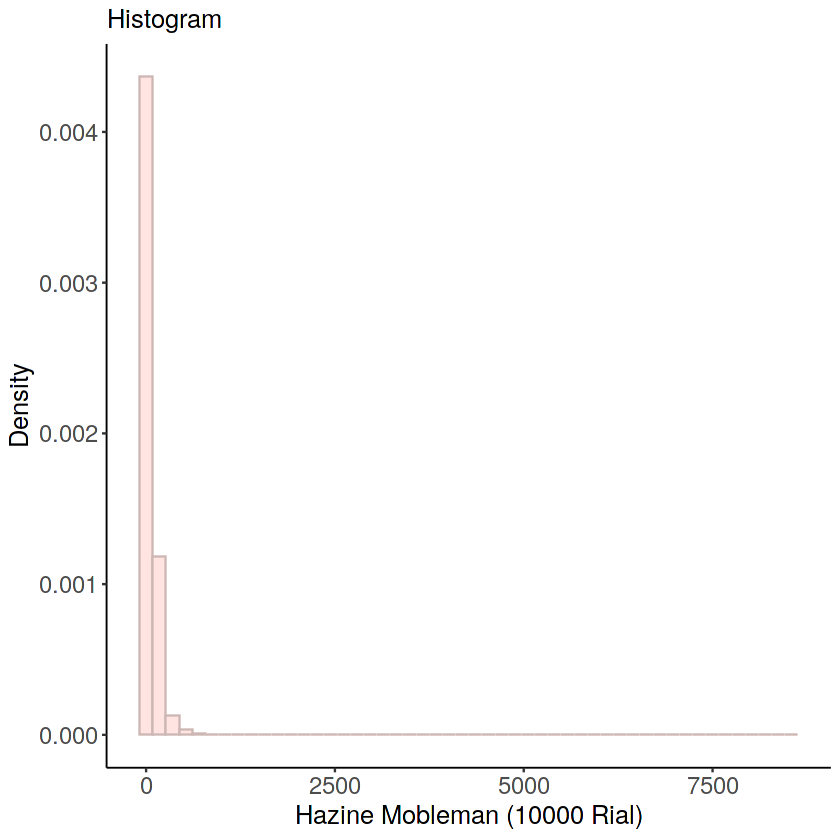

In [ ]:
ggplot(data, aes(x = H_mobleman)) + 
  geom_histogram(aes(y=..density..),fill = "mistyrose",color='mistyrose3',bins=50) + ylab("Density") +
  labs(title = "Histogram" ,x = "Hazine Mobleman (10000 Rial)") + theme(axis.line = element_line(size = 0.4, 
                                                                                                  linetype = "solid"), panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                                  axis.text = element_text(size = 14), 
                                                                                                                                                                                                                                  plot.title = element_text(size = 15))



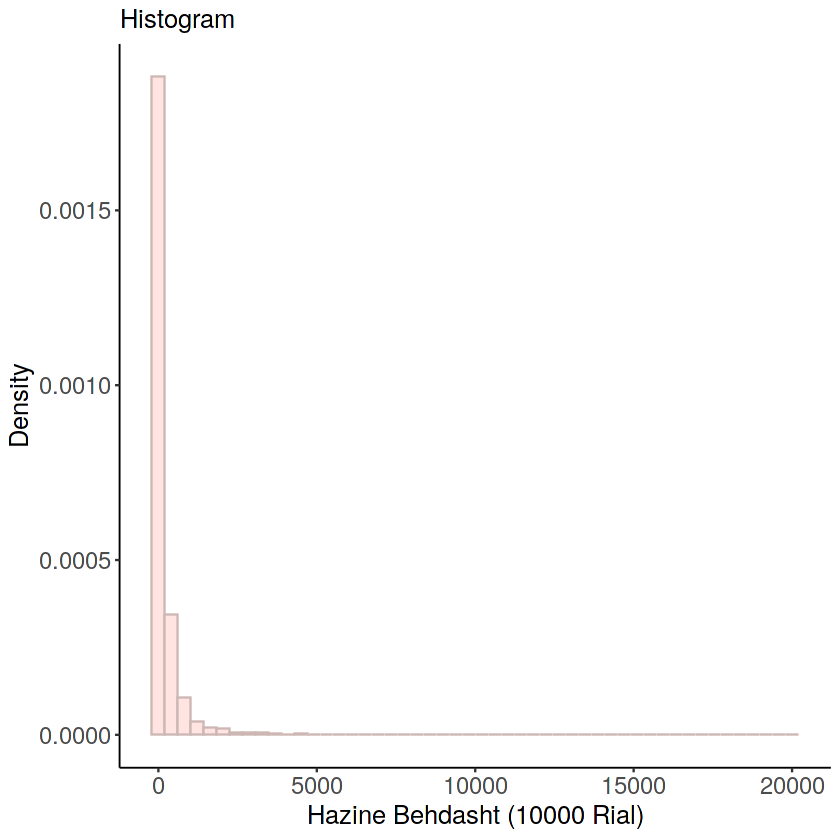

In [ ]:
ggplot(data, aes(x = H_behdasht)) + 
  geom_histogram(aes(y=..density..),fill = "mistyrose",color='mistyrose3',bins=50) + ylab("Density") +
  labs(title = "Histogram" ,x = "Hazine Behdasht (10000 Rial)") + theme(axis.line = element_line(size = 0.4, 
                                                                                                  linetype = "solid"), panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                                  axis.text = element_text(size = 14), 
                                                                                                                                                                                                                                  plot.title = element_text(size = 15))



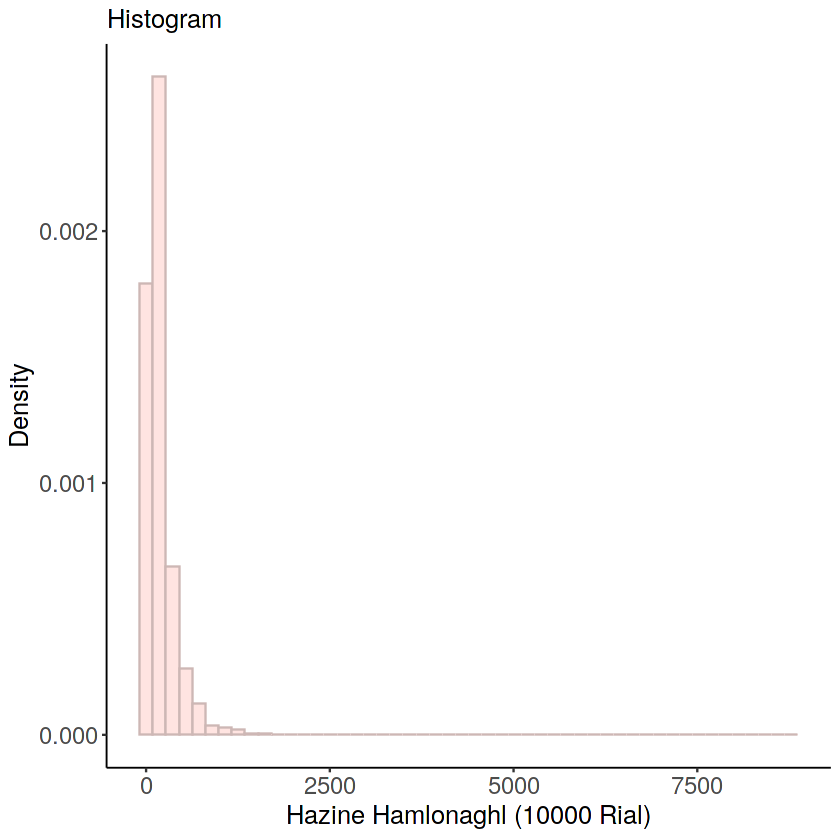

In [ ]:
ggplot(data, aes(x = H_Hamlonaghl)) + 
  geom_histogram(aes(y=..density..),fill = "mistyrose",color='mistyrose3',bins=50) + ylab("Density") +
  labs(title = "Histogram" ,x = "Hazine Hamlonaghl (10000 Rial)") + theme(axis.line = element_line(size = 0.4, 
                                                                                                  linetype = "solid"), panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                                  axis.text = element_text(size = 14), 
                                                                                                                                                                                                                                  plot.title = element_text(size = 15))



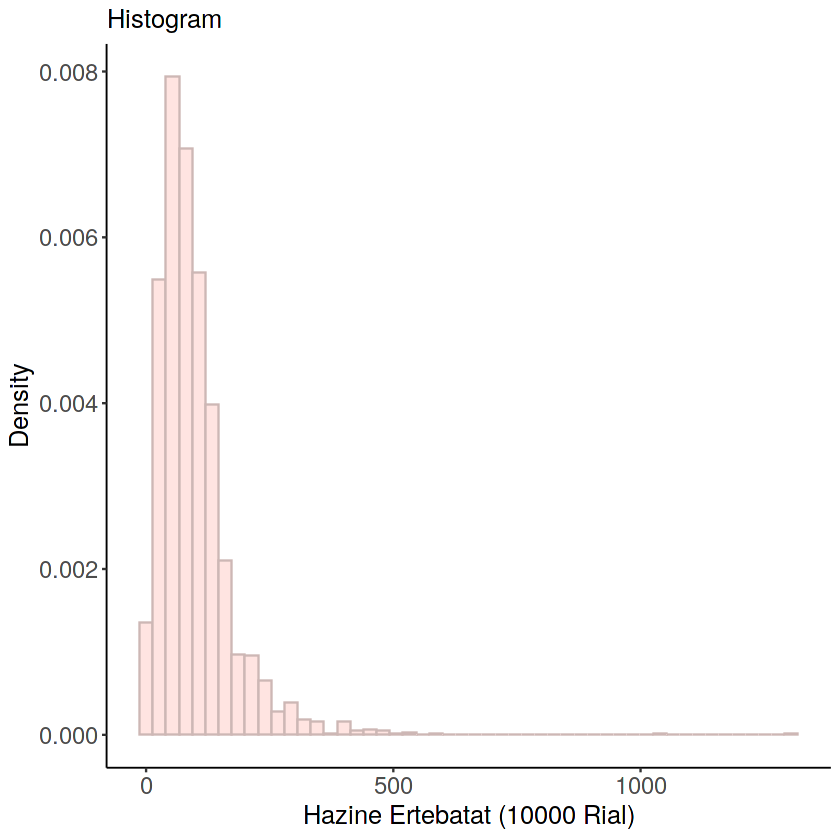

In [ ]:
ggplot(data, aes(x = H_Ertebatat)) + 
  geom_histogram(aes(y=..density..),fill = "mistyrose",color='mistyrose3',bins=50) + ylab("Density") +
  labs(title = "Histogram" ,x = "Hazine Ertebatat (10000 Rial)") + theme(axis.line = element_line(size = 0.4, 
                                                                                                  linetype = "solid"), panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                                  axis.text = element_text(size = 14), 
                                                                                                                                                                                                                                  plot.title = element_text(size = 15))



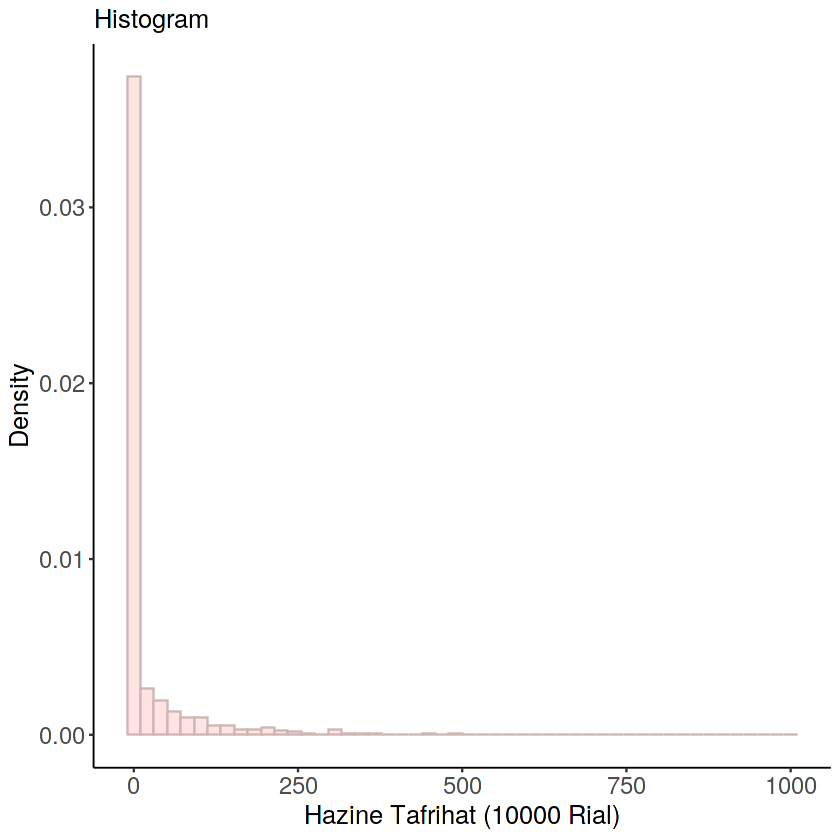

In [ ]:
ggplot(data, aes(x = H_Tafrihat)) + 
  geom_histogram(aes(y=..density..),fill = "mistyrose",color='mistyrose3',bins=50) + ylab("Density") +
  labs(title = "Histogram" ,x = "Hazine Tafrihat (10000 Rial)") + theme(axis.line = element_line(size = 0.4, 
                                                                                                  linetype = "solid"), panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                                  axis.text = element_text(size = 14), 
                                                                                                                                                                                                                                  plot.title = element_text(size = 15))



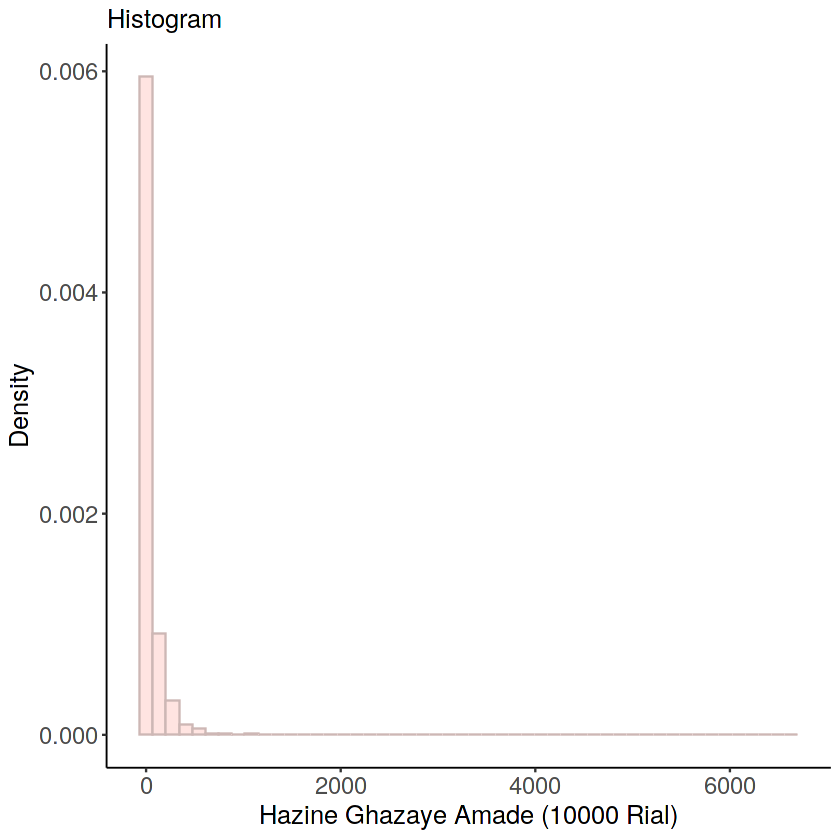

In [ ]:
ggplot(data, aes(x = H_Ghazayeamade)) + 
  geom_histogram(aes(y=..density..),fill = "mistyrose",color='mistyrose3',bins=50) + ylab("Density") +
  labs(title = "Histogram" ,x = "Hazine Ghazaye Amade (10000 Rial)") + theme(axis.line = element_line(size = 0.4, 
                                                                                                  linetype = "solid"), panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                                  axis.text = element_text(size = 14), 
                                                                                                                                                                                                                                  plot.title = element_text(size = 15))




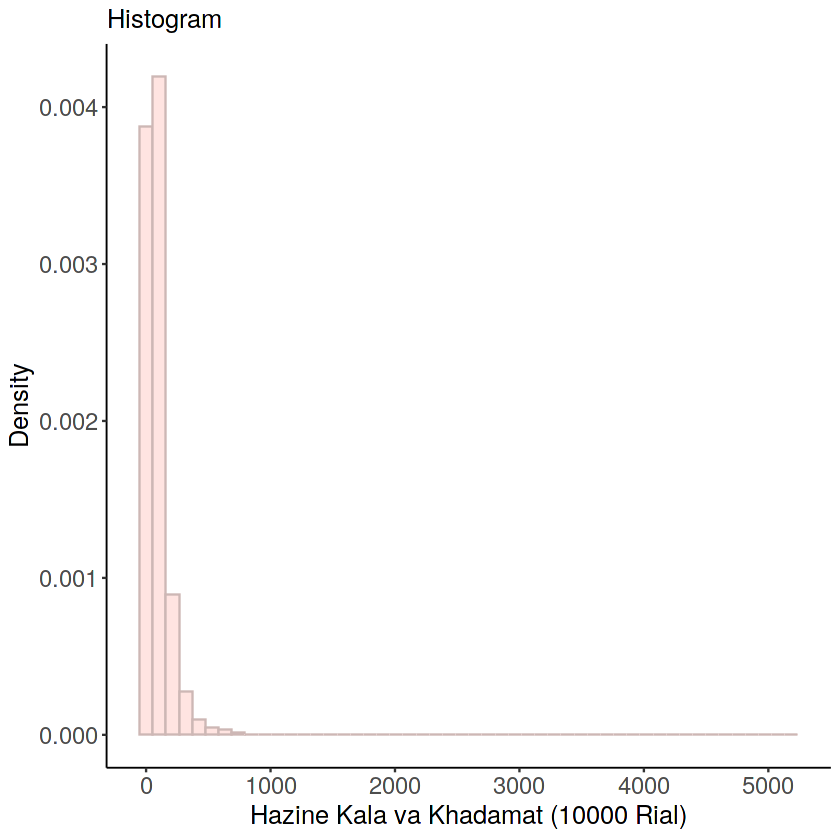

In [ ]:
ggplot(data, aes(x = H_kalavakhadamat)) + 
  geom_histogram(aes(y=..density..),fill = "mistyrose",color='mistyrose3',bins=50) + ylab("Density") +
  labs(title = "Histogram" ,x = "Hazine Kala va Khadamat (10000 Rial)") + theme(axis.line = element_line(size = 0.4, 
                                                                                                      linetype = "solid"), panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                                      axis.text = element_text(size = 14), 
                                                                                                                                                                                                                                      plot.title = element_text(size = 15))




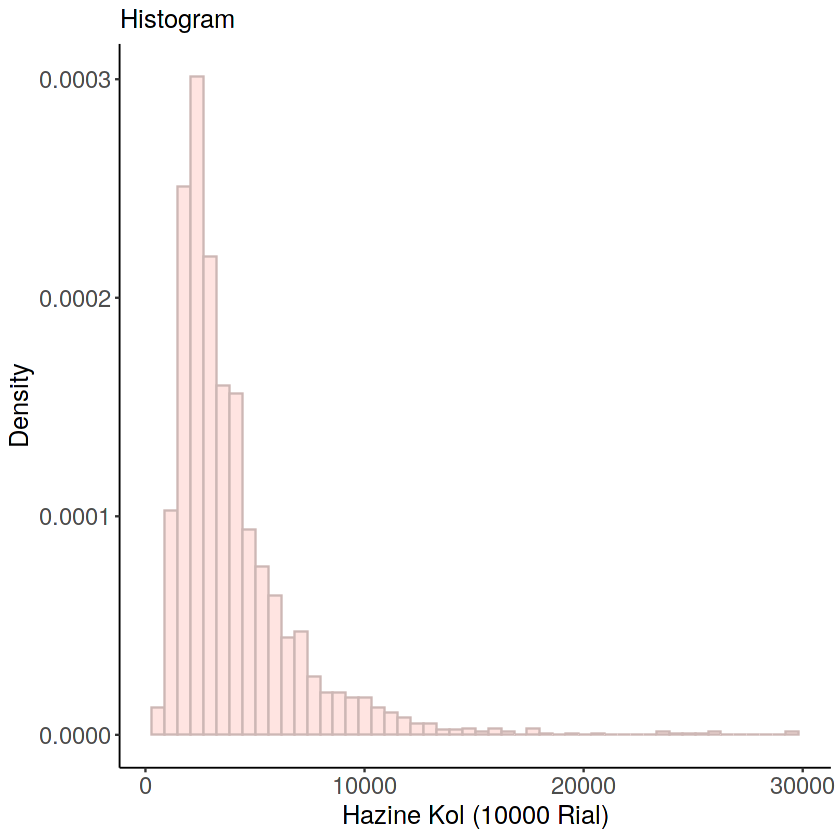

In [ ]:
ggplot(data, aes(x = H_Kol)) + 
  geom_histogram(aes(y=..density..),fill = "mistyrose",color='mistyrose3',bins=50) + ylab("Density") +
  labs(title = "Histogram" ,x = "Hazine Kol (10000 Rial)") + theme(axis.line = element_line(size = 0.4, 
                                                                                                         linetype = "solid"), panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                                         axis.text = element_text(size = 14), 
                                                                                                                                                                                                                                         plot.title = element_text(size = 15))



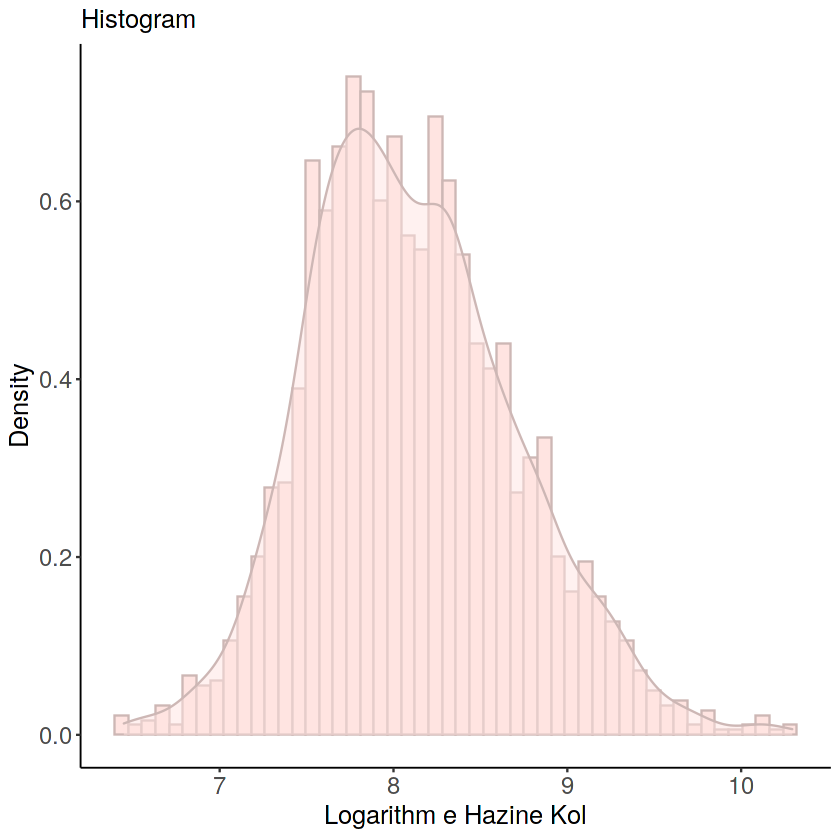

In [ ]:
ggplot(data, aes(x = H_Kol_log)) + 
  geom_histogram(aes(y=..density..),fill = "mistyrose",color='mistyrose3',bins=50) + ylab("Density") +
  labs(title = "Histogram" ,x = "Logarithm e Hazine Kol") +
  geom_density(alpha=.5, fill="mistyrose" , colour='mistyrose3') + theme(axis.line = element_line(size = 0.4, 
                                                                                            linetype = "solid"), panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                            axis.text = element_text(size = 14), 
                                                                                                                                                                                                                            plot.title = element_text(size = 15))


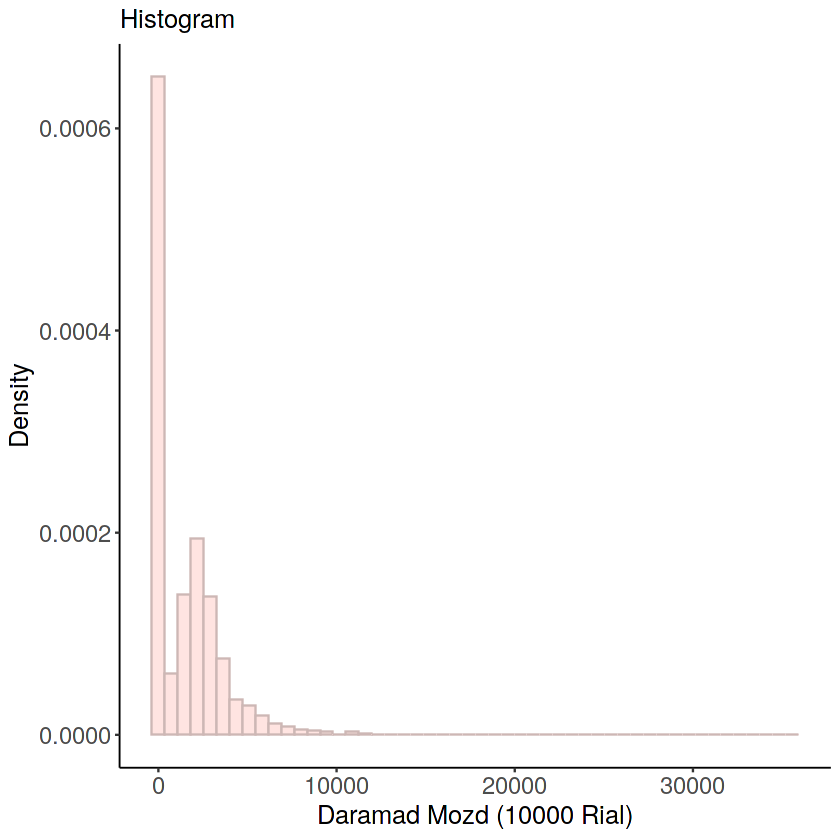

In [ ]:
ggplot(data, aes(x = D_Mozd)) + 
  geom_histogram(aes(y=..density..),fill = "mistyrose",color='mistyrose3',bins=50) + ylab("Density") +
  labs(title = "Histogram" ,x = "Daramad Mozd (10000 Rial)") + theme(axis.line = element_line(size = 0.4, 
                                                                                            linetype = "solid"), panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                            axis.text = element_text(size = 14), 
                                                                                                                                                                                                                            plot.title = element_text(size = 15))


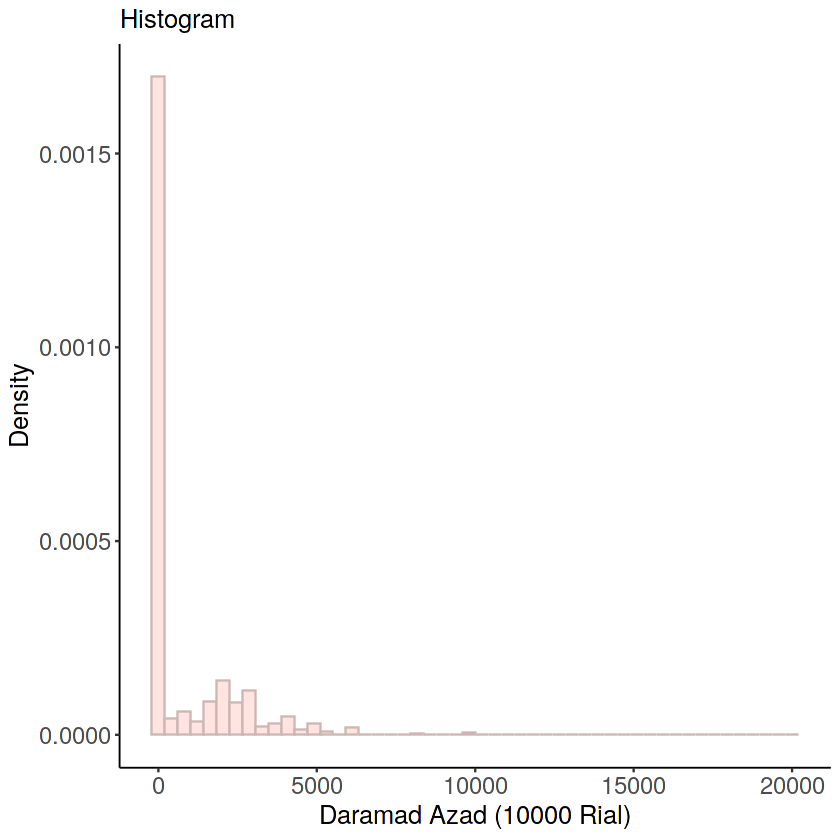

In [ ]:
ggplot(data, aes(x = D_Azad)) + 
  geom_histogram(aes(y=..density..),fill = "mistyrose",color='mistyrose3',bins=50) + ylab("Density") +
  labs(title = "Histogram" ,x = "Daramad Azad (10000 Rial)") + theme(axis.line = element_line(size = 0.4, 
                                                                                              linetype = "solid"), panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                              axis.text = element_text(size = 14), 
                                                                                                                                                                                                                              plot.title = element_text(size = 15))


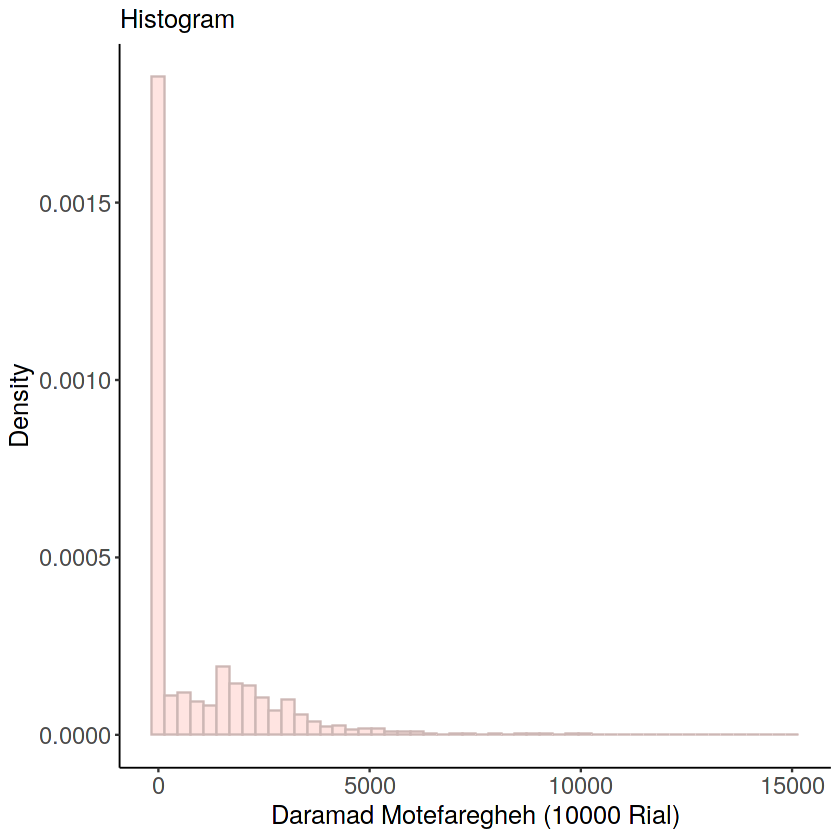

In [ ]:
ggplot(data, aes(x = D_Motefaraghe)) + 
  geom_histogram(aes(y=..density..),fill = "mistyrose",color='mistyrose3',bins=50) + ylab("Density") +
  labs(title = "Histogram" ,x = "Daramad Motefaregheh (10000 Rial)") + theme(axis.line = element_line(size = 0.4, 
                                                                                              linetype = "solid"), panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                              axis.text = element_text(size = 14), 
                                                                                                                                                                                                                              plot.title = element_text(size = 15))


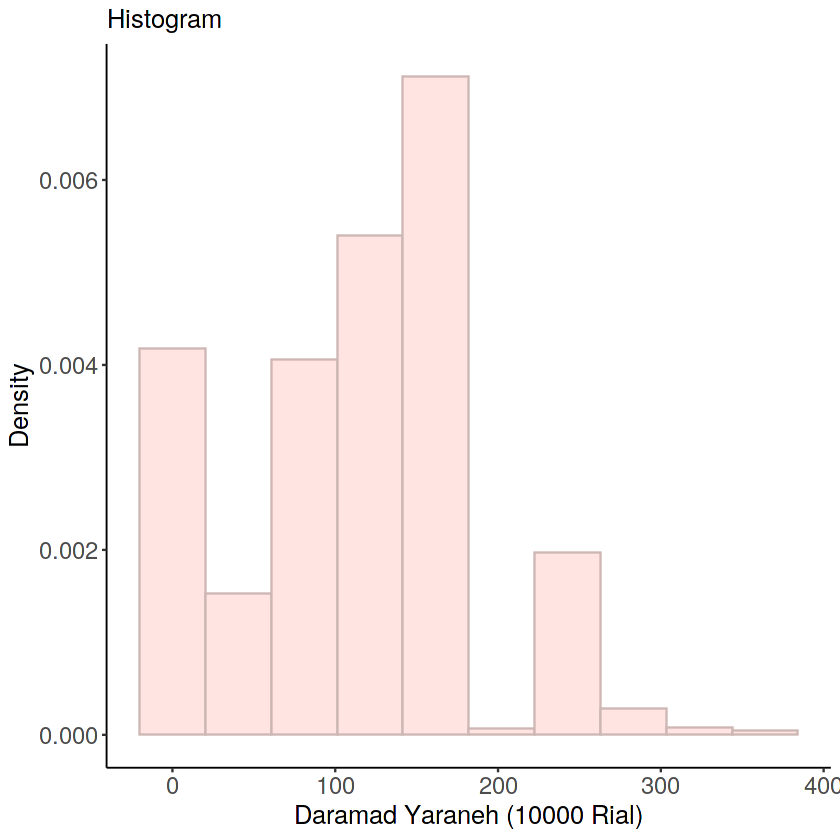

In [ ]:
ggplot(data, aes(x = D_Yarane)) + 
  geom_histogram(aes(y=..density..),fill = "mistyrose",color='mistyrose3',bins=10) + ylab("Density") +
  labs(title = "Histogram" ,x = "Daramad Yaraneh (10000 Rial)") + theme(axis.line = element_line(size = 0.4, 
                                                                                                      linetype = "solid"), panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                                      axis.text = element_text(size = 14), 
                                                                                                                                                                                                                                      plot.title = element_text(size = 15))


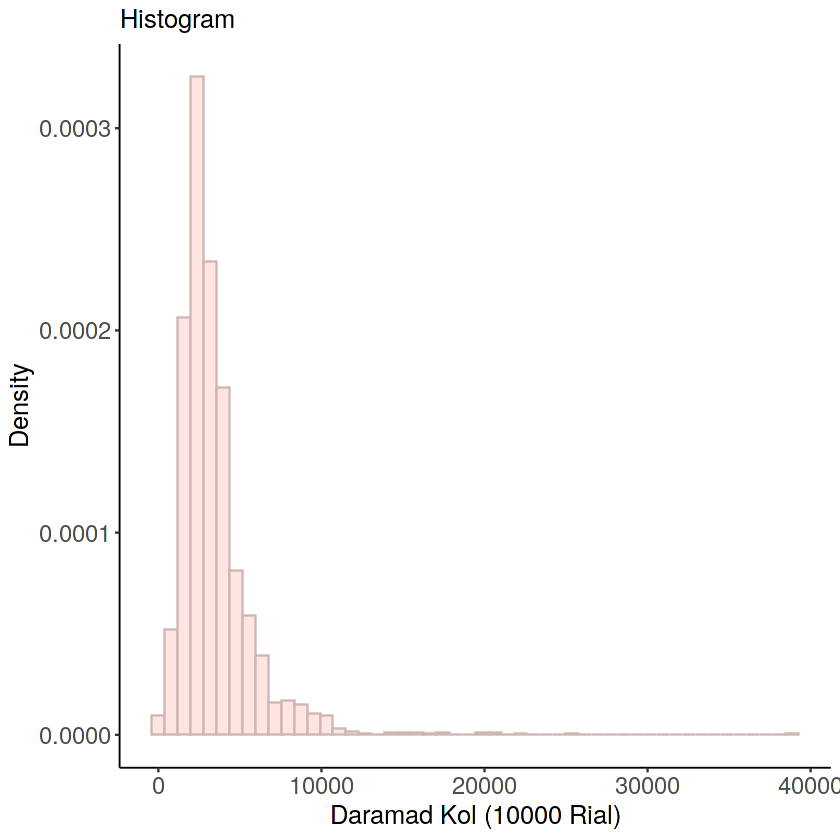

In [ ]:
ggplot(data, aes(x = D_Kol)) + 
  geom_histogram(aes(y=..density..),fill = "mistyrose",color='mistyrose3',bins=50) + ylab("Density") +
  labs(title = "Histogram" ,x = "Daramad Kol (10000 Rial)") + theme(axis.line = element_line(size = 0.4, 
                                                                                                 linetype = "solid"), panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                                 axis.text = element_text(size = 14), 
                                                                                                                                                                                                                                 plot.title = element_text(size = 15))


Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


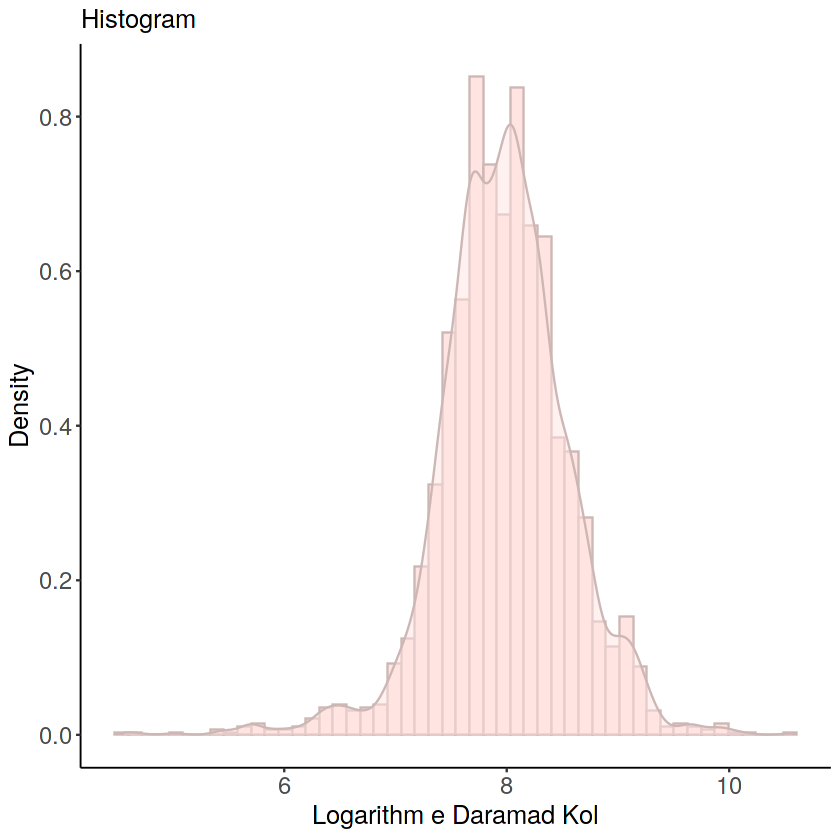

In [ ]:
ggplot(data, aes(x = D_Kol_log)) + 
  geom_histogram(aes(y=..density..),fill = "mistyrose",color='mistyrose3',bins=50) + ylab("Density") +
  labs(title = "Histogram" ,x = "Logarithm e Daramad Kol") +
  geom_density(alpha=.5, fill="mistyrose" , colour='mistyrose3') + theme(axis.line = element_line(size = 0.4, 
                                                                                                 linetype = "solid"), panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                                 axis.text = element_text(size = 14), 
                                                                                                                                                                                                                                 plot.title = element_text(size = 15))


In [ ]:
ks.test(data$D_Kol_log, 'pnorm')

Warning message in ks.test(data$D_Kol_log, "pnorm"):
“ties should not be present for the Kolmogorov-Smirnov test”



	One-sample Kolmogorov-Smirnov test

data:  data$D_Kol_log
D = 1, p-value <0.0000000000000002
alternative hypothesis: two-sided


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”


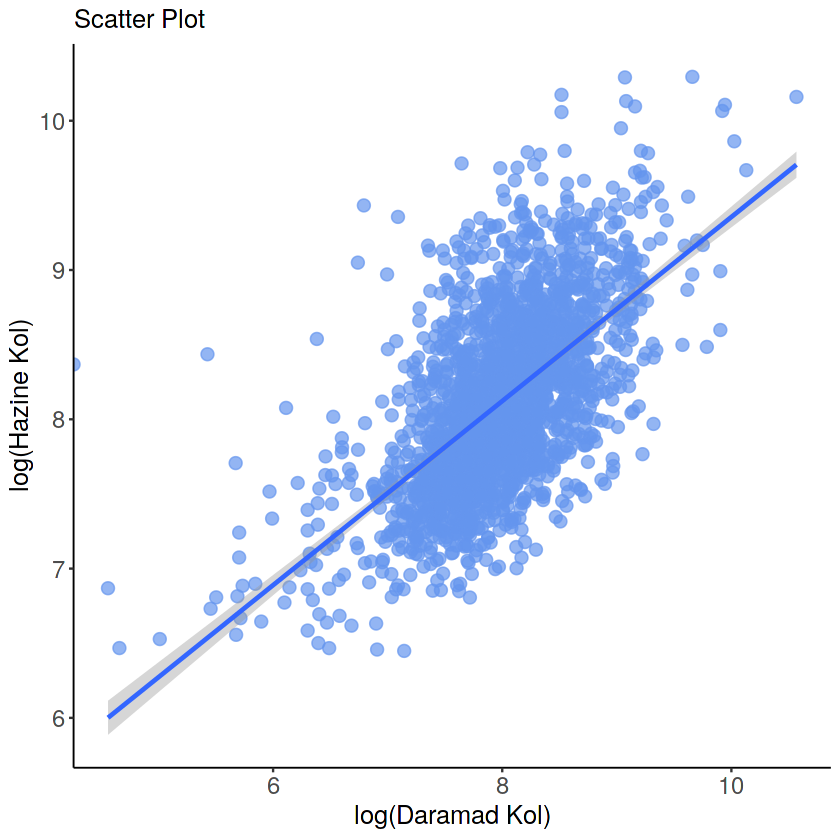

In [ ]:
ggplot(data = data,
       mapping = aes(x = D_Kol_log, y = H_Kol_log)) +
  geom_point(color = "cornflowerblue", alpha = .7,size = 3) + 
  geom_smooth(method = "lm") +
  labs(x="log(Daramad Kol)",y="log(Hazine Kol)",title = "Scatter Plot") + theme(axis.line = element_line(size = 0.4, 
                                                                                                        linetype = "solid"), panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                                        axis.text = element_text(size = 14), 
                                                                                                                                                                                                                                        plot.title = element_text(size = 15))


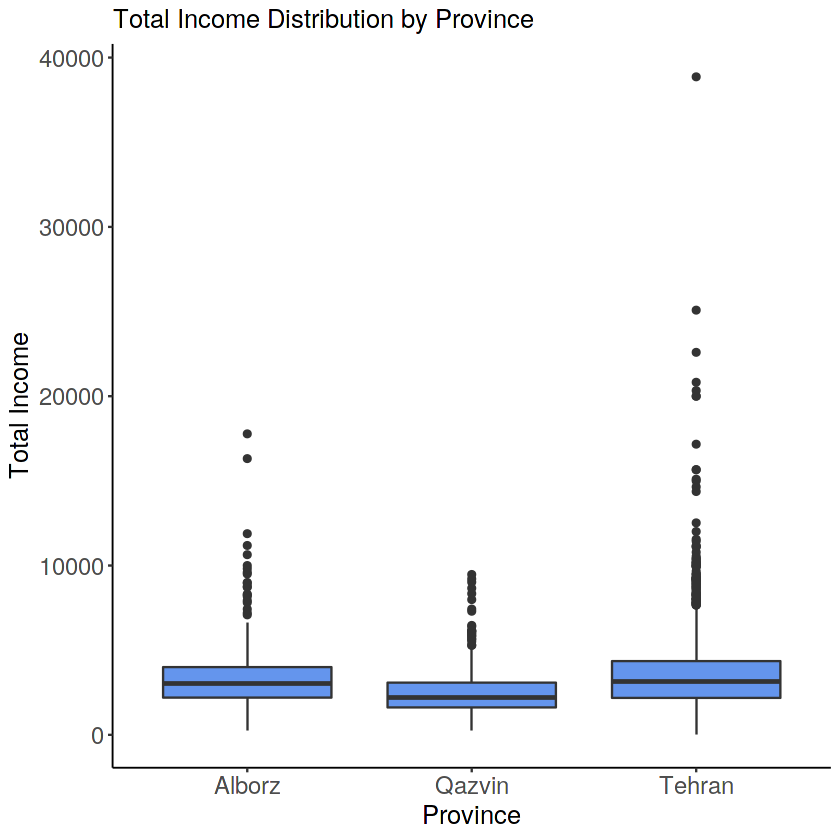

In [ ]:
ggplot(data, aes(x = C.Ostan,
                     y = D_Kol)) + geom_boxplot(fill = "cornflowerblue") +
  labs(x="Province",y="Total Income",title = "Total Income Distribution by Province") + theme(axis.line = element_line(size = 0.4, 
                                                                                        linetype = "solid"), panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                        axis.text = element_text(size = 14), 
                                                                                                                                                                                                                        plot.title = element_text(size = 15))


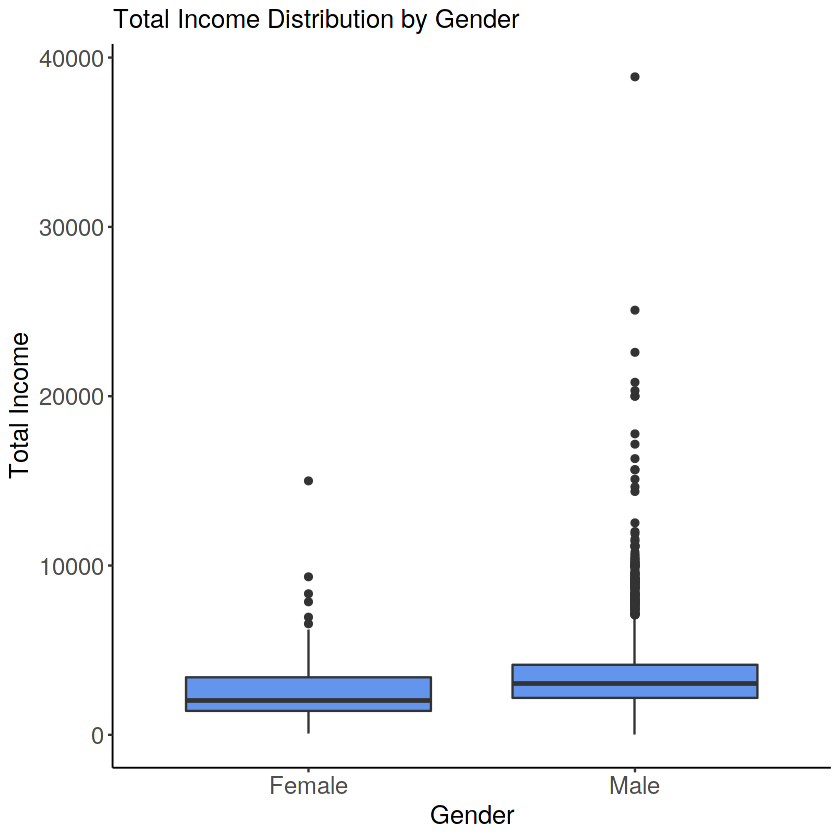

In [ ]:
ggplot(data, aes(x = Gender,
                 y = D_Kol)) + geom_boxplot(fill = "cornflowerblue") +
  labs(x="Gender",y="Total Income",title = "Total Income Distribution by Gender") + theme(axis.line = element_line(size = 0.4, 
                                                                                                                       linetype = "solid"), panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                                                       axis.text = element_text(size = 14), 
                                                                                                                                                                                                                                                       plot.title = element_text(size = 15))


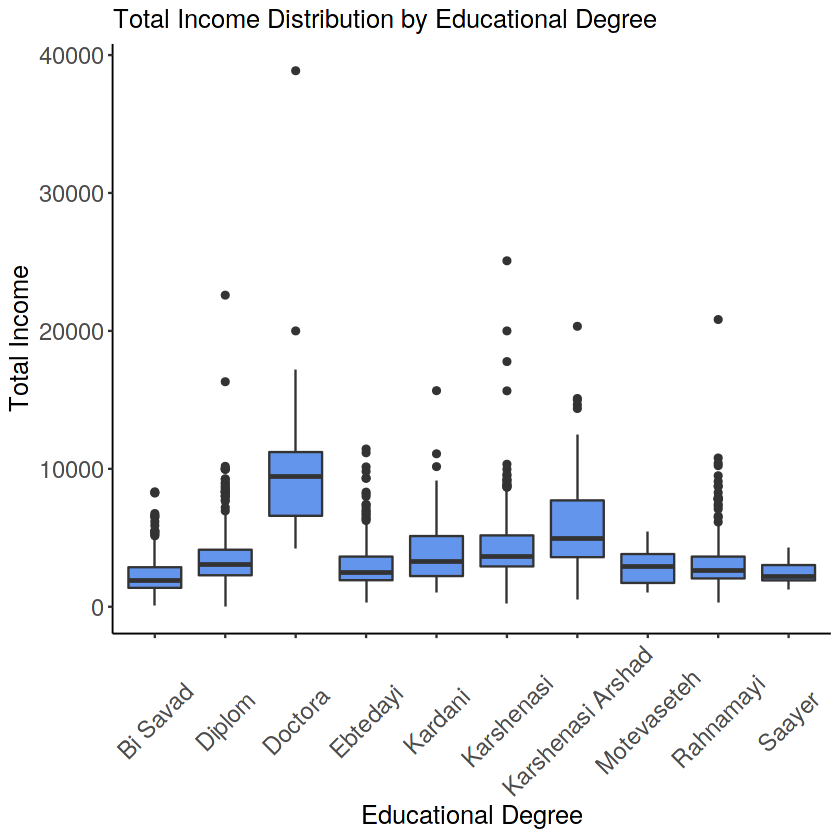

In [ ]:
ggplot(data, aes(x = Edu,
                 y = D_Kol)) + geom_boxplot(fill = "cornflowerblue") +
  labs(x="Educational Degree",y="Total Income",title = "Total Income Distribution by Educational Degree") + theme(axis.line = element_line(size = 0.4, 
                                                                                                                   linetype = "solid"), panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                                                   axis.text = element_text(size = 14), 
                                                                                                                                                                                                                                                   plot.title = element_text(size = 15)) + theme(axis.text.x = element_text(vjust = 0.5, 
                                                                                                                                                                                                                                                                                                                           angle = 45))


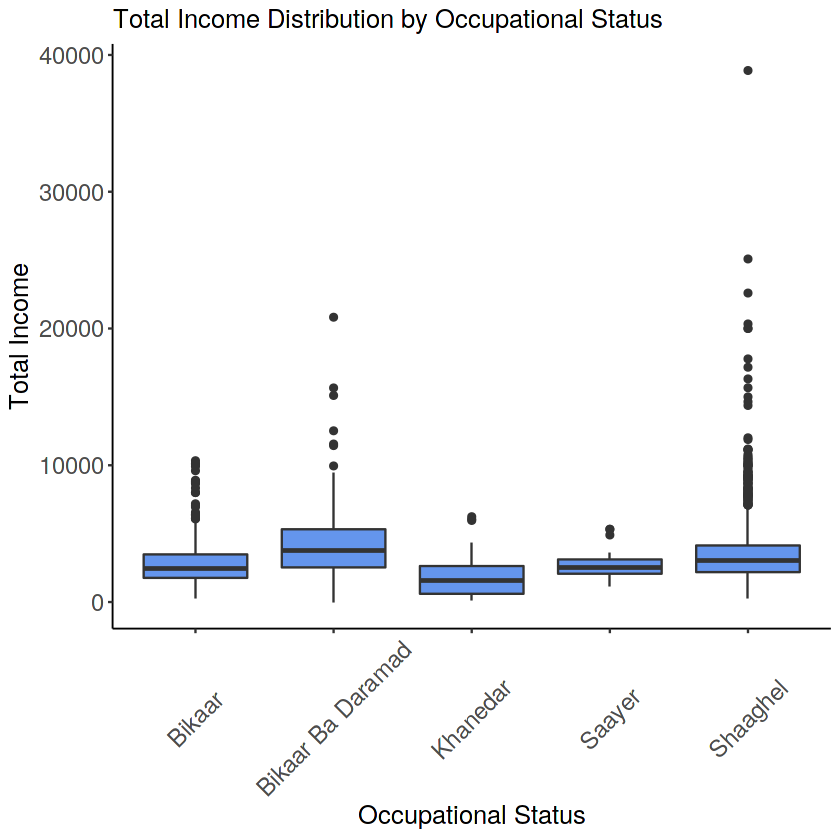

In [ ]:
ggplot(data, aes(x = Faaliat,
                 y = D_Kol)) + geom_boxplot(fill = "cornflowerblue") +
  labs(x="Occupational Status",y="Total Income",title = "Total Income Distribution by Occupational Status") + theme(axis.line = element_line(size = 0.4, 
                                                                                                                                           linetype = "solid"), panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                                                                           axis.text = element_text(size = 14), 
                                                                                                                                                                                                                                                                           plot.title = element_text(size = 15)) + theme(axis.text.x = element_text(vjust = 0.5, 
                                                                                                                                                                                                                                                                                                                                                    angle = 45))


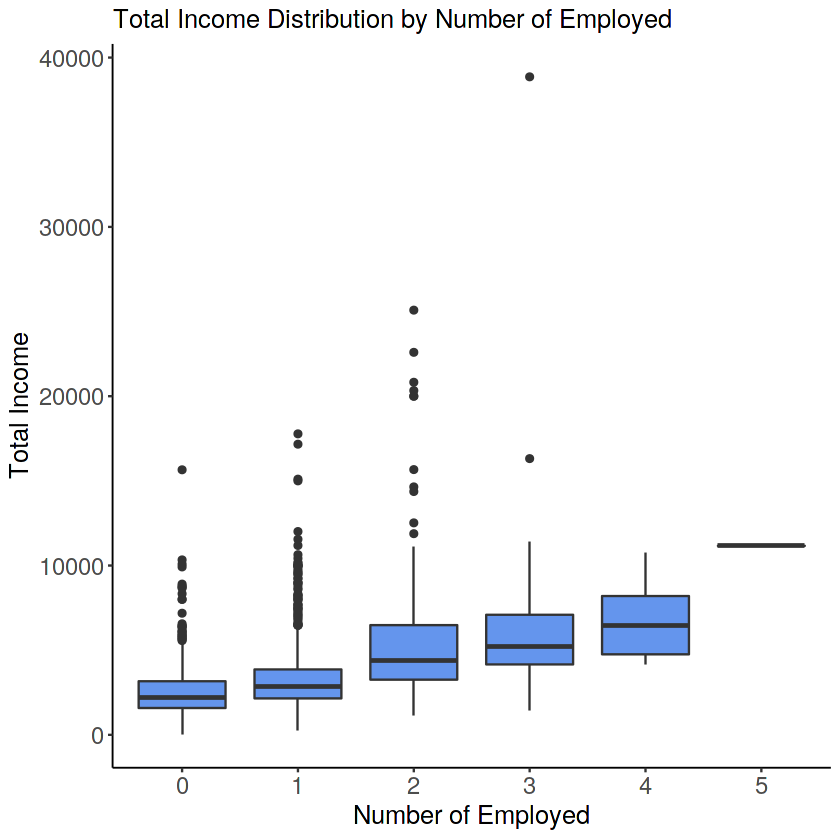

In [ ]:
data$T.shaghel=as.character(data$T.shaghel)
ggplot(data, aes(x = T.shaghel,
                 y = D_Kol)) + geom_boxplot(fill = "cornflowerblue") +
  labs(x="Number of Employed",y="Total Income",title = "Total Income Distribution by Number of Employed") + theme(axis.line = element_line(size = 0.4, 
                                                                                                                                             linetype = "solid"), panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                                                                             axis.text = element_text(size = 14), 
                                                                                                                                                                                                                                                                             plot.title = element_text(size = 15))


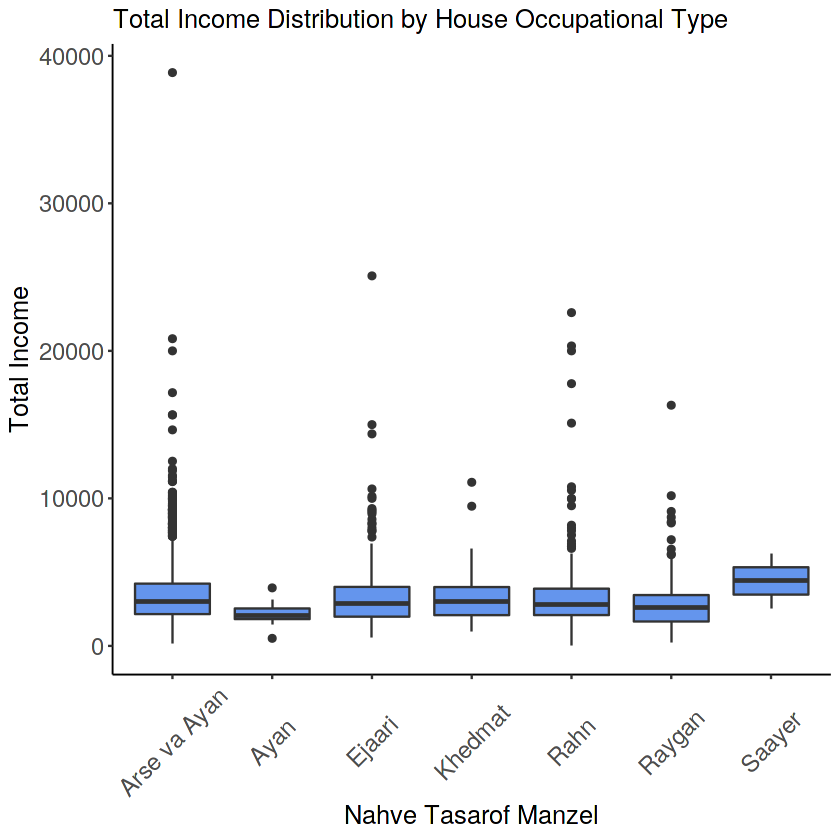

In [ ]:
ggplot(data, aes(x = T.M.S,
                 y = D_Kol)) + geom_boxplot(fill = "cornflowerblue") +
  labs(x="Nahve Tasarof Manzel",y="Total Income",title = "Total Income Distribution by House Occupational Type") + theme(axis.line = element_line(size = 0.4, 
                                                                                                                                           linetype = "solid"), panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                                                                           axis.text = element_text(size = 14), 
                                                                                                                                                                                                                                                                           plot.title = element_text(size = 15)) + theme(axis.text.x = element_text(vjust = 0.5, 
                                                                                                                                                                                                                                                                                                                                                    angle = 45))


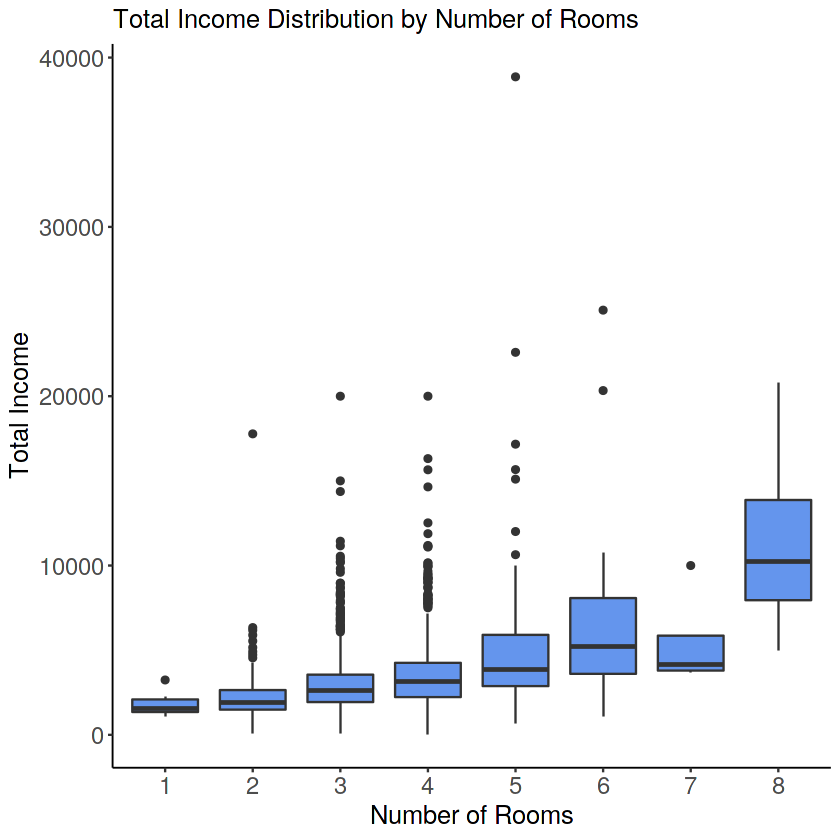

In [ ]:
data$T.O=as.character(data$T.O)
ggplot(data, aes(x = T.O,
                 y = D_Kol)) + geom_boxplot(fill = "cornflowerblue") +
  labs(x="Number of Rooms",y="Total Income",title = "Total Income Distribution by Number of Rooms") + theme(axis.line = element_line(size = 0.4, 
                                                                                                                                           linetype = "solid"), panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                                                                           axis.text = element_text(size = 14), 
                                                                                                                                                                                                                                                                           plot.title = element_text(size = 15))


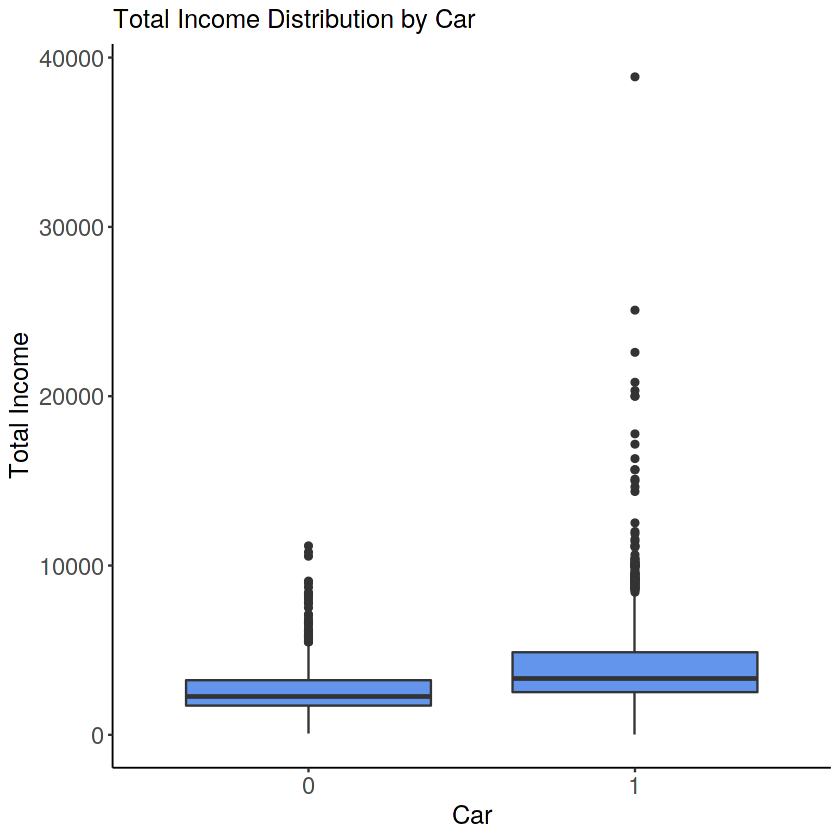

In [ ]:
data$oto=as.character(data$oto)
ggplot(data, aes(x = oto,
                 y = D_Kol)) + geom_boxplot(fill = "cornflowerblue") +
  labs(x="Car",y="Total Income",title = "Total Income Distribution by Car") + theme(axis.line = element_line(size = 0.4, 
                                                                                                                                           linetype = "solid"), panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                                                                           axis.text = element_text(size = 14), 
                                                                                                                                                                                                                                                                           plot.title = element_text(size = 15))


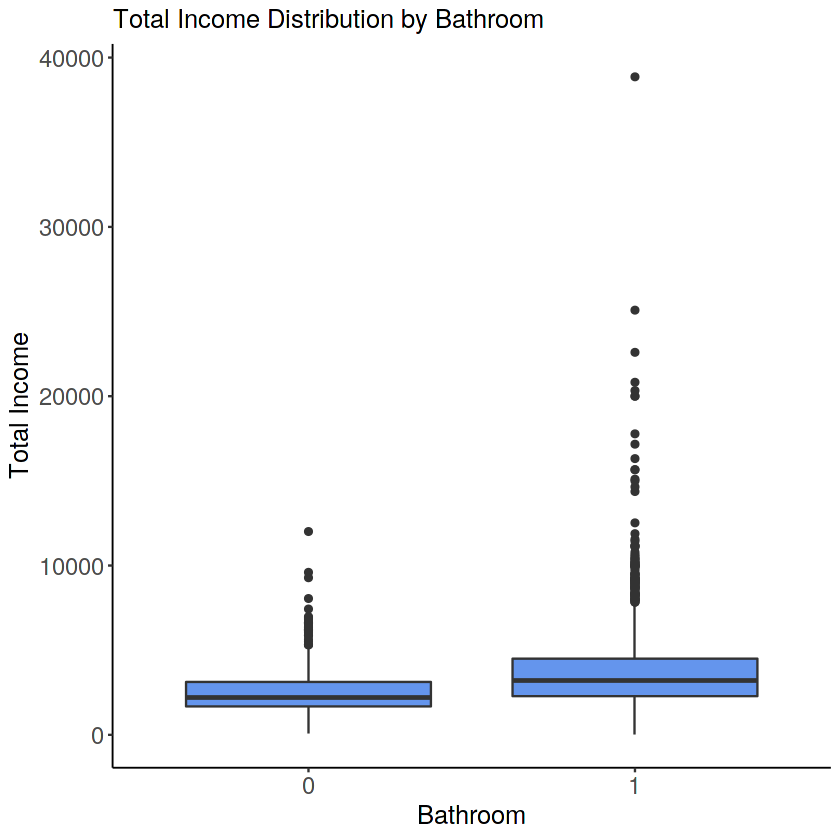

In [ ]:
data$hamam=as.character(data$hamam)
ggplot(data, aes(x = hamam,
                 y = D_Kol)) + geom_boxplot(fill = "cornflowerblue") +
  labs(x="Bathroom",y="Total Income",title = "Total Income Distribution by Bathroom") + theme(axis.line = element_line(size = 0.4, 
                                                                                                                                           linetype = "solid"), panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                                                                           axis.text = element_text(size = 14), 
                                                                                                                                                                                                                                                                           plot.title = element_text(size = 15))


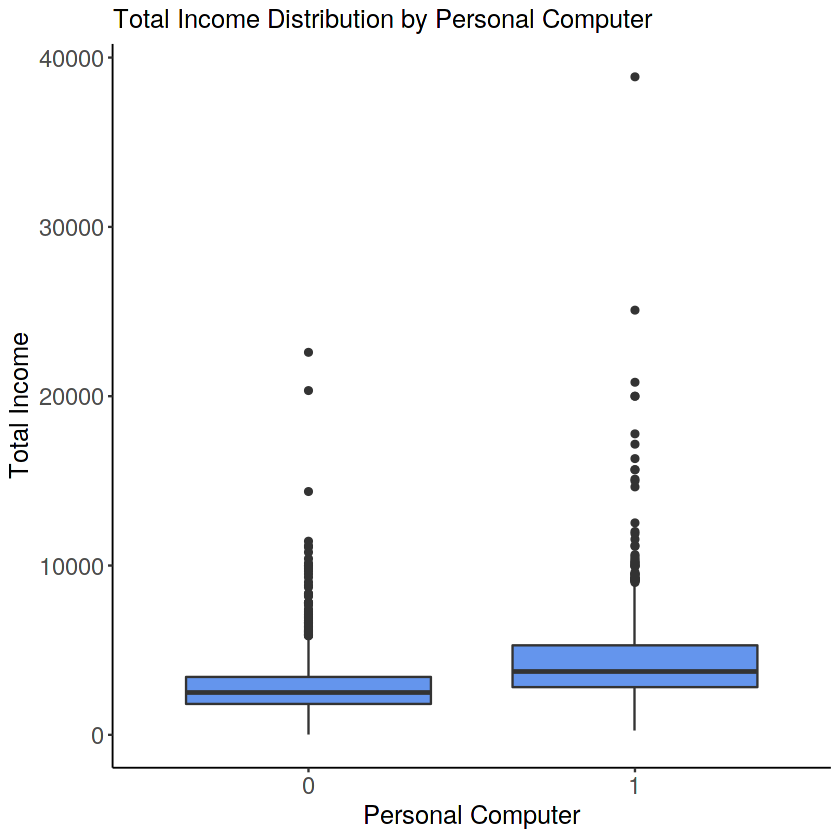

In [ ]:
data$Pc=as.character(data$Pc)
ggplot(data, aes(x = Pc,
                 y = D_Kol)) + geom_boxplot(fill = "cornflowerblue") +
  labs(x="Personal Computer",y="Total Income",title = "Total Income Distribution by Personal Computer") + theme(axis.line = element_line(size = 0.4, 
                                                                                                                                           linetype = "solid"), panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                                                                           axis.text = element_text(size = 14), 
                                                                                                                                                                                                                                                                           plot.title = element_text(size = 15))


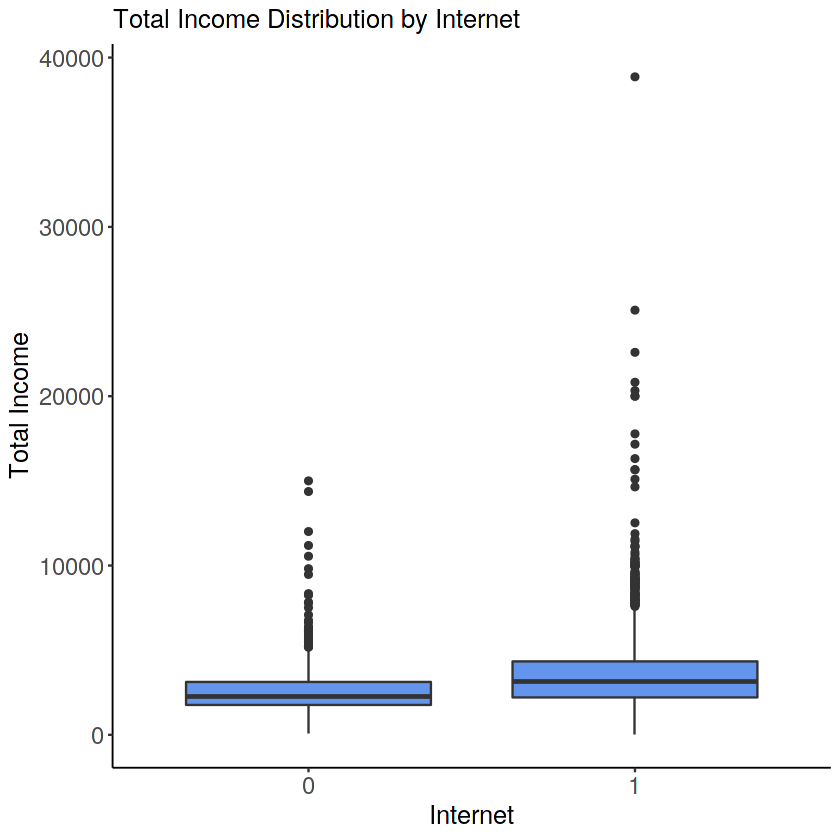

In [ ]:
data$internet=as.character(data$internet)
ggplot(data, aes(x = internet,
                 y = D_Kol)) + geom_boxplot(fill = "cornflowerblue") +
  labs(x="Internet",y="Total Income",title = "Total Income Distribution by Internet") + theme(axis.line = element_line(size = 0.4, 
                                                                                                                                           linetype = "solid"), panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                                                                                           axis.text = element_text(size = 14), 
                                                                                                                                                                                                                                                                           plot.title = element_text(size = 15))


In [ ]:
data$oto=as.character(data$oto)
data$motor=as.character(data$motor)
data$do=as.character(data$do)
data$radio=as.character(data$radio)
data$zabt=as.character(data$zabt)
data$TV.S=as.character(data$TV.S)
data$TV.r=as.character(data$TV.r)
data$DVD=as.character(data$DVD)
data$Pc=as.character(data$Pc)
data$mobile=as.character(data$mobile)
data$freeizer=as.character(data$freeizer)
data$yakhchal=as.character(data$yakhchal)
data$yakhchal.f=as.character(data$yakhchal.f)
data$gaz=as.character(data$gaz)
data$jaro.b=as.character(data$jaro.b)
data$m.lebas=as.character(data$m.lebas)
data$charkh.kh=as.character(data$charkh.kh)
data$panke=as.character(data$panke)
data$cooler.a=as.character(data$cooler.a)
data$m.zarf=as.character(data$m.zarf)
data$microfer=as.character(data$microfer)
data$bargh=as.character(data$bargh)
data$gaz.l=as.character(data$gaz.l)
data$tel=as.character(data$tel)
data$internet=as.character(data$internet)
data$hamam=as.character(data$hamam)
data$ashpazkhane=as.character(data$ashpazkhane)
data$cooler.a.s=as.character(data$cooler.a.s)
data$hararat.m=as.character(data$hararat.m)
data$package=as.character(data$package)
data$cooler.g.s=as.character(data$cooler.g.s)
data$fazelab=as.character(data$fazelab)


,Tedad.a,Age,S.Z,H_Khorakivadokhani,H_Noshidani,H_Pushak,H_Maskan,H_mobleman,H_behdasht,H_Hamlonaghl,H_Ertebatat,H_Tafrihat,H_Ghazayeamade,H_kalavakhadamat,D_Kol
Tedad.a,1.00,-0.27,0.02,0.21,0.08,0.04,-0.05,0.04,-0.01,0.10,0.25,0.08,-0.03,0.12,0.20
Age,-0.27,1.00,0.27,0.06,-0.02,-0.04,0.21,0.03,0.07,-0.07,-0.03,-0.09,-0.03,-0.06,0.05
S.Z,0.02,0.27,1.00,0.26,-0.06,0.09,0.53,0.08,0.10,0.15,0.23,0.09,0.11,0.12,0.32
H_Khorakivadokhani,0.21,0.06,0.26,1.00,0.01,0.22,0.29,0.22,0.20,0.30,0.41,0.21,0.18,0.27,0.43
H_Noshidani,0.08,-0.02,-0.06,0.01,1.00,0.00,-0.05,0.03,-0.02,0.03,0.04,-0.03,0.04,0.00,0.01
H_Pushak,0.04,-0.04,0.09,0.22,0.00,1.00,0.10,0.09,0.08,0.28,0.20,0.37,0.26,0.20,0.19
H_Maskan,-0.05,0.21,0.53,0.29,-0.05,0.10,1.00,0.09,0.15,0.18,0.31,0.14,0.13,0.20,0.45
H_mobleman,0.04,0.03,0.08,0.22,0.03,0.09,0.09,1.00,0.07,0.10,0.13,0.06,0.06,0.11,0.13
H_behdasht,-0.01,0.07,0.10,0.20,-0.02,0.08,0.15,0.07,1.00,0.15,0.17,0.11,0.06,0.08,0.18
H_Hamlonaghl,0.10,-0.07,0.15,0.30,0.03,0.28,0.18,0.10,0.15,1.00,0.31,0.22,0.36,0.19,0.35


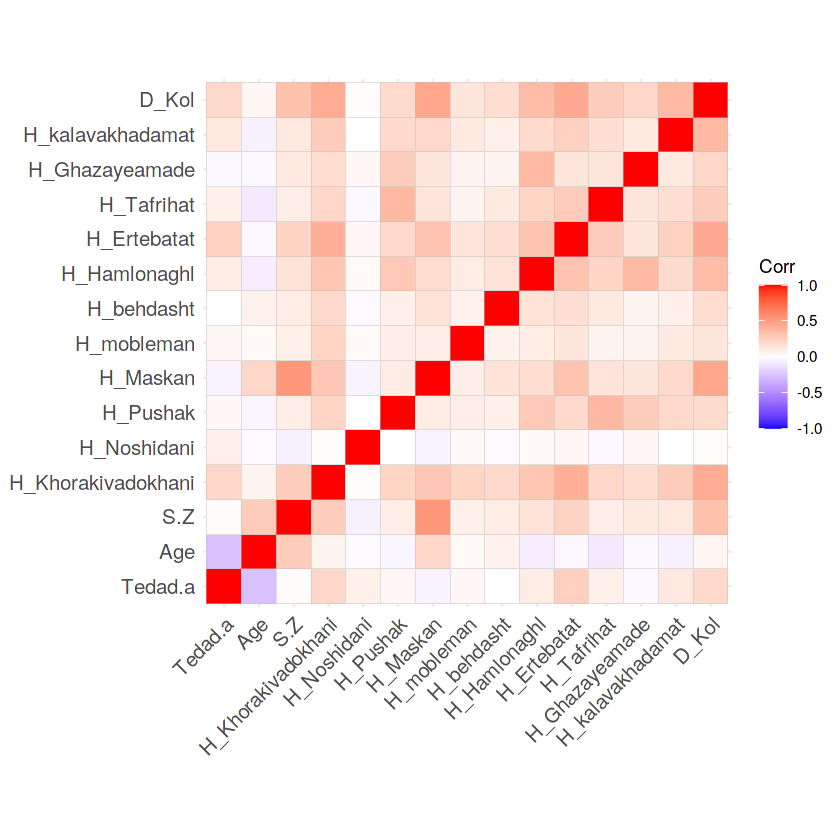

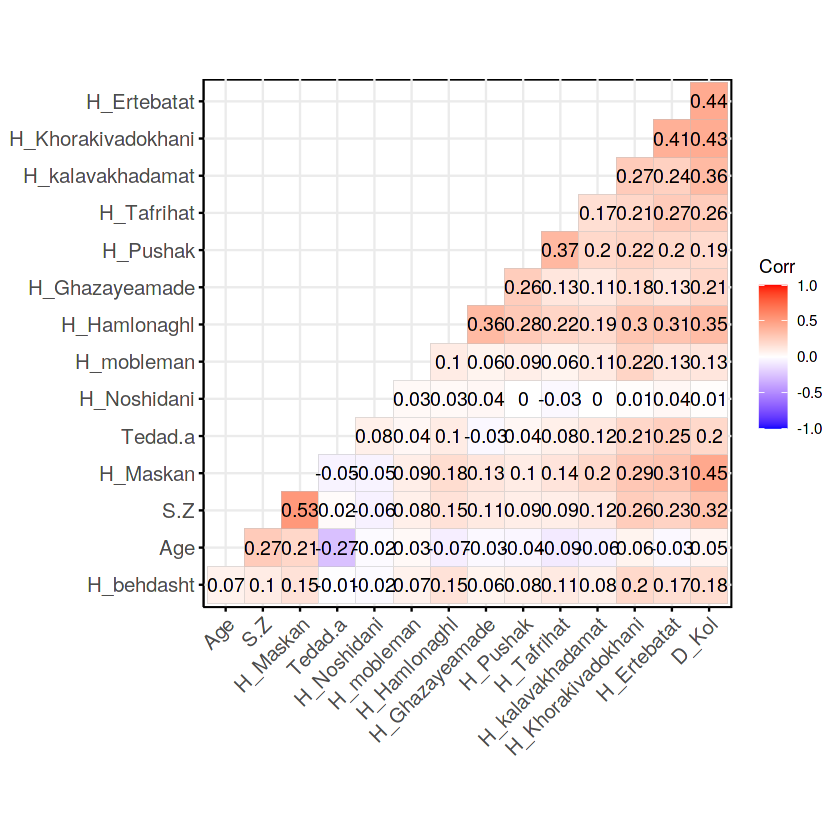

In [ ]:
df <- dplyr::select_if(data[,-c(1,65,66,67,68,69,70,72)], is.numeric)
r <- cor(df, use="complete.obs") 
round(r,2)
ggcorrplot(r)
ggcorrplot(r,
           hc.order = TRUE,
           type = "lower", lab = TRUE) + theme(axis.line = element_line(size = 0.4, 
                                                                       linetype = "solid"), panel.background = element_rect(fill = NA)) + theme(axis.ticks = element_line(linetype = "solid")) + theme(axis.title = element_text(size = 15), 
                                                                                                                                                                                                       axis.text = element_text(size = 14), 
                                                                                                                                                                                                       plot.title = element_text(size = 15))



In [ ]:
ggpairs(data[,c(54,55,56,57,58,59,60,61,62,63,64,71)])